In [95]:
from cycler import cycler
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from EDMtoolkit import *

# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# My Functions

# Slow Feature Analysis Functions
def nonlinearBasisExpand(x):
    n = x.shape[0]
    d = x.shape[1]
    
    M = int(d+d*(d+1)/2) # number of monomials and binomials
    
    hx = np.zeros((n,M))
    hx[:,0:d] = x
    ind = d
    for i in range(d):
        xi = x[:,i]
        for j in range(i,d):
            xj = x[:,j]
            hx[:,ind] = np.multiply(xi, xj)
            ind += 1
            
    return hx

def standardize(x):
    return (x - np.mean(x[np.isfinite(x)],axis=0)) / np.std(x[np.isfinite(x)],axis=0)

def linearSimilarity(d, c): # d = column vectors of drivers, c = column vector of "color" of lyapunov spectrum
    if c.ndim == 1:
        c = c.reshape((len(c),1))
    if d.ndim == 1:
        d = d.reshape((len(d),1))
        
    finiteVals = np.logical_and(np.all(np.isfinite(d),axis=1),np.all(np.isfinite(c),axis=1))
    dNoNAs = d[finiteVals]
    cNoNAs = c[finiteVals]
    
    dinv = la.inv(dNoNAs.T @ dNoNAs) @ dNoNAs.T
    k = dinv @ cNoNAs
    
    return (k, timeSeriesSimilarity((dNoNAs @ k).flatten(), cNoNAs.flatten()))

def timeSeriesSimilarity(t1, t2):
    return abs(np.dot(t1,t2) / (la.norm(t1) * la.norm(t2)))

In [97]:
fileMeta = "../Datasets/sitemetadata.csv"
dataMeta = pd.read_csv(fileMeta, encoding="utf-8", na_filter=False)
sites=dataMeta["Site"].to_numpy()

In [98]:
file = "../Datasets/alldata.csv"
data = pd.read_csv(file,encoding="utf-8",na_filter=False)
data = data.astype({"Abundance" : float})
print(data.info())

pd.option_context("display.max_rows","display.max_columns")

for site in data["Site"].drop_duplicates():
    for species in data.query("Site == ['{s}']".format(s=site))["Name"].drop_duplicates():
        s = data.query("Site == ['{s}'] and Name == ['{n}']".format(s=site,n=species))
        
        grouping_type = s["Level"].drop_duplicates().iloc[0]
        num_NANs = s["Abundance"].isna().sum()

        if grouping_type == "SP":
            print(f"len = {len(s)}, NAs = {num_NANs:03}, {grouping_type} : {site} population of {species} ")

# Lake Geneva has alot of data points, some NAs, is not restricted use, but has crap temperature data
# Esthwaite Water Zooplankton has almost 0 NAs, good temp data, is of reasonable size, and is not restricted use - BINGO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175085 entries, 0 to 175084
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Site       175085 non-null  object 
 1   Year       175085 non-null  int64  
 2   Month      175085 non-null  int64  
 3   Name       175085 non-null  object 
 4   Abundance  142755 non-null  float64
 5   Level      175085 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.0+ MB
None
len = 718, NAs = 079, SP : Lake Geneva population of Asplanchna priodonta 
len = 718, NAs = 079, SP : Lake Geneva population of Bythotrephes longimanus 
len = 718, NAs = 079, SP : Lake Geneva population of Cyclops prealpinus 
len = 718, NAs = 079, SP : Lake Geneva population of Cyclops sp 
len = 718, NAs = 079, SP : Lake Geneva population of Cyclops vicinus 
len = 718, NAs = 079, SP : Lake Geneva population of Eubosmina longispina 
len = 718, NAs = 079, SP : Lake Geneva population of Eudiap

len = 672, NAs = 000, SP : North Sea population of Pseudocalanus.spp..Adult.Atlantic 
len = 672, NAs = 000, SP : North Sea population of Calanus.I.IV 
len = 672, NAs = 000, SP : North Sea population of Para.Pseudocalanus.spp. 
len = 672, NAs = 000, SP : North Sea population of Temora.longicornis 
len = 672, NAs = 000, SP : North Sea population of Centropages.typicus. 
len = 672, NAs = 000, SP : North Sea population of Centropages.hamatus. 
len = 672, NAs = 000, SP : North Sea population of Calanus.finmarchicus 
len = 672, NAs = 000, SP : North Sea population of Calanus.helgolandicus 
len = 672, NAs = 000, SP : North Sea population of Metridia.lucens 
len = 672, NAs = 000, SP : North Sea population of Candacia.armata 
len = 672, NAs = 000, SP : North Sea population of Copepod.nauplii. 
len = 672, NAs = 000, SP : North Sea population of Podon.spp. 
len = 672, NAs = 000, SP : North Sea population of Evadne.spp. 
len = 672, NAs = 000, SP : North Sea population of Cyphonautes 
len = 672, NA

len = 437, NAs = 170, SP : Crystal Bog (WI) population of POLYARTHRA VULGARIS 
len = 437, NAs = 170, SP : Crystal Bog (WI) population of SYNCHAETA 
len = 437, NAs = 170, SP : Crystal Bog (WI) population of TRICHOCERCA BIROSTRIS 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of DIACYCLOPS THOMASI 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of LEPTODIAPTOMUS MINUTUS 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of BOSMINIDAE 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of DAPHNIA MENDOTAE 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of CONOCHILUS 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of GASTROPUS STYLIFER 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of KELLICOTTIA BOSTONIENSIS 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of KELLICOTTIA LONGISPINA 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of KERATELLA COCHLEARIS 
len = 440, NAs = 109, SP : Crystal Lake (WI) population of KER

In [413]:
# INSERT LOCATION AND SPECIES #

location = "Lake Kasumigaura"
species = "Brachionus.calyciflorus"

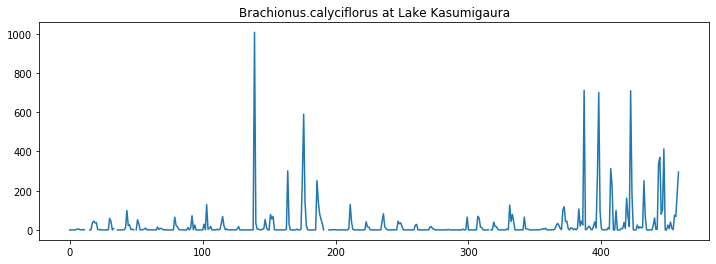

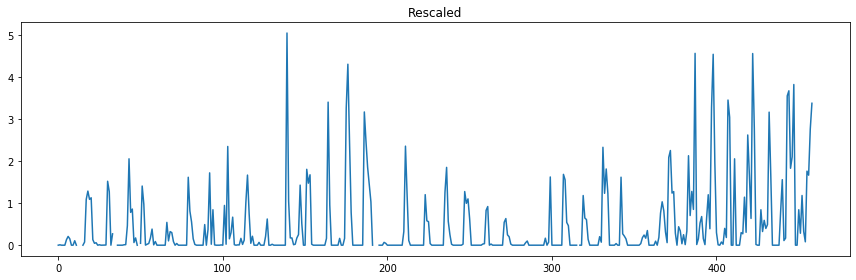

In [414]:
np.set_printoptions(precision=4, suppress=True)

EWdata = data.query("Site == ['{loc}'] and Name == ['{n}']".format(loc=location, n=species))["Abundance"].to_numpy()

"""
for species in EWdata["Name"].drop_duplicates():
    axWater[i].set_title("{s} at {l}".format(s=species,l=location))
    axWater[i].plot(EWdata.query("Name == ['{n}']".format(n=species))["Abundance"].to_numpy());
    i += 1
"""

Xr = np.log2( 2**5*(EWdata - np.nanmin(EWdata)) / np.nanmax(EWdata) + 1)
# Xr = EWdata + np.std( EWdata, axis = 0, where=np.isfinite(EWdata))

# Xr = standardize(np.sqrt(EWdata, where = np.isfinite(EWdata)))
# Xr = standardize(np.log2(Xr, where = np.isfinite(Xr), out=Xr) + 1)
# Xr = Xr ** (1/10)
# Xr = standardize(np.log(Xr, where = np.logical_and(np.isfinite(Xr), np.not_equal(Xr, Xr*0))))
# Now try without log transform
# Xr = standardize(Xr) # RESULT - WORKS MUCH MORE CLEANLY WITH LOG TRANSFORM
# Xr = Xr[:175]
Xr = Xr.reshape(len(Xr),1)

t = np.linspace(0,1,num=len(Xr))

ngraphs = 1
figWater, axWater = plt.subplots(ngraphs, figsize=(12,4*ngraphs))
# for location in data.index.levels[0][:3]:
axWater.set_title("{s} at {l}".format(s=species,l=location))
# axWater.plot(EWdata.query("Name == ['{n}']".format(n=species))["Abundance"].to_numpy());
axWater.plot(EWdata);

figPlank, axPlank = plt.subplots(figsize=(12,4))
axPlank.plot(Xr)
axPlank.set_title("Rescaled")
 
plt.tight_layout()
plt.show()

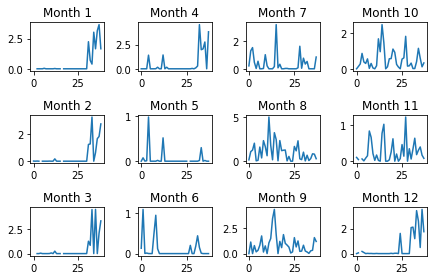

In [415]:
fig, ax = plt.subplots(ncols=4,nrows=3)
for i in range(12):
    ax[i%3,int(i/3)].plot(Xr[i::12])
    ax[i%3,int(i/3)].set_title(f"Month {i+1}")
       
plt.tight_layout()
plt.show()

In [416]:
"""
fig, ax = plt.subplots(ncols=4,nrows=3)
for i in range(12):
    ax[i%3,int(i/3)].plot(np.convolve(Xr[i::12], np.array([0,0,1,1,1,0,0])))
    
plt.tight_layout()
plt.show()
"""

'\nfig, ax = plt.subplots(ncols=4,nrows=3)\nfor i in range(12):\n    ax[i%3,int(i/3)].plot(np.convolve(Xr[i::12], np.array([0,0,1,1,1,0,0])))\n    \nplt.tight_layout()\nplt.show()\n'

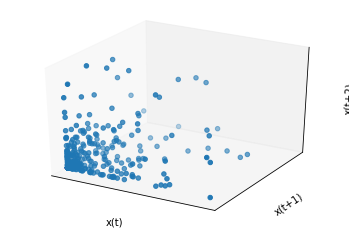

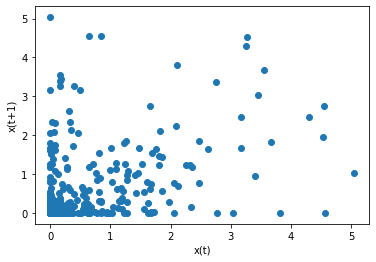

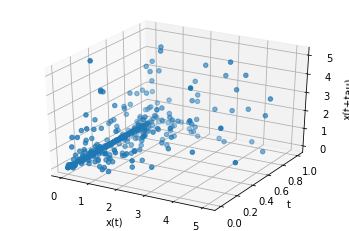

In [417]:
poincare3d(Xr)
poincare2d(Xr)
poincareT(Xr)

NAs at Blelham Tarn (UK) = 5
NAs at Esthwaite Water (UK) = 1
NAs at Windermere North (UK) = 0
NAs at Lake Apopka (FL) = 6
NAs at Lake Beauclair (FL) = 10
NAs at Lake Dora (FL) = 18
NAs at Lake Eustis (FL) = 43
NAs at Lake Griffin (FL) = 11
NAs at Lake Harris (FL) = 28
NAs at Lake Yale (FL) = 57
NAs at Lake Greifensee = 43
NAs at Lake Geneva = 79
NAs at Lake Kasumigaura = 12
NAs at Lake Mendota (WI) = 121
NAs at Loch Leven = 212
NAs at Lake Zurich = 53
NAs at Lake Muggelsee = 47
NAs at Narragansett Bay = 2
NAs at Lake Taupo = 15
NAs at Oneida Lake = 282
NAs at Big Muskellunge (WI) = 159
NAs at Crystal Bog (WI) = 172
NAs at Crystal Lake (WI) = 113
NAs at Sparkling Lake (WI) = 150
NAs at Trout Lake (WI) = 164


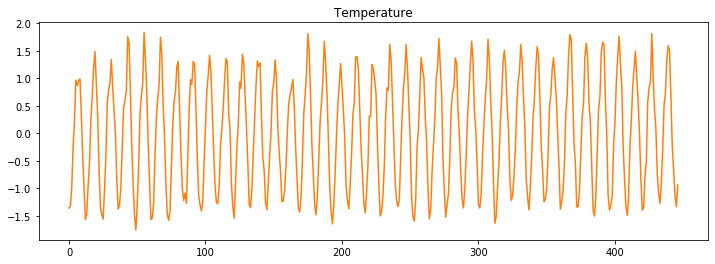

In [418]:
# Read out driver

file = "../Datasets/temperaturedata.csv"
driverData = pd.read_csv(file, encoding="utf-8", na_filter = True)
driverR = driverData.query("Site == ['{loc}']".format(loc=location))["Temp"].to_numpy()
driverR = driverR.reshape(len(driverR),1)
driverR = standardize(driverR)

driverR = driverR[:Xr.shape[0]]

for location in driverData["Site"].drop_duplicates():
    nNAs = np.sum(np.isnan(driverData.query("Site == ['{loc}']".format(loc=location))["Temp"]))
    print("NAs at {loc} = {nna}".format(loc = location, nna = nNAs))

figDr, axDr = plt.subplots(figsize = (12,4))
axDr.plot(driverR, color="tab:orange")
axDr.set_title("Temperature")
plt.show()

Null Correlation =  0.14925938091825014


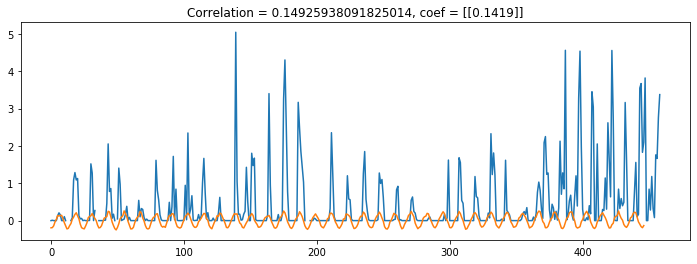

In [419]:
# Correlation between driver and original unaltered data
k, sim = linearSimilarity(driverR, Xr)
figCorr, axCorr = plt.subplots(1,figsize=(12,4))

axCorr.plot(Xr)
axCorr.plot(driverR @ k)
axCorr.set_title("Correlation = {c}, coef = {K}".format(c=sim, K=k))

print("Null Correlation = ", sim)

plt.show()

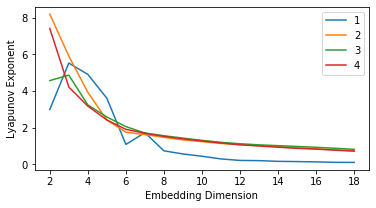

In [420]:
# False Nearest Neighbors Test

# Unitary Embedding Testing

FNNplot(Xr, 16, 4)


In [421]:
horizon = 1
numLags = 1
tauRange = np.array([1,2,6])
lagRange = np.array([0,1,2,4,10,22])

In [353]:
thetaNS, deltaNS, llikelihoodNS, lagsNS, thetaS, llikelihoodS, lagsS = optimizationSuite(Xr, t, horizon, lagRange, tauRange, errFunc=logUnLikelihood)

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -819.174
[02] theta: 0.000, delta: 1.100, log Likelihood: -816.452
[03] theta: 0.000, delta: 2.310, log Likelihood: -815.145
[04] theta: 0.000, delta: 3.641, log Likelihood: -814.210
[05] theta: 0.000, delta: 5.105, log Likelihood: -813.251
[06] theta: 0.000, delta: 6.716, log Likelihood: -812.232
[07] theta: 0.000, delta: 8.487, log Likelihood: -811.218
[08] theta: 0.403, delta: 10.436, log Likelihood: -810.732
[09] theta: 0.201, delta: 12.579, log Likelihood: -809.580
[10] theta: 0.000, delta: 14.937, log Likelihood: -808.758
[11] theta: 0.111, delta: 17.531, log Likelihood: -808.273
[12] theta: 0.055, delta: 20.384, log Likelihood: -807.805
[13] theta: 0.000, delta: 23.523, log Likelihood: -807.451
[14] theta: 0.000, delta: 26.975, log Likelihood: -807.224
[15] theta: 0.000, delta: 30.772, log Likelihood: -807.071
[16] theta: 0.000, delta: 34.950, log Likelihood: -806.975
[17] theta: 0.000, delta: 39

KeyboardInterrupt: 

In [ ]:


# lagstep 1, embedding dimension range: [2-14]
NSMap: 
 Max Likelihood -535.309072836385 
 Optimal Lags: 12 
 Theta: 0.0 
 Delta: 0.17469375000000006
SMap: 
 Max Likelihood -535.3270811346874 
 Optimal Lags: 12 
 Theta: 0.0
    
# lagstep 2, embedding dimension range: [2-14]
NSMap: 
 Max Likelihood -490.734753530596 
 Optimal Lags: 12 
 Theta: 0.0 
 Delta: 0.9762500000000002
SMap: 
 Max Likelihood -491.87441393390606 
 Optimal Lags: 12 
 Theta: 0.0
    
# lagstep 3, embedding dimension range: [2-14]
NSMap: 
 Max Likelihood -478.0517370150246 
 Optimal Lags: 12 
 Theta: 0.0 
 Delta: 0.53625
SMap: 
 Max Likelihood -478.4874799849312 
 Optimal Lags: 12 
 Theta: 0.0
    
# lagstep 6, embedding dimension range: [2-14]
NSMap: 
 Max Likelihood -462.1748066988256 
 Optimal Lags: 12 
 Theta: 0.0 
 Delta: 0.6875
SMap: 
 Max Likelihood -462.76718164215333 
 Optimal Lags: 12 
 Theta: 0.0

In [451]:
lagsNS = 6
lagStep = 2

In [452]:
""" COMPUTE DOFS """
Xn, Yn, txn = delayEmbed(Xr, horizon, lagsNS, lagStep, t=t)
dofNS = dofestimation(Xn, Yn, txn, thetaNS, deltaNS)

Xs, Ys, txs = delayEmbed(Xr, horizon, lagsS, lagStep, t=t)
dofS = dofestimation(Xs, Ys, txs, thetaS, 0)

(446,) (446,)
(414,) (414,)


In [453]:
predictedTSNS = leaveOneOut(Xn, Yn, txn, thetaNS, deltaNS)
predictedTSS = leaveOneOut(Xs, Ys, txs, thetaS, 0)

In [454]:
# X, _ = delayEmbed(Xr, Xr, [embDim]*dim,stepSize)
# driver = driverR[embDim:]
# print("X shape:", X.shape,"\nDriver shape: ",driver.shape)

In [455]:
MSElooNS = np.mean((predictedTSNS - Yn) ** 2 )
MSElooS = np.mean((predictedTSS - Ys) ** 2 )

In [456]:
MSElooNS

0.6144693298847282

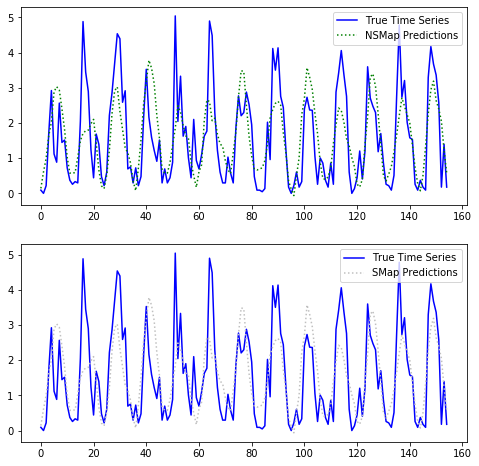

In [90]:
figLOU, axLOU = plt.subplots(2, figsize=(8,8))
axLOU[0].plot(Yn, c="blue", label="True Time Series")
axLOU[0].plot(predictedTSNS, c="green", linestyle="dotted", label="NSMap Predictions")
axLOU[0].legend()

axLOU[1].plot(Ys, c="blue", label="True Time Series")
axLOU[1].plot(predictedTSS, c="silver", linestyle="dotted", label="SMap Predictions")
axLOU[1].legend()
plt.show()

In [91]:
AICNS = AIC(Xn, Yn, txn, thetaNS, deltaNS)
AICS = AIC(Xs, Ys, txs, thetaS, 0)

In [92]:
sequentialNS = sequential(Xn, Yn, txn, thetaNS, deltaNS,return_error=False)
sequentialS = sequential(Xs, Ys, txs, thetaS, 0,return_error=False)

YseqNS = Yn[int(Yn.shape[0]/2):]
YseqS = Ys[int(Ys.shape[0]/2):]

In [93]:
MSEseqNS = np.mean((sequentialNS-YseqNS)**2)
MSEseqS = np.mean((sequentialS-YseqS)**2)

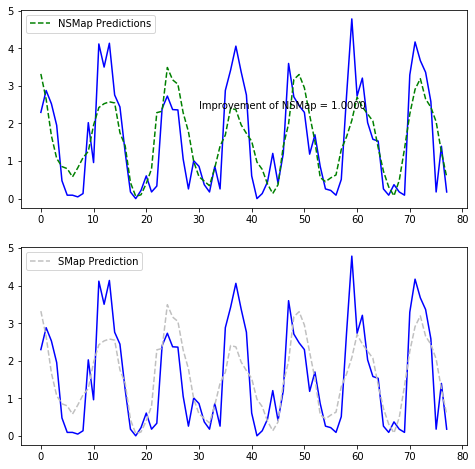

In [94]:
fig, ax = plt.subplots(2, figsize=(8,8))
ax[0].plot(Yn[int(Yn.shape[0]/2):], color="blue")
ax[0].plot(sequentialNS, color="green", linestyle="dashed", label="NSMap Predictions")
ax[0].text(30,2.4,f"Improvement of NSMap = {MSEseqS/MSEseqNS:.4f}")
ax[0].legend()

ax[1].plot(Ys[int(Ys.shape[0]/2):], color="blue")
ax[1].plot(sequentialS, color="silver", linestyle="dashed", label="SMap Prediction")
ax[1].legend()

plt.show()

In [62]:
### SUMMARY ###

print(f"NSMap -- theta: {thetaNS:.3f}, delta: {deltaNS:.7f}, AIC: {AICNS:.3f}, log Likelihood: {llikelihoodNS:.3f}, Optimal Embedding Dimension: {lagsNS+2}, 10% Weight Dropoff: {np.exp(-deltaNS*0.1**2)}, dof: {dofNS:.3f}")
print(f"SMap -- theta: {thetaS:.3f}, AIC: {AICS:.3f}, log Likelihood: {llikelihoodS:.3f}, Optimal Embedding Dimension: {lagsS+2}, dof: {dofS:.3f}")

print(f"Improvement of NSMap(leave one out): {MSElooS/MSElooNS:.3f}")
print(f"Improvement of NSMap(sequentially calculated): {MSEseqS/MSEseqNS:.3f}")

print(f"NSMap dof: {dofNS:.3f}")
print(f"SMap dof: {dofS:.3f}")

AkaikeTest(AICS, AICNS)

NSMap -- theta: 0.000, delta: 0.0000000, AIC: 403.158, log Likelihood: -192.579, Optimal Embedding Dimension: 9, 10% Weight Dropoff: 1.0, dof: 9.000
SMap -- theta: 0.000, AIC: 403.158, log Likelihood: -192.579, Optimal Embedding Dimension: 9, dof: 9.000
Improvement of NSMap(leave one out): 1.000
Improvement of NSMap(sequentially calculated): 1.000
NSMap dof: 9.000
SMap dof: 9.000
Probability NSMap beats SMap:  1.0


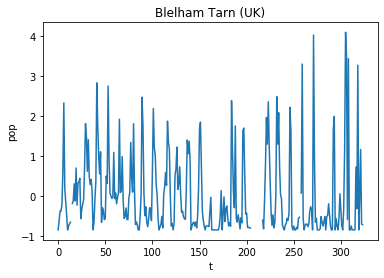

Embedding Dimension = 2
(318,) (318,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -414.645
[02] theta: 0.000, delta: 1.100, log Likelihood: -413.697
[03] theta: 0.000, delta: 2.310, log Likelihood: -413.271
[04] theta: 0.000, delta: 3.641, log Likelihood: -413.127
[05] theta: 0.000, delta: 5.105, log Likelihood: -413.132
[01] theta: 0.000, delta: 0.000, log Likelihood: -414.645
[02] theta: 0.000, delta: 0.000, log Likelihood: -414.645
Embedding Dimension = 3
(317,) (317,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -403.628
[02] theta: 0.000, delta: 1.100, log Likelihood: -403.034
[03] theta: 0.000, delta: 2.310, log Likelihood: -402.856
[04] theta: 0.000, delta: 3.641, log Likelihood: -402.864
[01] theta: 0.000, delta: 0.000, log Likelihood: -403.628
[02] theta: 0.000, delta: 0.000, log Likelihood: -403.628
Embedding Dimension = 4
(316,) (316,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -400.601
[02] theta: 0.000, delta: 1.100, log Likelihood: -400.102
[03] theta: 0.00

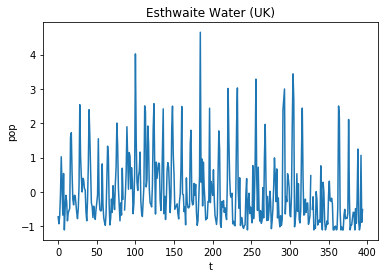

Embedding Dimension = 2
(389,) (389,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -551.134
[02] theta: 1.100, delta: 1.100, log Likelihood: -550.381
[03] theta: 0.550, delta: 2.310, log Likelihood: -547.527
[04] theta: 0.000, delta: 3.641, log Likelihood: -545.649
[05] theta: 0.000, delta: 5.105, log Likelihood: -545.132
[06] theta: 0.000, delta: 6.716, log Likelihood: -544.761
[07] theta: 0.000, delta: 8.487, log Likelihood: -544.434
[08] theta: 0.000, delta: 10.436, log Likelihood: -544.121
[09] theta: 0.000, delta: 12.579, log Likelihood: -543.828
[10] theta: 0.000, delta: 14.937, log Likelihood: -543.567
[11] theta: 0.000, delta: 17.531, log Likelihood: -543.351
[12] theta: 0.000, delta: 20.384, log Likelihood: -543.187
[13] theta: 0.000, delta: 23.523, log Likelihood: -543.079
[14] theta: 0.000, delta: 26.975, log Likelihood: -543.028
[15] theta: 0.000, delta: 30.772, log Likelihood: -543.034
[01] theta: 0.000, delta: 0.000, log Likelihood: -551.134
[02] theta: 1.100, delta: 

[04] theta: 0.000, delta: 0.000, log Likelihood: -503.304
[05] theta: 0.303, delta: 0.000, log Likelihood: -501.561
[06] theta: 0.635, delta: 0.000, log Likelihood: -501.336
[07] theta: 0.469, delta: 0.000, log Likelihood: -501.202
[08] theta: 0.552, delta: 0.000, log Likelihood: -501.204
Embedding Dimension = 8
(383,) (383,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -424.884
[02] theta: 0.000, delta: 0.000, log Likelihood: -424.884
[01] theta: 0.000, delta: 0.000, log Likelihood: -424.884
[02] theta: 0.000, delta: 0.000, log Likelihood: -424.884
Embedding Dimension = 9
(382,) (382,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -422.631
[02] theta: 0.000, delta: 0.000, log Likelihood: -422.631
[01] theta: 0.000, delta: 0.000, log Likelihood: -422.631
[02] theta: 0.000, delta: 0.000, log Likelihood: -422.631
Embedding Dimension = 10
(381,) (381,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -419.554
[02] theta: 0.000, delta: 0.000, log Likelihood: -419.554
[01] theta: 0.0

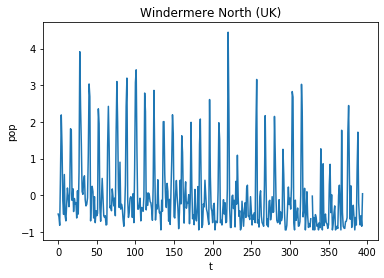

Embedding Dimension = 2
(389,) (389,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -550.428
[02] theta: 1.100, delta: 1.100, log Likelihood: -542.097
[03] theta: 0.550, delta: 2.310, log Likelihood: -540.126
[04] theta: 0.000, delta: 3.641, log Likelihood: -541.910
[05] theta: 0.303, delta: 5.105, log Likelihood: -540.364
[06] theta: 0.635, delta: 4.373, log Likelihood: -540.351
[07] theta: 0.469, delta: 3.568, log Likelihood: -539.930
[08] theta: 0.286, delta: 2.682, log Likelihood: -540.495
[09] theta: 0.377, delta: 3.125, log Likelihood: -540.045
[10] theta: 0.478, delta: 3.612, log Likelihood: -539.934
[11] theta: 0.428, delta: 3.368, log Likelihood: -539.945
[12] theta: 0.453, delta: 3.490, log Likelihood: -539.929
[13] theta: 0.481, delta: 3.429, log Likelihood: -539.924
[01] theta: 0.000, delta: 0.000, log Likelihood: -550.428
[02] theta: 1.100, delta: 0.000, log Likelihood: -544.117
[03] theta: 0.550, delta: 0.000, log Likelihood: -544.390
[04] theta: 0.825, delta: 0.000, l

[01] theta: 0.000, delta: 0.000, log Likelihood: -404.036
[02] theta: 0.000, delta: 0.000, log Likelihood: -404.036
Embedding Dimension = 10
(381,) (381,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -401.250
[02] theta: 0.000, delta: 0.000, log Likelihood: -401.250
[01] theta: 0.000, delta: 0.000, log Likelihood: -401.250
[02] theta: 0.000, delta: 0.000, log Likelihood: -401.250
Embedding Dimension = 11
(380,) (380,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -398.904
[02] theta: 0.000, delta: 0.000, log Likelihood: -398.904
[01] theta: 0.000, delta: 0.000, log Likelihood: -398.904
[02] theta: 0.000, delta: 0.000, log Likelihood: -398.904
Embedding Dimension = 12
(379,) (379,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -397.204
[02] theta: 0.000, delta: 0.000, log Likelihood: -397.204
[01] theta: 0.000, delta: 0.000, log Likelihood: -397.204
[02] theta: 0.000, delta: 0.000, log Likelihood: -397.204
NSMap: 
 Max Likelihood -397.20423628866274 
 Optimal Lags: 10 
 Theta:

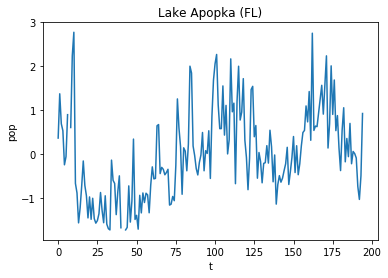

Embedding Dimension = 2
(206,) (206,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -240.714
[02] theta: 1.100, delta: 1.100, log Likelihood: -236.082
[03] theta: 0.550, delta: 2.310, log Likelihood: -234.720
[04] theta: 0.000, delta: 3.641, log Likelihood: -235.034
[05] theta: 0.303, delta: 5.105, log Likelihood: -234.018
[06] theta: 0.151, delta: 6.716, log Likelihood: -233.579
[07] theta: 0.000, delta: 8.487, log Likelihood: -233.119
[08] theta: 0.083, delta: 10.436, log Likelihood: -232.315
[09] theta: 0.042, delta: 12.579, log Likelihood: -231.449
[10] theta: 0.000, delta: 14.937, log Likelihood: -230.470
[11] theta: 0.000, delta: 17.531, log Likelihood: -229.436
[12] theta: 0.000, delta: 20.384, log Likelihood: -228.355
[13] theta: 0.000, delta: 23.523, log Likelihood: -227.243
[14] theta: 0.000, delta: 26.975, log Likelihood: -226.116
[15] theta: 0.000, delta: 30.772, log Likelihood: -224.994
[16] theta: 0.000, delta: 34.950, log Likelihood: -223.890
[17] theta: 0.000, delta:

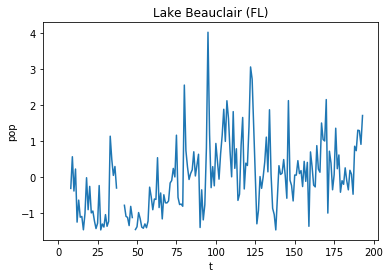

Embedding Dimension = 2
(205,) (205,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -241.052
[02] theta: 0.000, delta: 1.100, log Likelihood: -236.066
[03] theta: 0.000, delta: 2.310, log Likelihood: -233.321
[04] theta: 0.000, delta: 3.641, log Likelihood: -231.788
[05] theta: 0.000, delta: 5.105, log Likelihood: -230.875
[06] theta: 0.000, delta: 6.716, log Likelihood: -230.333
[07] theta: 0.000, delta: 8.487, log Likelihood: -229.972
[08] theta: 0.000, delta: 10.436, log Likelihood: -229.652
[09] theta: 0.000, delta: 12.579, log Likelihood: -229.327
[10] theta: 0.000, delta: 14.937, log Likelihood: -229.011
[11] theta: 0.000, delta: 17.531, log Likelihood: -228.732
[12] theta: 0.000, delta: 20.384, log Likelihood: -228.510
[13] theta: 0.000, delta: 23.523, log Likelihood: -228.357
[14] theta: 0.000, delta: 26.975, log Likelihood: -228.276
[15] theta: 0.000, delta: 30.772, log Likelihood: -228.264
[16] theta: 0.000, delta: 28.874, log Likelihood: -228.261
[01] theta: 0.000, delta:

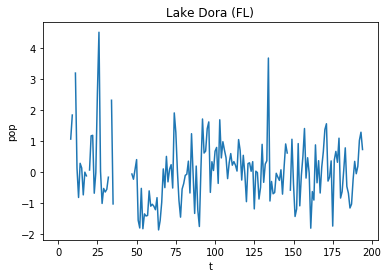

Embedding Dimension = 2
(206,) (206,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -231.694
[02] theta: 0.000, delta: 0.000, log Likelihood: -231.694
[01] theta: 0.000, delta: 0.000, log Likelihood: -231.694
[02] theta: 0.000, delta: 0.000, log Likelihood: -231.694
Embedding Dimension = 3
(205,) (205,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -206.670
[02] theta: 0.000, delta: 0.000, log Likelihood: -206.670
[01] theta: 0.000, delta: 0.000, log Likelihood: -206.670
[02] theta: 0.000, delta: 0.000, log Likelihood: -206.670
Embedding Dimension = 4
(204,) (204,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -198.513
[02] theta: 0.000, delta: 1.100, log Likelihood: -197.932
[03] theta: 0.000, delta: 0.550, log Likelihood: -198.041
[04] theta: 0.000, delta: 0.825, log Likelihood: -197.948
[05] theta: 0.000, delta: 1.128, log Likelihood: -197.934
[06] theta: 0.000, delta: 0.976, log Likelihood: -197.930
[01] theta: 0.000, delta: 0.000, log Likelihood: -198.513
[02] theta: 0.00

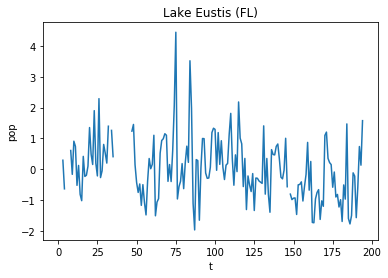

Embedding Dimension = 2
(202,) (202,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -246.244
[02] theta: 0.000, delta: 1.100, log Likelihood: -244.234
[03] theta: 0.000, delta: 2.310, log Likelihood: -243.329
[04] theta: 0.000, delta: 3.641, log Likelihood: -242.964
[05] theta: 0.000, delta: 5.105, log Likelihood: -242.845
[06] theta: 0.000, delta: 6.716, log Likelihood: -242.879
[07] theta: 0.000, delta: 5.910, log Likelihood: -242.846
[08] theta: 0.000, delta: 5.025, log Likelihood: -242.847
[01] theta: 0.000, delta: 0.000, log Likelihood: -246.244
[02] theta: 0.000, delta: 0.000, log Likelihood: -246.244
Embedding Dimension = 3
(201,) (201,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -235.913
[02] theta: 0.000, delta: 1.100, log Likelihood: -234.233
[03] theta: 0.000, delta: 2.310, log Likelihood: -233.294
[04] theta: 0.000, delta: 3.641, log Likelihood: -232.734
[05] theta: 0.000, delta: 5.105, log Likelihood: -232.399
[06] theta: 0.000, delta: 6.716, log Likelihood: -232.

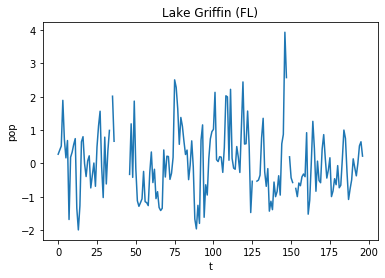

Embedding Dimension = 2
(204,) (204,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -247.449
[02] theta: 0.000, delta: 0.000, log Likelihood: -247.449
[01] theta: 0.000, delta: 0.000, log Likelihood: -247.449
[02] theta: 0.000, delta: 0.000, log Likelihood: -247.449
Embedding Dimension = 3
(203,) (203,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -238.232
[02] theta: 0.000, delta: 0.000, log Likelihood: -238.232
[01] theta: 0.000, delta: 0.000, log Likelihood: -238.232
[02] theta: 0.000, delta: 0.000, log Likelihood: -238.232
Embedding Dimension = 4
(202,) (202,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -230.361
[02] theta: 0.000, delta: 0.000, log Likelihood: -230.361
[01] theta: 0.000, delta: 0.000, log Likelihood: -230.361
[02] theta: 0.000, delta: 0.000, log Likelihood: -230.361
Embedding Dimension = 5
(201,) (201,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -222.222
[02] theta: 0.000, delta: 0.000, log Likelihood: -222.222
[01] theta: 0.000, delta: 0.000, log

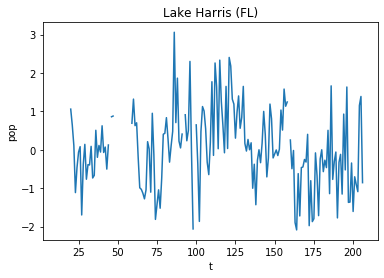

Embedding Dimension = 2
(214,) (214,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -234.780
[02] theta: 0.000, delta: 0.000, log Likelihood: -234.780
[01] theta: 0.000, delta: 0.000, log Likelihood: -234.780
[02] theta: 0.000, delta: 0.000, log Likelihood: -234.780
Embedding Dimension = 3
(213,) (213,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -222.762
[02] theta: 0.000, delta: 0.000, log Likelihood: -222.762
[01] theta: 0.000, delta: 0.000, log Likelihood: -222.762
[02] theta: 0.000, delta: 0.000, log Likelihood: -222.762
Embedding Dimension = 4
(212,) (212,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -213.790
[02] theta: 0.000, delta: 0.000, log Likelihood: -213.790
[01] theta: 0.000, delta: 0.000, log Likelihood: -213.790
[02] theta: 0.000, delta: 0.000, log Likelihood: -213.790
Embedding Dimension = 5
(211,) (211,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -207.237
[02] theta: 0.000, delta: 1.100, log Likelihood: -207.024
[03] theta: 0.000, delta: 0.550, log

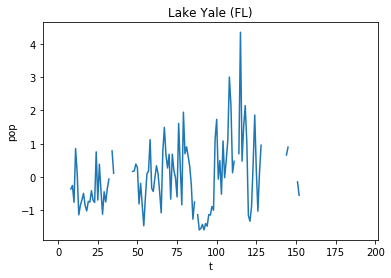

Embedding Dimension = 2
(205,) (205,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -185.991
[02] theta: 0.000, delta: 1.100, log Likelihood: -185.344
[03] theta: 0.000, delta: 2.310, log Likelihood: -185.045
[04] theta: 0.000, delta: 3.641, log Likelihood: -184.884
[05] theta: 0.000, delta: 5.105, log Likelihood: -184.805
[06] theta: 0.000, delta: 6.716, log Likelihood: -184.804
[01] theta: 0.000, delta: 0.000, log Likelihood: -185.991
[02] theta: 0.000, delta: 0.000, log Likelihood: -185.991
Embedding Dimension = 3
(204,) (204,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -140.730
[02] theta: 0.000, delta: 1.100, log Likelihood: -140.912
[03] theta: 0.000, delta: 0.550, log Likelihood: -140.773
[04] theta: 0.000, delta: 0.000, log Likelihood: -140.730
[05] theta: 0.000, delta: 0.303, log Likelihood: -140.740
[01] theta: 0.000, delta: 0.000, log Likelihood: -140.730
[02] theta: 0.000, delta: 0.000, log Likelihood: -140.730
Embedding Dimension = 4
(203,) (203,)
[01] theta: 0.00

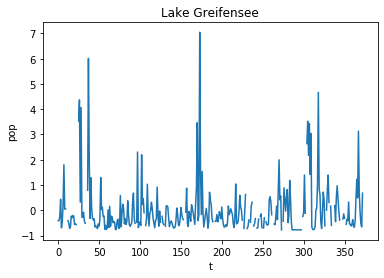

Embedding Dimension = 2
(382,) (382,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -434.756
[02] theta: 0.000, delta: 0.000, log Likelihood: -434.756
[01] theta: 0.000, delta: 0.000, log Likelihood: -434.756
[02] theta: 0.000, delta: 0.000, log Likelihood: -434.756
Embedding Dimension = 3
(381,) (381,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -396.694
[02] theta: 0.000, delta: 0.000, log Likelihood: -396.694
[01] theta: 0.000, delta: 0.000, log Likelihood: -396.694
[02] theta: 0.000, delta: 0.000, log Likelihood: -396.694
Embedding Dimension = 4
(380,) (380,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -373.110
[02] theta: 0.000, delta: 0.000, log Likelihood: -373.110
[01] theta: 0.000, delta: 0.000, log Likelihood: -373.110
[02] theta: 0.000, delta: 0.000, log Likelihood: -373.110
Embedding Dimension = 5
(379,) (379,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -344.611
[02] theta: 0.000, delta: 0.000, log Likelihood: -344.611
[01] theta: 0.000, delta: 0.000, log

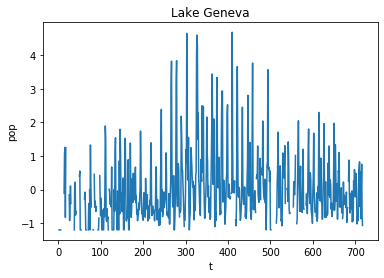

Embedding Dimension = 2
(712,) (712,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -828.018
[02] theta: 0.000, delta: 1.100, log Likelihood: -825.029
[03] theta: 0.000, delta: 2.310, log Likelihood: -820.524
[04] theta: 0.000, delta: 3.641, log Likelihood: -815.640
[05] theta: 0.000, delta: 5.105, log Likelihood: -811.258
[06] theta: 0.000, delta: 6.716, log Likelihood: -807.653
[07] theta: 0.000, delta: 8.487, log Likelihood: -804.795
[08] theta: 0.000, delta: 10.436, log Likelihood: -802.563
[09] theta: 0.000, delta: 12.579, log Likelihood: -800.827
[10] theta: 0.000, delta: 14.937, log Likelihood: -799.473
[11] theta: 0.000, delta: 17.531, log Likelihood: -798.410
[12] theta: 0.000, delta: 20.384, log Likelihood: -797.567
[13] theta: 0.000, delta: 23.523, log Likelihood: -796.891
[14] theta: 0.000, delta: 26.975, log Likelihood: -796.345
[15] theta: 0.000, delta: 30.772, log Likelihood: -795.903
[16] theta: 0.000, delta: 34.950, log Likelihood: -795.549
[17] theta: 0.000, delta:

[04] theta: 0.000, delta: 0.000, log Likelihood: -625.829
[05] theta: 0.303, delta: 0.000, log Likelihood: -625.882
[06] theta: 0.151, delta: 0.000, log Likelihood: -625.699
[07] theta: 0.000, delta: 0.000, log Likelihood: -625.829
[08] theta: 0.083, delta: 0.000, log Likelihood: -625.717
[09] theta: 0.175, delta: 0.000, log Likelihood: -625.707
[01] theta: 0.000, delta: 0.000, log Likelihood: -625.829
[02] theta: 1.100, delta: 0.000, log Likelihood: -633.333
[03] theta: 0.550, delta: 0.000, log Likelihood: -626.884
[04] theta: 0.000, delta: 0.000, log Likelihood: -625.829
[05] theta: 0.303, delta: 0.000, log Likelihood: -625.882
[06] theta: 0.151, delta: 0.000, log Likelihood: -625.699
[07] theta: 0.000, delta: 0.000, log Likelihood: -625.829
[08] theta: 0.083, delta: 0.000, log Likelihood: -625.717
[09] theta: 0.175, delta: 0.000, log Likelihood: -625.707
Embedding Dimension = 8
(706,) (706,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -543.267
[02] theta: 0.000, delta: 0.000, l

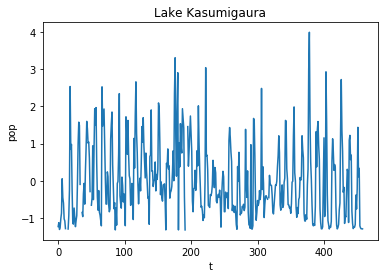

Embedding Dimension = 2
(453,) (453,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -594.618
[02] theta: 1.100, delta: 1.100, log Likelihood: -587.765
[03] theta: 0.550, delta: 2.310, log Likelihood: -582.300
[04] theta: 0.825, delta: 3.641, log Likelihood: -578.928
[05] theta: 0.688, delta: 5.105, log Likelihood: -576.515
[06] theta: 0.536, delta: 6.716, log Likelihood: -574.733
[07] theta: 0.612, delta: 8.487, log Likelihood: -573.268
[08] theta: 0.574, delta: 10.436, log Likelihood: -571.967
[09] theta: 0.532, delta: 12.579, log Likelihood: -570.767
[10] theta: 0.487, delta: 14.937, log Likelihood: -569.646
[11] theta: 0.436, delta: 17.531, log Likelihood: -568.608
[12] theta: 0.381, delta: 20.384, log Likelihood: -567.673
[13] theta: 0.409, delta: 23.523, log Likelihood: -566.841
[14] theta: 0.395, delta: 26.975, log Likelihood: -566.101
[15] theta: 0.380, delta: 30.772, log Likelihood: -565.458
[16] theta: 0.363, delta: 34.950, log Likelihood: -564.907
[17] theta: 0.344, delta:

[04] theta: 0.000, delta: 0.825, log Likelihood: -518.399
[05] theta: 0.303, delta: 1.128, log Likelihood: -515.642
[06] theta: 0.635, delta: 1.460, log Likelihood: -516.088
[07] theta: 0.469, delta: 1.826, log Likelihood: -515.053
[08] theta: 0.286, delta: 2.229, log Likelihood: -515.036
[09] theta: 0.377, delta: 2.672, log Likelihood: -514.932
[10] theta: 0.332, delta: 2.450, log Likelihood: -514.921
[11] theta: 0.354, delta: 2.207, log Likelihood: -514.893
[12] theta: 0.380, delta: 2.329, log Likelihood: -514.882
[13] theta: 0.367, delta: 2.268, log Likelihood: -514.882
[01] theta: 0.000, delta: 0.000, log Likelihood: -520.472
[02] theta: 1.100, delta: 0.000, log Likelihood: -524.584
[03] theta: 0.550, delta: 0.000, log Likelihood: -518.117
[04] theta: 0.000, delta: 0.000, log Likelihood: -520.472
[05] theta: 0.303, delta: 0.000, log Likelihood: -518.245
[06] theta: 0.635, delta: 0.000, log Likelihood: -518.480
[07] theta: 0.469, delta: 0.000, log Likelihood: -517.970
[08] theta: 0.

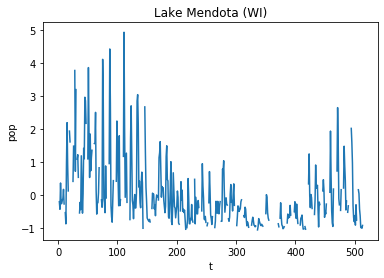

Embedding Dimension = 2
(508,) (508,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -427.382
[02] theta: 1.100, delta: 1.100, log Likelihood: -419.875
[03] theta: 0.550, delta: 2.310, log Likelihood: -413.173
[04] theta: 0.000, delta: 3.641, log Likelihood: -409.112
[05] theta: 0.303, delta: 5.105, log Likelihood: -406.115
[06] theta: 0.151, delta: 6.716, log Likelihood: -403.282
[07] theta: 0.000, delta: 8.487, log Likelihood: -401.094
[08] theta: 0.000, delta: 10.436, log Likelihood: -399.497
[09] theta: 0.000, delta: 12.579, log Likelihood: -398.259
[10] theta: 0.000, delta: 14.937, log Likelihood: -397.305
[11] theta: 0.000, delta: 17.531, log Likelihood: -396.579
[12] theta: 0.000, delta: 20.384, log Likelihood: -396.038
[13] theta: 0.000, delta: 23.523, log Likelihood: -395.649
[14] theta: 0.000, delta: 26.975, log Likelihood: -395.388
[15] theta: 0.000, delta: 30.772, log Likelihood: -395.237
[16] theta: 0.000, delta: 34.950, log Likelihood: -395.180
[17] theta: 0.000, delta:

[03] theta: 0.000, delta: 2.310, log Likelihood: -89.571
[04] theta: 0.000, delta: 3.641, log Likelihood: -88.719
[05] theta: 0.000, delta: 5.105, log Likelihood: -88.074
[06] theta: 0.000, delta: 6.716, log Likelihood: -87.635
[07] theta: 0.000, delta: 8.487, log Likelihood: -87.540
[08] theta: 0.000, delta: 7.601, log Likelihood: -87.527
[09] theta: 0.000, delta: 8.044, log Likelihood: -87.517
[10] theta: 0.000, delta: 7.823, log Likelihood: -87.518
[01] theta: 0.000, delta: 0.000, log Likelihood: -92.474
[02] theta: 0.000, delta: 0.000, log Likelihood: -92.474
Embedding Dimension = 11
(499,) (499,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -70.350
[02] theta: 0.000, delta: 0.000, log Likelihood: -70.350
[01] theta: 0.000, delta: 0.000, log Likelihood: -70.350
[02] theta: 0.000, delta: 0.000, log Likelihood: -70.350
Embedding Dimension = 12
(498,) (498,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -43.953
[02] theta: 0.000, delta: 0.000, log Likelihood: -43.953
[01] theta

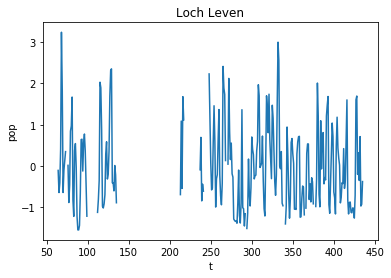

Embedding Dimension = 2
(430,) (430,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -295.301
[02] theta: 0.000, delta: 0.000, log Likelihood: -295.301
[01] theta: 0.000, delta: 0.000, log Likelihood: -295.301
[02] theta: 0.000, delta: 0.000, log Likelihood: -295.301
Embedding Dimension = 3
(429,) (429,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -283.567
[02] theta: 1.100, delta: 0.000, log Likelihood: -287.206
[03] theta: 0.550, delta: 0.000, log Likelihood: -284.438
[04] theta: 0.000, delta: 0.000, log Likelihood: -283.567
[05] theta: 0.303, delta: 0.000, log Likelihood: -283.795
[06] theta: 0.151, delta: 0.000, log Likelihood: -283.604
[07] theta: 0.000, delta: 0.000, log Likelihood: -283.567
[08] theta: 0.083, delta: 0.000, log Likelihood: -283.569
[01] theta: 0.000, delta: 0.000, log Likelihood: -283.567
[02] theta: 1.100, delta: 0.000, log Likelihood: -287.206
[03] theta: 0.550, delta: 0.000, log Likelihood: -284.438
[04] theta: 0.000, delta: 0.000, log Likelihood: -283.

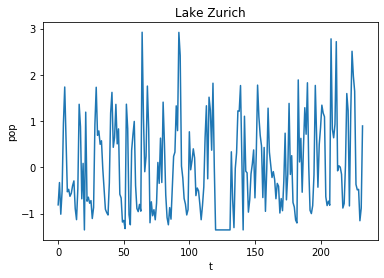

Embedding Dimension = 2
(227,) (227,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -320.626
[02] theta: 1.100, delta: 1.100, log Likelihood: -319.041
[03] theta: 0.550, delta: 2.310, log Likelihood: -319.101
[04] theta: 0.825, delta: 3.641, log Likelihood: -319.135
[05] theta: 0.688, delta: 2.976, log Likelihood: -319.084
[06] theta: 0.756, delta: 2.243, log Likelihood: -319.045
[07] theta: 0.832, delta: 1.438, log Likelihood: -319.037
[01] theta: 0.000, delta: 0.000, log Likelihood: -320.626
[02] theta: 1.100, delta: 0.000, log Likelihood: -319.673
[03] theta: 2.310, delta: 0.000, log Likelihood: -320.629
[04] theta: 1.705, delta: 0.000, log Likelihood: -319.851
[05] theta: 1.040, delta: 0.000, log Likelihood: -319.698
[06] theta: 1.372, delta: 0.000, log Likelihood: -319.657
[07] theta: 1.206, delta: 0.000, log Likelihood: -319.647
Embedding Dimension = 3
(226,) (226,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -320.185
[02] theta: 1.100, delta: 1.100, log Likelihood: -321.

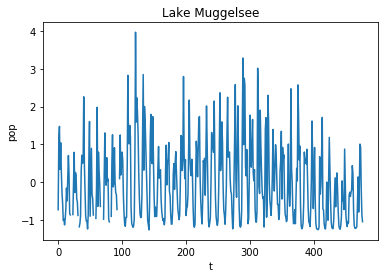

Embedding Dimension = 2
(471,) (471,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -586.524
[02] theta: 1.100, delta: 1.100, log Likelihood: -572.553
[03] theta: 0.550, delta: 2.310, log Likelihood: -565.950
[04] theta: 0.825, delta: 3.641, log Likelihood: -558.599
[05] theta: 1.128, delta: 5.105, log Likelihood: -553.514
[06] theta: 0.976, delta: 6.716, log Likelihood: -549.528
[07] theta: 0.810, delta: 8.487, log Likelihood: -546.494
[08] theta: 0.893, delta: 10.436, log Likelihood: -544.044
[09] theta: 0.851, delta: 12.579, log Likelihood: -542.045
[10] theta: 0.806, delta: 14.937, log Likelihood: -540.391
[11] theta: 0.755, delta: 17.531, log Likelihood: -539.022
[12] theta: 0.700, delta: 20.384, log Likelihood: -537.905
[13] theta: 0.639, delta: 23.523, log Likelihood: -537.020
[14] theta: 0.670, delta: 26.975, log Likelihood: -536.326
[15] theta: 0.654, delta: 30.772, log Likelihood: -535.806
[16] theta: 0.638, delta: 34.950, log Likelihood: -535.432
[17] theta: 0.619, delta:

[02] theta: 1.100, delta: 1.100, log Likelihood: -475.178
[03] theta: 0.550, delta: 2.310, log Likelihood: -477.104
[04] theta: 0.825, delta: 3.641, log Likelihood: -475.212
[05] theta: 0.688, delta: 2.976, log Likelihood: -475.529
[06] theta: 0.756, delta: 3.308, log Likelihood: -475.210
[07] theta: 0.832, delta: 3.142, log Likelihood: -475.018
[08] theta: 0.915, delta: 2.959, log Likelihood: -474.995
[09] theta: 0.873, delta: 2.758, log Likelihood: -474.888
[10] theta: 0.894, delta: 2.536, log Likelihood: -474.833
[11] theta: 0.884, delta: 2.293, log Likelihood: -474.808
[12] theta: 0.889, delta: 2.025, log Likelihood: -474.810
[01] theta: 0.000, delta: 0.000, log Likelihood: -493.508
[02] theta: 1.100, delta: 0.000, log Likelihood: -477.212
[03] theta: 0.550, delta: 0.000, log Likelihood: -481.770
[04] theta: 0.825, delta: 0.000, log Likelihood: -478.392
[05] theta: 1.128, delta: 0.000, log Likelihood: -477.229
[06] theta: 0.976, delta: 0.000, log Likelihood: -477.446
[07] theta: 1.

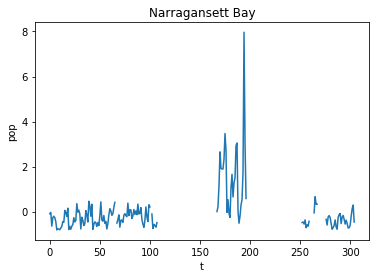

Embedding Dimension = 2
(299,) (299,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -211.332
[02] theta: 0.000, delta: 1.100, log Likelihood: -210.398
[03] theta: 0.000, delta: 2.310, log Likelihood: -208.415
[04] theta: 0.275, delta: 3.641, log Likelihood: -205.477
[05] theta: 0.138, delta: 5.105, log Likelihood: -201.355
[06] theta: 0.000, delta: 6.716, log Likelihood: -197.122
[07] theta: 0.076, delta: 8.487, log Likelihood: -192.966
[08] theta: 0.038, delta: 10.436, log Likelihood: -189.126
[09] theta: 0.057, delta: 12.579, log Likelihood: -186.017
[10] theta: 0.078, delta: 14.937, log Likelihood: -183.896
[11] theta: 0.100, delta: 17.531, log Likelihood: -182.810
[12] theta: 0.089, delta: 20.384, log Likelihood: -182.452
[13] theta: 0.076, delta: 23.523, log Likelihood: -182.488
[14] theta: 0.063, delta: 21.953, log Likelihood: -182.407
[15] theta: 0.047, delta: 20.227, log Likelihood: -182.432
[16] theta: 0.055, delta: 21.090, log Likelihood: -182.401
[17] theta: 0.051, delta:

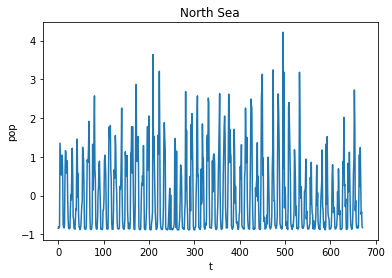

Embedding Dimension = 2
(666,) (666,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -822.916
[02] theta: 1.100, delta: 1.100, log Likelihood: -756.849
[03] theta: 2.310, delta: 2.310, log Likelihood: -747.643
[04] theta: 3.641, delta: 1.705, log Likelihood: -749.606
[05] theta: 2.976, delta: 1.040, log Likelihood: -748.245
[06] theta: 2.243, delta: 1.372, log Likelihood: -747.768
[07] theta: 2.609, delta: 1.738, log Likelihood: -747.754
[08] theta: 2.426, delta: 1.555, log Likelihood: -747.670
[09] theta: 2.225, delta: 1.647, log Likelihood: -747.718
[10] theta: 2.326, delta: 1.747, log Likelihood: -747.653
[11] theta: 2.437, delta: 1.858, log Likelihood: -747.652
[01] theta: 0.000, delta: 0.000, log Likelihood: -822.916
[02] theta: 1.100, delta: 0.000, log Likelihood: -759.012
[03] theta: 2.310, delta: 0.000, log Likelihood: -749.062
[04] theta: 3.641, delta: 0.000, log Likelihood: -750.163
[05] theta: 2.976, delta: 0.000, log Likelihood: -749.180
[06] theta: 2.243, delta: 0.000, l

[02] theta: 1.100, delta: 0.000, log Likelihood: -697.139
[03] theta: 0.550, delta: 0.000, log Likelihood: -693.957
[04] theta: 0.825, delta: 0.000, log Likelihood: -694.079
[05] theta: 0.688, delta: 0.000, log Likelihood: -693.639
[06] theta: 0.536, delta: 0.000, log Likelihood: -694.032
[07] theta: 0.612, delta: 0.000, log Likelihood: -693.718
[08] theta: 0.695, delta: 0.000, log Likelihood: -693.643
[09] theta: 0.653, delta: 0.000, log Likelihood: -693.645
[01] theta: 0.000, delta: 0.000, log Likelihood: -703.734
[02] theta: 1.100, delta: 0.000, log Likelihood: -697.139
[03] theta: 0.550, delta: 0.000, log Likelihood: -693.957
[04] theta: 0.825, delta: 0.000, log Likelihood: -694.079
[05] theta: 0.688, delta: 0.000, log Likelihood: -693.639
[06] theta: 0.536, delta: 0.000, log Likelihood: -694.032
[07] theta: 0.612, delta: 0.000, log Likelihood: -693.718
[08] theta: 0.695, delta: 0.000, log Likelihood: -693.643
[09] theta: 0.653, delta: 0.000, log Likelihood: -693.645
Embedding Dime

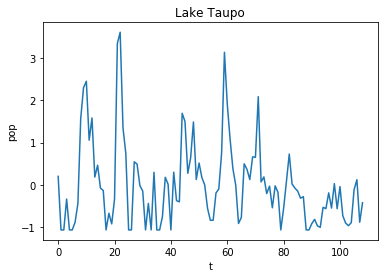

Embedding Dimension = 2
(103,) (103,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -148.748
[02] theta: 0.000, delta: 1.100, log Likelihood: -146.360
[03] theta: 0.250, delta: 2.310, log Likelihood: -145.887
[04] theta: 0.125, delta: 3.641, log Likelihood: -145.277
[05] theta: 0.000, delta: 5.105, log Likelihood: -144.587
[06] theta: 0.000, delta: 6.716, log Likelihood: -143.878
[07] theta: 0.000, delta: 8.487, log Likelihood: -143.130
[08] theta: 0.000, delta: 10.436, log Likelihood: -142.427
[09] theta: 0.000, delta: 12.579, log Likelihood: -141.820
[10] theta: 0.000, delta: 14.937, log Likelihood: -141.337
[11] theta: 0.000, delta: 17.531, log Likelihood: -140.985
[12] theta: 0.000, delta: 20.384, log Likelihood: -140.758
[13] theta: 0.000, delta: 23.523, log Likelihood: -140.643
[14] theta: 0.000, delta: 26.975, log Likelihood: -140.623
[15] theta: 0.000, delta: 25.249, log Likelihood: -140.622
[01] theta: 0.000, delta: 0.000, log Likelihood: -148.748
[02] theta: 0.000, delta: 

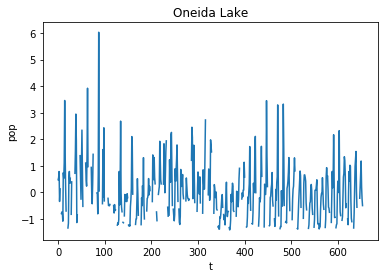

Embedding Dimension = 2
(648,) (648,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -397.105
[02] theta: 1.100, delta: 1.100, log Likelihood: -391.351
[03] theta: 0.550, delta: 2.310, log Likelihood: -390.230
[04] theta: 0.825, delta: 3.641, log Likelihood: -389.804
[05] theta: 0.688, delta: 5.105, log Likelihood: -389.331
[06] theta: 0.536, delta: 6.716, log Likelihood: -389.030
[07] theta: 0.612, delta: 8.487, log Likelihood: -388.598
[08] theta: 0.574, delta: 10.436, log Likelihood: -387.985
[09] theta: 0.593, delta: 12.579, log Likelihood: -387.082
[10] theta: 0.614, delta: 14.937, log Likelihood: -385.893
[11] theta: 0.637, delta: 17.531, log Likelihood: -384.458
[12] theta: 0.625, delta: 20.384, log Likelihood: -382.848
[13] theta: 0.631, delta: 23.523, log Likelihood: -381.143
[14] theta: 0.628, delta: 26.975, log Likelihood: -379.423
[15] theta: 0.625, delta: 30.772, log Likelihood: -377.753
[16] theta: 0.621, delta: 34.950, log Likelihood: -376.186
[17] theta: 0.618, delta:

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:404: RuntimeWarning: invalid value encountered in log
  lnL = (-n/2)*(np.log(mean_squared_residuals) + np.log(2*np.pi) + 1 )
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:402: RuntimeWarning: divide by zero encountered in double_scalars
  mean_squared_residuals = np.sum((Y-Yhat)**2) / (n-k)
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:756: RuntimeWarning: invalid value encountered in ceil
  spos = np.ceil(s) # 0 for - vals, 1 for + vals
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:760: RuntimeWarning: invalid value encountered in ceil
  dweights = np.multiply(delta, ( np.ceil(grad) - 0.5 ) * 2) # make sure signs reflect the orginal gradient


[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, log Likelihood: nan
[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log Likelihood: nan
[15] theta: 0.000, delta: 0.000, log Likelihood: nan
[16] theta: 0.000, delta: 0.000, log Likelihood: nan
[17] theta: 0.000, delta: 0.000, log Likelihood: nan
[18] theta: 0.000, delta: 0.000, log Likelihood: nan
[19] theta: 0.000, delta: 0.000, log Likelihood: nan
[20] theta: 0.000, delta: 0.000, log Likelihood: nan
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihoo

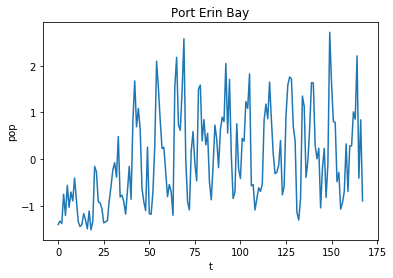

Embedding Dimension = 2
(162,) (162,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -230.773
[02] theta: 1.100, delta: 1.100, log Likelihood: -222.969
[03] theta: 0.550, delta: 2.310, log Likelihood: -217.218
[04] theta: 0.000, delta: 3.641, log Likelihood: -212.146
[05] theta: 0.000, delta: 5.105, log Likelihood: -209.692
[06] theta: 0.000, delta: 6.716, log Likelihood: -207.800
[07] theta: 0.000, delta: 8.487, log Likelihood: -206.293
[08] theta: 0.000, delta: 10.436, log Likelihood: -205.085
[09] theta: 0.000, delta: 12.579, log Likelihood: -204.127
[10] theta: 0.000, delta: 14.937, log Likelihood: -203.391
[11] theta: 0.000, delta: 17.531, log Likelihood: -202.850
[12] theta: 0.000, delta: 20.384, log Likelihood: -202.484
[13] theta: 0.000, delta: 23.523, log Likelihood: -202.275
[14] theta: 0.000, delta: 26.975, log Likelihood: -202.203
[15] theta: 0.000, delta: 30.772, log Likelihood: -202.254
[16] theta: 0.000, delta: 28.874, log Likelihood: -202.215
[17] theta: 0.000, delta:

[05] theta: 0.303, delta: 0.000, log Likelihood: -182.153
[06] theta: 0.151, delta: 0.000, log Likelihood: -181.882
[07] theta: 0.000, delta: 0.000, log Likelihood: -181.996
[08] theta: 0.083, delta: 0.000, log Likelihood: -181.888
[09] theta: 0.175, delta: 0.000, log Likelihood: -181.898
[01] theta: 0.000, delta: 0.000, log Likelihood: -181.996
[02] theta: 1.100, delta: 0.000, log Likelihood: -191.633
[03] theta: 0.550, delta: 0.000, log Likelihood: -183.533
[04] theta: 0.000, delta: 0.000, log Likelihood: -181.996
[05] theta: 0.303, delta: 0.000, log Likelihood: -182.153
[06] theta: 0.151, delta: 0.000, log Likelihood: -181.882
[07] theta: 0.000, delta: 0.000, log Likelihood: -181.996
[08] theta: 0.083, delta: 0.000, log Likelihood: -181.888
[09] theta: 0.175, delta: 0.000, log Likelihood: -181.898
Embedding Dimension = 9
(155,) (155,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -177.523
[02] theta: 0.000, delta: 0.000, log Likelihood: -177.523
[01] theta: 0.000, delta: 0.000, l

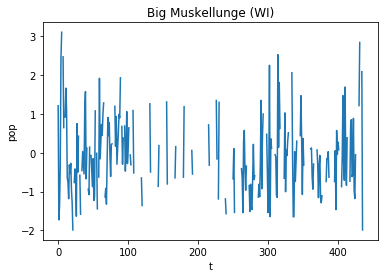

Embedding Dimension = 2
(430,) (430,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -272.378
[02] theta: 0.000, delta: 0.000, log Likelihood: -272.378
[01] theta: 0.000, delta: 0.000, log Likelihood: -272.378
[02] theta: 0.000, delta: 0.000, log Likelihood: -272.378
Embedding Dimension = 3
(429,) (429,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -158.576
[02] theta: 0.000, delta: 0.000, log Likelihood: -158.576
[01] theta: 0.000, delta: 0.000, log Likelihood: -158.576
[02] theta: 0.000, delta: 0.000, log Likelihood: -158.576
Embedding Dimension = 4
(428,) (428,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -115.850
[02] theta: 0.000, delta: 1.100, log Likelihood: -116.199
[03] theta: 0.000, delta: 0.550, log Likelihood: -115.812
[04] theta: 0.000, delta: 0.000, log Likelihood: -115.850
[05] theta: 0.000, delta: 0.303, log Likelihood: -115.755
[06] theta: 0.000, delta: 0.151, log Likelihood: -115.776
[07] theta: 0.000, delta: 0.227, log Likelihood: -115.759
[08] theta: 0.00

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:753: RuntimeWarning: invalid value encountered in true_divide
  grad = grad / la.norm(grad)# np.abs(grad) # NORMALIZE, because rprop ignores magnitude


[16] theta: 0.000, delta: 0.000, log Likelihood: nan
[17] theta: 0.000, delta: 0.000, log Likelihood: nan
[18] theta: 0.000, delta: 0.000, log Likelihood: nan
[19] theta: 0.000, delta: 0.000, log Likelihood: nan
[20] theta: 0.000, delta: 0.000, log Likelihood: nan
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, log Likelihood: nan
[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log Likelihoo

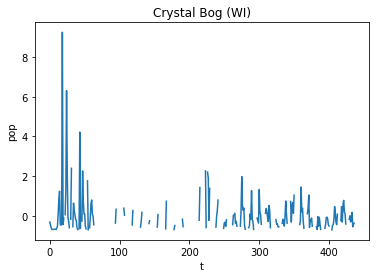

Embedding Dimension = 2
(431,) (431,)
[01] theta: 0.000, delta: 0.000, log Likelihood: -268.524
[02] theta: 1.100, delta: 0.000, log Likelihood: -273.518
[03] theta: 0.550, delta: 0.000, log Likelihood: -270.993
[04] theta: 0.000, delta: 0.000, log Likelihood: -268.524
[05] theta: 0.303, delta: 0.000, log Likelihood: -269.704
[06] theta: 0.151, delta: 0.000, log Likelihood: -268.972
[07] theta: 0.000, delta: 0.000, log Likelihood: -268.524
[08] theta: 0.083, delta: 0.000, log Likelihood: -268.713
[09] theta: 0.042, delta: 0.000, log Likelihood: -268.576
[10] theta: 0.000, delta: 0.000, log Likelihood: -268.524
[11] theta: 0.023, delta: 0.000, log Likelihood: -268.533
[01] theta: 0.000, delta: 0.000, log Likelihood: -268.524
[02] theta: 1.100, delta: 0.000, log Likelihood: -273.518
[03] theta: 0.550, delta: 0.000, log Likelihood: -270.993
[04] theta: 0.000, delta: 0.000, log Likelihood: -268.524
[05] theta: 0.303, delta: 0.000, log Likelihood: -269.704
[06] theta: 0.151, delta: 0.000, l

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:736: RuntimeWarning: invalid value encountered in double_scalars
  if abs(err-errPrev) < 0.01 or count == trainingSteps-1:
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:471: RuntimeWarning: divide by zero encountered in double_scalars
  tr = (t - np.min(T)) / np.ptp(T)
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:472: RuntimeWarning: invalid value encountered in true_divide
  Tr = (T - np.min(T)) / np.ptp(T)


[13] theta: 0.000, delta: 0.000, log Likelihood: -inf
[14] theta: 0.000, delta: 0.000, log Likelihood: -inf
[15] theta: 0.000, delta: 0.000, log Likelihood: -inf
[16] theta: 0.000, delta: 0.000, log Likelihood: -inf
[17] theta: 0.000, delta: 0.000, log Likelihood: -inf
[18] theta: 0.000, delta: 0.000, log Likelihood: -inf
[19] theta: 0.000, delta: 0.000, log Likelihood: -inf
[20] theta: 0.000, delta: 0.000, log Likelihood: -inf
[01] theta: 0.000, delta: 0.000, log Likelihood: -inf
[02] theta: 0.000, delta: 0.000, log Likelihood: -inf
[03] theta: 0.000, delta: 0.000, log Likelihood: -inf
[04] theta: 0.000, delta: 0.000, log Likelihood: -inf
[05] theta: 0.000, delta: 0.000, log Likelihood: -inf
[06] theta: 0.000, delta: 0.000, log Likelihood: -inf
[07] theta: 0.000, delta: 0.000, log Likelihood: -inf
[08] theta: 0.000, delta: 0.000, log Likelihood: -inf
[09] theta: 0.000, delta: 0.000, log Likelihood: -inf
[10] theta: 0.000, delta: 0.000, log Likelihood: -inf
[11] theta: 0.000, delta: 0.

LinAlgError: SVD did not converge

In [13]:
table = np.zeros((len(sites), 8))

for i, location in enumerate(sites):    
    species = "Zooplankton"
    EWdata = data.query("Site == ['{loc}'] and Name == ['{n}']".format(loc=location, n=species))["Abundance"].to_numpy()
    latitude = dataMeta.query(f"Site==['{location}']")["Lat"].to_numpy()[0]
    
    Xr = (EWdata - np.nanmin(EWdata)) / np.ptp(EWdata[np.isfinite(EWdata)]) * np.exp(1) + 1
    Xr = np.log(Xr, where = np.isfinite(Xr), out=Xr)
    Xr = standardize(Xr)
    Xr = Xr.reshape(len(Xr),1)
    t = np.linspace(0,1,num=len(Xr))
    
    plotTS(Xr, title=location)
    
    horizon = 6
    numLags = 1
    lagStep = 1
    maxLags = 10
    minLags = 0

    thetaNS, deltaNS, llikelihoodNS, lagsNS, thetaS, llikelihoodS, lagsS = optimizationSuite(Xr, t, horizon, maxLags, lagStep, minLags=minLags, errFunc=logUnLikelihood)
    table[i, 0] = thetaNS
    table[i, 1] = deltaNS
    table[i, 2] = llikelihoodNS
    table[i, 3] = lagsNS
    table[i, 4] = thetaS
    table[i, 5] = llikelihoodS
    table[i, 6] = lagsS
    table[i, 7] = latitude
    
    print(deltaNS, latitude)
    

In [193]:
species_results = np.zeros((1,10))
species_titles = np.array([["Null"]])

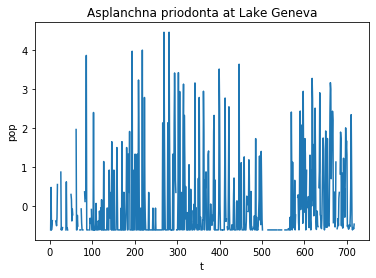

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -822.992
[02] theta: 0.000, delta: 1.100, log Likelihood: -820.270
[03] theta: 0.000, delta: 2.310, log Likelihood: -818.963
[04] theta: 0.000, delta: 3.641, log Likelihood: -818.028
[05] theta: 0.000, delta: 5.105, log Likelihood: -817.070
[06] theta: 0.000, delta: 6.716, log Likelihood: -816.050
[07] theta: 0.000, delta: 8.487, log Likelihood: -815.037
[08] theta: 0.403, delta: 10.436, log Likelihood: -814.550
[09] theta: 0.201, delta: 12.579, log Likelihood: -813.398
[10] theta: 0.000, delta: 14.937, log Likelihood: -812.576
[11] theta: 0.111, delta: 17.531, log Likelihood: -812.091
[12] theta: 0.055, delta: 20.384, log Likelihood: -811.623
[13] theta: 0.000, delta: 23.523, log Likelihood: -811.269
[14] theta: 0.000, delta: 26.975, log Likelihood: -811.042
[15] theta: 0.000, delta: 30.772, log Likelihood: -810.889
[16] theta: 0.000, delta: 34.950, log Likelihood: -810.793
[17] theta: 0.000, delta: 39

[01] theta: 0.000, delta: 0.000, log Likelihood: -690.051
[02] theta: 0.000, delta: 1.100, log Likelihood: -689.306
[03] theta: 0.000, delta: 2.310, log Likelihood: -689.412
[04] theta: 0.000, delta: 1.705, log Likelihood: -689.300
[05] theta: 0.000, delta: 1.040, log Likelihood: -689.317
[06] theta: 0.000, delta: 1.372, log Likelihood: -689.282
[07] theta: 0.000, delta: 1.738, log Likelihood: -689.304
[08] theta: 0.000, delta: 1.555, log Likelihood: -689.287
[09] theta: 0.000, delta: 1.354, log Likelihood: -689.283
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -690.051
[02] theta: 0.000, delta: 0.000, log Likelihood: -690.051
E = 6, tau = 2
(704,) (704,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -647.789
[02] theta: 0.000, delta: 0.000, log Likelihood: -647.789
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -647.789
[02] theta: 0.000, delta: 0.000, log Likelihood: -647.789
E = 6, tau = 6
(688,) (688,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -

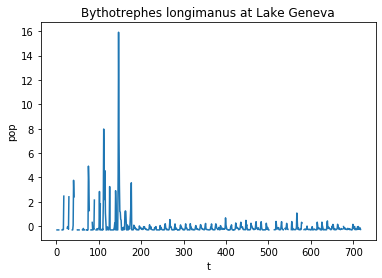

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -826.316
[02] theta: 0.000, delta: 1.100, log Likelihood: -820.614
[03] theta: 0.000, delta: 2.310, log Likelihood: -816.942
[04] theta: 0.000, delta: 3.641, log Likelihood: -814.322
[05] theta: 0.000, delta: 5.105, log Likelihood: -812.292
[06] theta: 0.000, delta: 6.716, log Likelihood: -810.654
[07] theta: 0.000, delta: 8.487, log Likelihood: -809.285
[08] theta: 0.000, delta: 10.436, log Likelihood: -808.113
[09] theta: 0.000, delta: 12.579, log Likelihood: -807.104
[10] theta: 0.000, delta: 14.937, log Likelihood: -806.235
[11] theta: 0.000, delta: 17.531, log Likelihood: -805.485
[12] theta: 0.000, delta: 20.384, log Likelihood: -804.835
[13] theta: 0.000, delta: 23.523, log Likelihood: -804.266
[14] theta: 0.000, delta: 26.975, log Likelihood: -803.764
[15] theta: 0.000, delta: 30.772, log Likelihood: -803.322
[16] theta: 0.000, delta: 34.950, log Likelihood: -802.933
[17] theta: 0.000, delta: 39

[09] theta: 0.377, delta: 0.000, log Likelihood: -789.180
[10] theta: 0.478, delta: 0.000, log Likelihood: -789.155
[11] theta: 0.428, delta: 0.000, log Likelihood: -789.134
[12] theta: 0.453, delta: 0.000, log Likelihood: -789.137
E = 4, tau = 1
(710,) (710,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -709.109
[02] theta: 0.000, delta: 1.100, log Likelihood: -708.093
[03] theta: 0.000, delta: 2.310, log Likelihood: -707.537
[04] theta: 0.000, delta: 3.641, log Likelihood: -707.283
[05] theta: 0.000, delta: 5.105, log Likelihood: -707.247
[06] theta: 0.000, delta: 4.373, log Likelihood: -707.242
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -709.109
[02] theta: 0.000, delta: 0.000, log Likelihood: -709.109
E = 4, tau = 2
(708,) (708,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -721.726
[02] theta: 1.100, delta: 1.100, log Likelihood: -735.497
[03] theta: 0.550, delta: 0.550, log Likelihood: -725.504
[04] theta: 0.000, delta: 0.825, log Likelihood: -719.9

[06] theta: 0.536, delta: 0.000, log Likelihood: -671.648
[07] theta: 0.612, delta: 0.000, log Likelihood: -671.626
[08] theta: 0.574, delta: 0.000, log Likelihood: -671.630
E = 12, tau = 1
(702,) (702,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -630.031
[02] theta: 0.000, delta: 0.000, log Likelihood: -630.031
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -630.031
[02] theta: 0.000, delta: 0.000, log Likelihood: -630.031
E = 12, tau = 2
(692,) (692,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -575.803
[02] theta: 1.100, delta: 1.100, log Likelihood: -594.403
[03] theta: 0.550, delta: 0.550, log Likelihood: -579.747
[04] theta: 0.000, delta: 0.000, log Likelihood: -575.803
[05] theta: 0.303, delta: 0.303, log Likelihood: -575.556
[06] theta: 0.151, delta: 0.635, log Likelihood: -574.436
[07] theta: 0.000, delta: 1.001, log Likelihood: -574.818
[08] theta: 0.083, delta: 1.404, log Likelihood: -574.097
[09] theta: 0.175, delta: 1.847, log Likelihood: -574

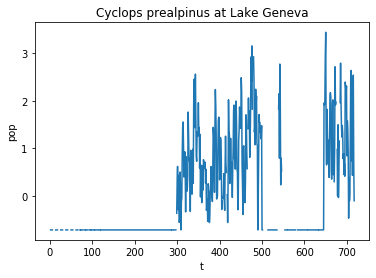

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -635.678
[02] theta: 1.100, delta: 1.100, log Likelihood: -590.099
[03] theta: 2.310, delta: 2.310, log Likelihood: -580.366
[04] theta: 3.641, delta: 3.641, log Likelihood: -581.078
[05] theta: 2.976, delta: 5.105, log Likelihood: -579.668
[06] theta: 2.243, delta: 4.373, log Likelihood: -579.198
[07] theta: 2.609, delta: 4.739, log Likelihood: -579.199
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -635.678
[02] theta: 1.100, delta: 0.000, log Likelihood: -595.191
[03] theta: 2.310, delta: 0.000, log Likelihood: -587.082
[04] theta: 3.641, delta: 0.000, log Likelihood: -587.969
[05] theta: 2.976, delta: 0.000, log Likelihood: -587.128
[06] theta: 2.243, delta: 0.000, log Likelihood: -587.165
[07] theta: 2.609, delta: 0.000, log Likelihood: -586.941
[08] theta: 2.426, delta: 0.000, log Likelihood: -586.986
[09] theta: 2.518, delta: 0.000, log Likelihood: -586.949
[10] theta: 2.619, delta: 0.000,

[12] theta: 1.510, delta: 0.000, log Likelihood: -544.603
[13] theta: 1.449, delta: 0.000, log Likelihood: -544.582
[14] theta: 1.480, delta: 0.000, log Likelihood: -544.583
E = 4, tau = 2
(708,) (708,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -550.487
[02] theta: 1.100, delta: 1.100, log Likelihood: -525.850
[03] theta: 2.310, delta: 2.310, log Likelihood: -532.019
[04] theta: 1.705, delta: 3.641, log Likelihood: -524.400
[05] theta: 1.040, delta: 2.976, log Likelihood: -523.558
[06] theta: 1.372, delta: 3.308, log Likelihood: -522.808
[07] theta: 1.206, delta: 3.674, log Likelihood: -522.860
[08] theta: 1.289, delta: 3.491, log Likelihood: -522.761
[09] theta: 1.381, delta: 3.290, log Likelihood: -522.821
[10] theta: 1.335, delta: 3.391, log Likelihood: -522.769
[11] theta: 1.284, delta: 3.501, log Likelihood: -522.763
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -550.487
[02] theta: 1.100, delta: 0.000, log Likelihood: -529.830
[03] theta: 2.310, delta: 0.000,

[07] theta: 0.000, delta: 0.000, log Likelihood: -355.532
[08] theta: 0.083, delta: 0.000, log Likelihood: -355.596
[09] theta: 0.042, delta: 0.000, log Likelihood: -355.536
[10] theta: 0.000, delta: 0.000, log Likelihood: -355.532
E = 12, tau = 6
(652,) (652,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -333.169
[02] theta: 1.100, delta: 1.100, log Likelihood: -347.267
[03] theta: 0.550, delta: 0.550, log Likelihood: -336.310
[04] theta: 0.000, delta: 0.000, log Likelihood: -333.169
[05] theta: 0.303, delta: 0.303, log Likelihood: -333.803
[06] theta: 0.151, delta: 0.151, log Likelihood: -333.105
[07] theta: 0.000, delta: 0.000, log Likelihood: -333.169
[08] theta: 0.083, delta: 0.083, log Likelihood: -333.029
[09] theta: 0.175, delta: 0.042, log Likelihood: -333.094
[10] theta: 0.129, delta: 0.000, log Likelihood: -333.017
[11] theta: 0.079, delta: 0.000, log Likelihood: -333.018
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -333.169
[02] theta: 1.100, delta: 0.000

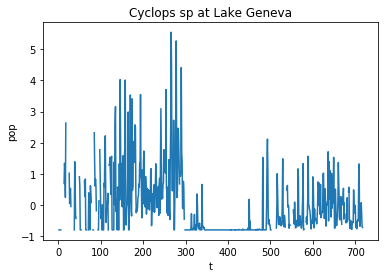

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -778.390
[02] theta: 1.100, delta: 1.100, log Likelihood: -759.452
[03] theta: 2.310, delta: 2.310, log Likelihood: -754.788
[04] theta: 1.705, delta: 3.641, log Likelihood: -747.860
[05] theta: 1.040, delta: 5.105, log Likelihood: -742.008
[06] theta: 0.307, delta: 6.716, log Likelihood: -740.542
[07] theta: 0.673, delta: 8.487, log Likelihood: -734.316
[08] theta: 1.076, delta: 10.436, log Likelihood: -731.729
[09] theta: 0.875, delta: 12.579, log Likelihood: -728.808
[10] theta: 0.653, delta: 14.937, log Likelihood: -726.536
[11] theta: 0.410, delta: 17.531, log Likelihood: -725.083
[12] theta: 0.532, delta: 20.384, log Likelihood: -723.678
[13] theta: 0.471, delta: 23.523, log Likelihood: -722.704
[14] theta: 0.404, delta: 26.975, log Likelihood: -721.932
[15] theta: 0.330, delta: 30.772, log Likelihood: -721.302
[16] theta: 0.249, delta: 34.950, log Likelihood: -720.767
[17] theta: 0.160, delta: 39

[01] theta: 0.000, delta: 0.000, log Likelihood: -734.316
[02] theta: 1.100, delta: 0.000, log Likelihood: -724.902
[03] theta: 0.550, delta: 0.000, log Likelihood: -725.407
[04] theta: 0.825, delta: 0.000, log Likelihood: -724.618
[05] theta: 1.128, delta: 0.000, log Likelihood: -724.978
[06] theta: 0.976, delta: 0.000, log Likelihood: -724.663
[07] theta: 0.810, delta: 0.000, log Likelihood: -724.630
[08] theta: 0.893, delta: 0.000, log Likelihood: -724.602
[09] theta: 0.851, delta: 0.000, log Likelihood: -724.605
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -621.188
[02] theta: 1.100, delta: 1.100, log Likelihood: -626.501
[03] theta: 0.550, delta: 0.550, log Likelihood: -622.294
[04] theta: 0.000, delta: 0.825, log Likelihood: -620.537
[05] theta: 0.303, delta: 1.128, log Likelihood: -620.792
[06] theta: 0.151, delta: 1.460, log Likelihood: -620.120
[07] theta: 0.000, delta: 1.826, log Likelihood: -619.696
[08] theta: 0.083, delta: 2.229, log 

[01] theta: 0.000, delta: 0.000, log Likelihood: -517.416
[02] theta: 1.100, delta: 0.000, log Likelihood: -528.775
[03] theta: 0.550, delta: 0.000, log Likelihood: -520.320
[04] theta: 0.000, delta: 0.000, log Likelihood: -517.416
[05] theta: 0.303, delta: 0.000, log Likelihood: -518.320
[06] theta: 0.151, delta: 0.000, log Likelihood: -517.639
[07] theta: 0.000, delta: 0.000, log Likelihood: -517.416
[08] theta: 0.083, delta: 0.000, log Likelihood: -517.479
[09] theta: 0.042, delta: 0.000, log Likelihood: -517.428
[10] theta: 0.000, delta: 0.000, log Likelihood: -517.416
[11] theta: 0.023, delta: 0.000, log Likelihood: -517.418
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -517.416
[02] theta: 1.100, delta: 0.000, log Likelihood: -528.775
[03] theta: 0.550, delta: 0.000, log Likelihood: -520.320
[04] theta: 0.000, delta: 0.000, log Likelihood: -517.416
[05] theta: 0.303, delta: 0.000, log Likelihood: -518.320
[06] theta: 0.151, delta: 0.000, log Likelihood: -517.639
[07] thet

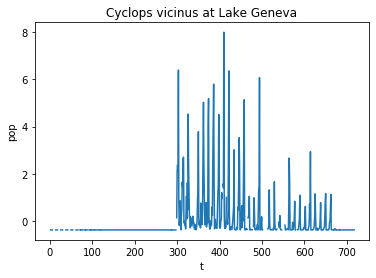

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -843.413
[02] theta: 1.100, delta: 1.100, log Likelihood: -826.559
[03] theta: 2.310, delta: 2.310, log Likelihood: -819.445
[04] theta: 3.641, delta: 3.641, log Likelihood: -816.492
[05] theta: 2.976, delta: 5.105, log Likelihood: -812.877
[06] theta: 2.243, delta: 6.716, log Likelihood: -810.225
[07] theta: 2.609, delta: 8.487, log Likelihood: -808.257
[08] theta: 2.426, delta: 10.436, log Likelihood: -806.671
[09] theta: 2.225, delta: 12.579, log Likelihood: -805.446
[10] theta: 2.004, delta: 14.937, log Likelihood: -804.461
[11] theta: 1.760, delta: 17.531, log Likelihood: -803.579
[12] theta: 1.492, delta: 20.384, log Likelihood: -802.657
[13] theta: 1.197, delta: 23.523, log Likelihood: -801.525
[14] theta: 0.873, delta: 26.975, log Likelihood: -799.929
[15] theta: 0.517, delta: 30.772, log Likelihood: -797.400
[16] theta: 0.124, delta: 34.950, log Likelihood: -792.843
[17] theta: 0.000, delta: 39

[04] theta: 0.825, delta: 0.000, log Likelihood: -794.939
[05] theta: 1.128, delta: 0.000, log Likelihood: -794.724
[06] theta: 0.976, delta: 0.000, log Likelihood: -794.728
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -632.114
[02] theta: 0.000, delta: 0.000, log Likelihood: -632.114
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -632.114
[02] theta: 0.000, delta: 0.000, log Likelihood: -632.114
E = 4, tau = 1
(710,) (710,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -777.365
[02] theta: 1.100, delta: 1.100, log Likelihood: -765.694
[03] theta: 0.550, delta: 2.310, log Likelihood: -761.831
[04] theta: 0.825, delta: 3.641, log Likelihood: -756.276
[05] theta: 0.688, delta: 5.105, log Likelihood: -751.241
[06] theta: 0.536, delta: 6.716, log Likelihood: -746.385
[07] theta: 0.370, delta: 8.487, log Likelihood: -741.722
[08] theta: 0.187, delta: 10.436, log Likelihood: -737.156
[09] theta: 0.000, delta: 12.579, log Likelihood: -733

[20] theta: 0.000, delta: 39.292, log Likelihood: -428.427
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -440.481
[02] theta: 0.000, delta: 0.000, log Likelihood: -440.481
E = 18, tau = 1
(696,) (696,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -387.832
[02] theta: 0.000, delta: 0.000, log Likelihood: -387.832
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -387.832
[02] theta: 0.000, delta: 0.000, log Likelihood: -387.832
E = 18, tau = 2
(680,) (680,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -346.194
[02] theta: 0.000, delta: 0.000, log Likelihood: -346.194
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -346.194
[02] theta: 0.000, delta: 0.000, log Likelihood: -346.194
E = 18, tau = 6
(616,) (616,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -378.991
[02] theta: 0.000, delta: 1.100, log Likelihood: -378.742
[03] theta: 0.000, delta: 2.310, log Likelihood: -378.295
[04] theta: 0.000, delta: 3.641, log Likelihood: -377.886
[05] t

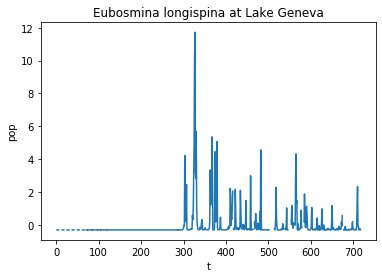

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -841.265
[02] theta: 1.100, delta: 1.100, log Likelihood: -836.178
[03] theta: 0.550, delta: 2.310, log Likelihood: -834.092
[04] theta: 0.825, delta: 3.641, log Likelihood: -832.586
[05] theta: 0.688, delta: 5.105, log Likelihood: -831.280
[06] theta: 0.536, delta: 6.716, log Likelihood: -830.249
[07] theta: 0.612, delta: 8.487, log Likelihood: -829.462
[08] theta: 0.574, delta: 10.436, log Likelihood: -828.796
[09] theta: 0.532, delta: 12.579, log Likelihood: -828.213
[10] theta: 0.487, delta: 14.937, log Likelihood: -827.675
[11] theta: 0.436, delta: 17.531, log Likelihood: -827.153
[12] theta: 0.381, delta: 20.384, log Likelihood: -826.637
[13] theta: 0.320, delta: 23.523, log Likelihood: -826.125
[14] theta: 0.253, delta: 26.975, log Likelihood: -825.618
[15] theta: 0.179, delta: 30.772, log Likelihood: -825.112
[16] theta: 0.098, delta: 34.950, log Likelihood: -824.567
[17] theta: 0.009, delta: 39

[02] theta: 1.100, delta: 0.000, log Likelihood: -801.479
[03] theta: 0.550, delta: 0.000, log Likelihood: -799.787
[04] theta: 0.000, delta: 0.000, log Likelihood: -802.751
[05] theta: 0.303, delta: 0.000, log Likelihood: -800.236
[06] theta: 0.635, delta: 0.000, log Likelihood: -799.870
[07] theta: 0.469, delta: 0.000, log Likelihood: -799.813
[08] theta: 0.552, delta: 0.000, log Likelihood: -799.788
[09] theta: 0.510, delta: 0.000, log Likelihood: -799.786
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -791.660
[02] theta: 1.100, delta: 1.100, log Likelihood: -792.591
[03] theta: 0.550, delta: 2.310, log Likelihood: -788.134
[04] theta: 0.000, delta: 3.641, log Likelihood: -787.970
[05] theta: 0.303, delta: 5.105, log Likelihood: -785.153
[06] theta: 0.151, delta: 6.716, log Likelihood: -784.046
[07] theta: 0.227, delta: 8.487, log Likelihood: -782.923
[08] theta: 0.189, delta: 10.436, log Likelihood: -781.894
[09] theta: 0.147, delta: 12.579, lo

[14] theta: 0.218, delta: 5.346, log Likelihood: -729.551
[15] theta: 0.215, delta: 6.131, log Likelihood: -729.102
[16] theta: 0.212, delta: 6.994, log Likelihood: -728.689
[17] theta: 0.208, delta: 7.943, log Likelihood: -728.316
[18] theta: 0.204, delta: 8.987, log Likelihood: -727.984
[19] theta: 0.199, delta: 10.136, log Likelihood: -727.688
[20] theta: 0.194, delta: 11.400, log Likelihood: -727.422
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -733.636
[02] theta: 1.100, delta: 0.000, log Likelihood: -740.264
[03] theta: 0.550, delta: 0.000, log Likelihood: -735.146
[04] theta: 0.000, delta: 0.000, log Likelihood: -733.636
[05] theta: 0.303, delta: 0.000, log Likelihood: -733.976
[06] theta: 0.151, delta: 0.000, log Likelihood: -733.554
[07] theta: 0.000, delta: 0.000, log Likelihood: -733.636
[08] theta: 0.083, delta: 0.000, log Likelihood: -733.489
[09] theta: 0.042, delta: 0.000, log Likelihood: -733.524
[10] theta: 0.062, delta: 0.000, log Likelihood: -733.498
[11] th

[01] theta: 0.000, delta: 0.000, log Likelihood: -380.253
[02] theta: 0.000, delta: 0.000, log Likelihood: -380.253
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -380.253
[02] theta: 0.000, delta: 0.000, log Likelihood: -380.253
(6, 1) (6, 1)
NSMap: 
 Max Likelihood -318.9729857949637 
 Lags: 22 
 tau: 2 
 Theta: 0.0 
 Delta: 0.0
SMap: 
 Max Likelihood -318.9729857949637 
 Lags: 22 
 tau: 2 
 Theta: 0.0
0.0 46.43


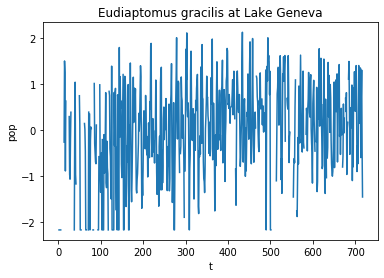

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -809.243
[02] theta: 1.100, delta: 1.100, log Likelihood: -802.808
[03] theta: 0.550, delta: 2.310, log Likelihood: -795.898
[04] theta: 0.000, delta: 3.641, log Likelihood: -790.618
[05] theta: 0.000, delta: 5.105, log Likelihood: -787.763
[06] theta: 0.000, delta: 6.716, log Likelihood: -785.562
[07] theta: 0.000, delta: 8.487, log Likelihood: -783.869
[08] theta: 0.000, delta: 10.436, log Likelihood: -782.582
[09] theta: 0.000, delta: 12.579, log Likelihood: -781.625
[10] theta: 0.000, delta: 14.937, log Likelihood: -780.936
[11] theta: 0.000, delta: 17.531, log Likelihood: -780.467
[12] theta: 0.000, delta: 20.384, log Likelihood: -780.177
[13] theta: 0.000, delta: 23.523, log Likelihood: -780.034
[14] theta: 0.000, delta: 26.975, log Likelihood: -780.006
[15] theta: 0.000, delta: 25.249, log Likelihood: -780.007
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -809.243
[02] theta: 1.100, delta

[15] theta: 0.000, delta: 20.456, log Likelihood: -698.565
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -723.740
[02] theta: 0.000, delta: 0.000, log Likelihood: -723.740
E = 4, tau = 2
(708,) (708,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -696.389
[02] theta: 1.100, delta: 1.100, log Likelihood: -697.277
[03] theta: 0.550, delta: 2.310, log Likelihood: -688.810
[04] theta: 0.000, delta: 3.641, log Likelihood: -685.519
[05] theta: 0.303, delta: 5.105, log Likelihood: -683.001
[06] theta: 0.151, delta: 6.716, log Likelihood: -681.293
[07] theta: 0.227, delta: 8.487, log Likelihood: -679.948
[08] theta: 0.189, delta: 10.436, log Likelihood: -678.992
[09] theta: 0.208, delta: 12.579, log Likelihood: -678.344
[10] theta: 0.199, delta: 14.937, log Likelihood: -677.944
[11] theta: 0.188, delta: 17.531, log Likelihood: -677.757
[12] theta: 0.177, delta: 20.384, log Likelihood: -677.746
[13] theta: 0.164, delta: 18.958, log Likelihood: -677.719
[14] theta: 0.150, delta:

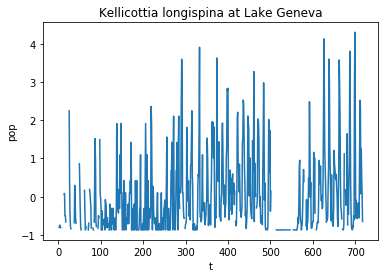

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -818.316
[02] theta: 1.100, delta: 1.100, log Likelihood: -806.002
[03] theta: 2.310, delta: 2.310, log Likelihood: -803.583
[04] theta: 1.705, delta: 3.641, log Likelihood: -800.064
[05] theta: 1.040, delta: 5.105, log Likelihood: -797.718
[06] theta: 1.372, delta: 6.716, log Likelihood: -796.320
[07] theta: 1.206, delta: 8.487, log Likelihood: -794.559
[08] theta: 1.023, delta: 10.436, log Likelihood: -792.743
[09] theta: 0.822, delta: 12.579, log Likelihood: -790.888
[10] theta: 0.600, delta: 14.937, log Likelihood: -789.079
[11] theta: 0.711, delta: 17.531, log Likelihood: -787.505
[12] theta: 0.655, delta: 20.384, log Likelihood: -785.929
[13] theta: 0.595, delta: 23.523, log Likelihood: -784.436
[14] theta: 0.528, delta: 26.975, log Likelihood: -783.019
[15] theta: 0.454, delta: 30.772, log Likelihood: -781.663
[16] theta: 0.373, delta: 34.950, log Likelihood: -780.356
[17] theta: 0.284, delta: 39

[05] theta: 1.128, delta: 0.000, log Likelihood: -772.939
[06] theta: 0.976, delta: 0.000, log Likelihood: -772.863
[07] theta: 1.052, delta: 0.000, log Likelihood: -772.877
[08] theta: 1.014, delta: 0.000, log Likelihood: -772.864
[09] theta: 0.972, delta: 0.000, log Likelihood: -772.863
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -689.689
[02] theta: 1.100, delta: 1.100, log Likelihood: -686.534
[03] theta: 0.550, delta: 2.310, log Likelihood: -684.091
[04] theta: 0.000, delta: 3.641, log Likelihood: -682.598
[05] theta: 0.000, delta: 5.105, log Likelihood: -681.884
[06] theta: 0.000, delta: 6.716, log Likelihood: -681.313
[07] theta: 0.000, delta: 8.487, log Likelihood: -680.803
[08] theta: 0.000, delta: 10.436, log Likelihood: -680.342
[09] theta: 0.000, delta: 12.579, log Likelihood: -679.947
[10] theta: 0.000, delta: 14.937, log Likelihood: -679.634
[11] theta: 0.000, delta: 17.531, log Likelihood: -679.418
[12] theta: 0.000, delta: 20.384,

[08] theta: 0.286, delta: 0.000, log Likelihood: -607.209
[09] theta: 0.377, delta: 0.000, log Likelihood: -607.126
[10] theta: 0.478, delta: 0.000, log Likelihood: -607.131
E = 6, tau = 6
(688,) (688,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -569.580
[02] theta: 0.000, delta: 1.100, log Likelihood: -569.064
[03] theta: 0.000, delta: 0.550, log Likelihood: -569.173
[04] theta: 0.000, delta: 0.825, log Likelihood: -569.088
[05] theta: 0.000, delta: 1.128, log Likelihood: -569.065
[06] theta: 0.000, delta: 0.976, log Likelihood: -569.068
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -569.580
[02] theta: 0.000, delta: 0.000, log Likelihood: -569.580
E = 12, tau = 1
(702,) (702,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -518.785
[02] theta: 1.100, delta: 0.000, log Likelihood: -533.171
[03] theta: 0.550, delta: 0.000, log Likelihood: -520.368
[04] theta: 0.000, delta: 0.000, log Likelihood: -518.785
[05] theta: 0.303, delta: 0.000, log Likelihood: -518.

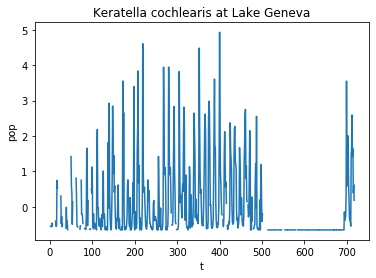

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -826.738
[02] theta: 1.100, delta: 1.100, log Likelihood: -797.021
[03] theta: 2.310, delta: 2.310, log Likelihood: -780.974
[04] theta: 3.641, delta: 3.641, log Likelihood: -774.233
[05] theta: 2.976, delta: 5.105, log Likelihood: -767.195
[06] theta: 2.243, delta: 6.716, log Likelihood: -761.058
[07] theta: 1.438, delta: 8.487, log Likelihood: -756.232
[08] theta: 1.841, delta: 10.436, log Likelihood: -752.468
[09] theta: 1.640, delta: 12.579, log Likelihood: -748.926
[10] theta: 1.418, delta: 14.937, log Likelihood: -745.786
[11] theta: 1.174, delta: 17.531, log Likelihood: -743.267
[12] theta: 1.296, delta: 20.384, log Likelihood: -741.312
[13] theta: 1.235, delta: 23.523, log Likelihood: -739.631
[14] theta: 1.168, delta: 26.975, log Likelihood: -738.285
[15] theta: 1.095, delta: 30.772, log Likelihood: -737.271
[16] theta: 1.132, delta: 34.950, log Likelihood: -736.562
[17] theta: 1.113, delta: 39

[02] theta: 1.100, delta: 0.000, log Likelihood: -755.866
[03] theta: 2.310, delta: 0.000, log Likelihood: -756.603
[04] theta: 1.705, delta: 0.000, log Likelihood: -754.180
[05] theta: 1.040, delta: 0.000, log Likelihood: -756.386
[06] theta: 1.372, delta: 0.000, log Likelihood: -754.411
[07] theta: 1.738, delta: 0.000, log Likelihood: -754.230
[08] theta: 1.555, delta: 0.000, log Likelihood: -754.107
[09] theta: 1.647, delta: 0.000, log Likelihood: -754.120
[10] theta: 1.601, delta: 0.000, log Likelihood: -754.101
[11] theta: 1.551, delta: 0.000, log Likelihood: -754.109
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -688.555
[02] theta: 1.100, delta: 1.100, log Likelihood: -679.967
[03] theta: 2.310, delta: 2.310, log Likelihood: -683.891
[04] theta: 1.705, delta: 1.705, log Likelihood: -680.767
[05] theta: 1.040, delta: 2.008, log Likelihood: -679.708
[06] theta: 1.372, delta: 2.340, log Likelihood: -679.867
[07] theta: 1.206, delta: 2.706, log 

[05] theta: 0.303, delta: 0.303, log Likelihood: -602.489
[06] theta: 0.151, delta: 0.635, log Likelihood: -602.338
[07] theta: 0.227, delta: 1.001, log Likelihood: -602.275
[08] theta: 0.189, delta: 1.404, log Likelihood: -602.223
[09] theta: 0.147, delta: 1.203, log Likelihood: -602.203
[10] theta: 0.102, delta: 1.303, log Likelihood: -602.196
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -603.159
[02] theta: 1.100, delta: 0.000, log Likelihood: -607.226
[03] theta: 0.550, delta: 0.000, log Likelihood: -603.104
[04] theta: 0.000, delta: 0.000, log Likelihood: -603.159
[05] theta: 0.303, delta: 0.000, log Likelihood: -602.595
[06] theta: 0.151, delta: 0.000, log Likelihood: -602.698
[07] theta: 0.227, delta: 0.000, log Likelihood: -602.605
[08] theta: 0.310, delta: 0.000, log Likelihood: -602.599
E = 6, tau = 6
(688,) (688,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -560.776
[02] theta: 1.100, delta: 1.100, log Likelihood: -566.409
[03] theta: 0.550, delta: 0.550,

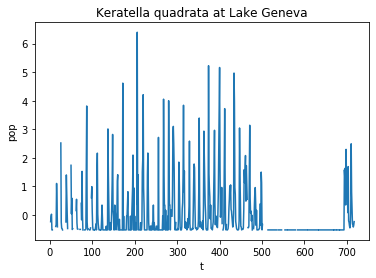

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -824.727
[02] theta: 0.000, delta: 1.100, log Likelihood: -822.061
[03] theta: 0.250, delta: 2.310, log Likelihood: -816.604
[04] theta: 0.525, delta: 3.641, log Likelihood: -811.661
[05] theta: 0.828, delta: 5.105, log Likelihood: -808.377
[06] theta: 0.676, delta: 6.716, log Likelihood: -805.244
[07] theta: 0.510, delta: 8.487, log Likelihood: -802.494
[08] theta: 0.327, delta: 10.436, log Likelihood: -800.197
[09] theta: 0.126, delta: 12.579, log Likelihood: -798.991
[10] theta: 0.226, delta: 14.937, log Likelihood: -797.140
[11] theta: 0.337, delta: 17.531, log Likelihood: -795.993
[12] theta: 0.282, delta: 20.384, log Likelihood: -795.048
[13] theta: 0.221, delta: 23.523, log Likelihood: -794.398
[14] theta: 0.251, delta: 26.975, log Likelihood: -793.827
[15] theta: 0.285, delta: 30.772, log Likelihood: -793.446
[16] theta: 0.268, delta: 34.950, log Likelihood: -793.203
[17] theta: 0.249, delta: 39

[05] theta: 0.688, delta: 0.000, log Likelihood: -717.272
[06] theta: 0.536, delta: 0.000, log Likelihood: -717.244
[07] theta: 0.612, delta: 0.000, log Likelihood: -717.218
[08] theta: 0.574, delta: 0.000, log Likelihood: -717.220
E = 4, tau = 1
(710,) (710,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -754.395
[02] theta: 1.100, delta: 1.100, log Likelihood: -750.683
[03] theta: 0.550, delta: 2.310, log Likelihood: -744.180
[04] theta: 0.000, delta: 3.641, log Likelihood: -742.453
[05] theta: 0.303, delta: 5.105, log Likelihood: -738.160
[06] theta: 0.151, delta: 6.716, log Likelihood: -735.906
[07] theta: 0.227, delta: 8.487, log Likelihood: -734.262
[08] theta: 0.189, delta: 10.436, log Likelihood: -732.892
[09] theta: 0.147, delta: 12.579, log Likelihood: -731.741
[10] theta: 0.102, delta: 14.937, log Likelihood: -730.736
[11] theta: 0.051, delta: 17.531, log Likelihood: -729.860
[12] theta: 0.000, delta: 20.384, log Likelihood: -729.139
[13] theta: 0.000, delta: 23.523

[03] theta: 0.550, delta: 0.000, log Likelihood: -494.108
[04] theta: 0.000, delta: 0.000, log Likelihood: -492.989
[05] theta: 0.303, delta: 0.000, log Likelihood: -492.782
[06] theta: 0.151, delta: 0.000, log Likelihood: -492.642
[07] theta: 0.227, delta: 0.000, log Likelihood: -492.651
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -492.989
[02] theta: 1.100, delta: 0.000, log Likelihood: -502.812
[03] theta: 0.550, delta: 0.000, log Likelihood: -494.108
[04] theta: 0.000, delta: 0.000, log Likelihood: -492.989
[05] theta: 0.303, delta: 0.000, log Likelihood: -492.782
[06] theta: 0.151, delta: 0.000, log Likelihood: -492.642
[07] theta: 0.227, delta: 0.000, log Likelihood: -492.651
E = 12, tau = 6
(652,) (652,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -456.559
[02] theta: 0.000, delta: 0.000, log Likelihood: -456.559
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -456.559
[02] theta: 0.000, delta: 0.000, log Likelihood: -456.559
E = 18, tau = 1
(696,) (69

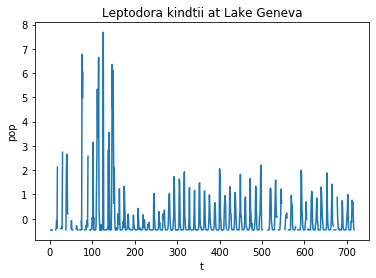

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -799.014
[02] theta: 1.100, delta: 1.100, log Likelihood: -779.823
[03] theta: 2.310, delta: 2.310, log Likelihood: -778.851
[04] theta: 1.705, delta: 1.705, log Likelihood: -778.796
[05] theta: 2.008, delta: 1.040, log Likelihood: -778.440
[06] theta: 2.340, delta: 0.307, log Likelihood: -778.081
[07] theta: 2.706, delta: 0.000, log Likelihood: -777.909
[08] theta: 3.109, delta: 0.000, log Likelihood: -777.852
[09] theta: 2.908, delta: 0.000, log Likelihood: -777.865
[10] theta: 3.008, delta: 0.000, log Likelihood: -777.855
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -799.014
[02] theta: 1.100, delta: 0.000, log Likelihood: -780.440
[03] theta: 2.310, delta: 0.000, log Likelihood: -778.109
[04] theta: 3.641, delta: 0.000, log Likelihood: -777.951
[05] theta: 2.976, delta: 0.000, log Likelihood: -777.857
[06] theta: 3.308, delta: 0.000, log Likelihood: -777.869
[07] theta: 3.142, delta: 0.000,

[10] theta: 1.455, delta: 0.000, log Likelihood: -635.190
[11] theta: 1.565, delta: 0.000, log Likelihood: -635.202
[12] theta: 1.510, delta: 0.000, log Likelihood: -635.177
[13] theta: 1.449, delta: 0.000, log Likelihood: -635.194
[14] theta: 1.480, delta: 0.000, log Likelihood: -635.179
[15] theta: 1.513, delta: 0.000, log Likelihood: -635.177
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -649.765
[02] theta: 1.100, delta: 0.000, log Likelihood: -636.207
[03] theta: 2.310, delta: 0.000, log Likelihood: -639.147
[04] theta: 1.705, delta: 0.000, log Likelihood: -635.437
[05] theta: 1.040, delta: 0.000, log Likelihood: -636.540
[06] theta: 1.372, delta: 0.000, log Likelihood: -635.282
[07] theta: 1.738, delta: 0.000, log Likelihood: -635.529
[08] theta: 1.555, delta: 0.000, log Likelihood: -635.195
[09] theta: 1.354, delta: 0.000, log Likelihood: -635.315
[10] theta: 1.455, delta: 0.000, log Likelihood: -635.190
[11] theta: 1.565, delta: 0.000, log Likelihood: -635.202
[12] thet

[07] theta: 0.227, delta: 0.000, log Likelihood: -481.205
[08] theta: 0.310, delta: 0.000, log Likelihood: -481.116
[09] theta: 0.268, delta: 0.000, log Likelihood: -481.105
[10] theta: 0.289, delta: 0.000, log Likelihood: -481.097
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -483.945
[02] theta: 1.100, delta: 0.000, log Likelihood: -493.036
[03] theta: 0.550, delta: 0.000, log Likelihood: -482.886
[04] theta: 0.000, delta: 0.000, log Likelihood: -483.945
[05] theta: 0.303, delta: 0.000, log Likelihood: -481.106
[06] theta: 0.151, delta: 0.000, log Likelihood: -481.695
[07] theta: 0.227, delta: 0.000, log Likelihood: -481.205
[08] theta: 0.310, delta: 0.000, log Likelihood: -481.116
[09] theta: 0.268, delta: 0.000, log Likelihood: -481.105
[10] theta: 0.289, delta: 0.000, log Likelihood: -481.097
E = 12, tau = 6
(652,) (652,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -312.108
[02] theta: 1.100, delta: 1.100, log Likelihood: -346.218
[03] theta: 0.550, delta: 0.550

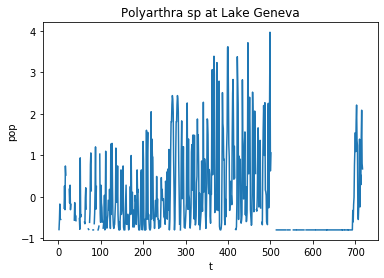

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -822.046
[02] theta: 1.100, delta: 1.100, log Likelihood: -785.005
[03] theta: 2.310, delta: 2.310, log Likelihood: -768.042
[04] theta: 3.641, delta: 3.641, log Likelihood: -759.896
[05] theta: 2.976, delta: 5.105, log Likelihood: -751.638
[06] theta: 2.243, delta: 6.716, log Likelihood: -744.401
[07] theta: 1.438, delta: 8.487, log Likelihood: -738.979
[08] theta: 1.841, delta: 10.436, log Likelihood: -734.092
[09] theta: 1.640, delta: 12.579, log Likelihood: -730.071
[10] theta: 1.418, delta: 14.937, log Likelihood: -726.718
[11] theta: 1.174, delta: 17.531, log Likelihood: -724.247
[12] theta: 1.296, delta: 20.384, log Likelihood: -722.039
[13] theta: 1.235, delta: 23.523, log Likelihood: -720.481
[14] theta: 1.168, delta: 26.975, log Likelihood: -719.370
[15] theta: 1.202, delta: 30.772, log Likelihood: -718.672
[16] theta: 1.185, delta: 34.950, log Likelihood: -718.277
[17] theta: 1.167, delta: 39

[16] theta: 1.018, delta: 34.950, log Likelihood: -684.503
[17] theta: 0.929, delta: 39.545, log Likelihood: -684.051
[18] theta: 0.973, delta: 44.599, log Likelihood: -683.897
[19] theta: 0.951, delta: 50.159, log Likelihood: -683.887
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -771.975
[02] theta: 1.100, delta: 0.000, log Likelihood: -749.023
[03] theta: 2.310, delta: 0.000, log Likelihood: -749.655
[04] theta: 1.705, delta: 0.000, log Likelihood: -747.600
[05] theta: 1.040, delta: 0.000, log Likelihood: -749.422
[06] theta: 1.372, delta: 0.000, log Likelihood: -747.861
[07] theta: 1.738, delta: 0.000, log Likelihood: -747.634
[08] theta: 1.555, delta: 0.000, log Likelihood: -747.577
[09] theta: 1.647, delta: 0.000, log Likelihood: -747.565
[10] theta: 1.601, delta: 0.000, log Likelihood: -747.561
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -648.663
[02] theta: 1.100, delta: 1.100, log Likelihood: -644.305
[03] theta: 0.550, delta: 2.

[15] theta: 0.289, delta: 30.772, log Likelihood: -629.639
[16] theta: 0.208, delta: 34.950, log Likelihood: -628.504
[17] theta: 0.119, delta: 39.545, log Likelihood: -627.470
[18] theta: 0.021, delta: 44.599, log Likelihood: -626.590
[19] theta: 0.000, delta: 50.159, log Likelihood: -626.243
[20] theta: 0.000, delta: 56.275, log Likelihood: -626.136
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -668.900
[02] theta: 1.100, delta: 0.000, log Likelihood: -657.585
[03] theta: 0.550, delta: 0.000, log Likelihood: -656.507
[04] theta: 0.825, delta: 0.000, log Likelihood: -655.834
[05] theta: 0.688, delta: 0.000, log Likelihood: -655.833
E = 6, tau = 2
(704,) (704,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -562.321
[02] theta: 1.100, delta: 1.100, log Likelihood: -571.023
[03] theta: 0.550, delta: 2.310, log Likelihood: -562.912
[04] theta: 0.000, delta: 3.641, log Likelihood: -560.457
[05] theta: 0.303, delta: 5.105, log Likelihood: -559.937
[06] theta: 0.151, delta: 

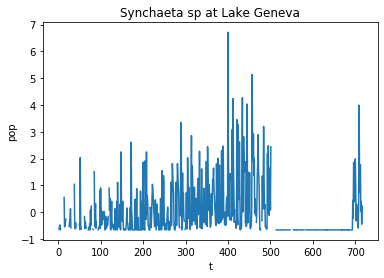

E = 2, tau = 1
(712,) (712,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -823.803
[02] theta: 1.100, delta: 1.100, log Likelihood: -806.522
[03] theta: 2.310, delta: 2.310, log Likelihood: -798.430
[04] theta: 1.705, delta: 3.641, log Likelihood: -792.063
[05] theta: 2.008, delta: 5.105, log Likelihood: -787.564
[06] theta: 1.856, delta: 6.716, log Likelihood: -783.924
[07] theta: 1.690, delta: 8.487, log Likelihood: -781.040
[08] theta: 1.507, delta: 10.436, log Likelihood: -778.607
[09] theta: 1.306, delta: 12.579, log Likelihood: -776.380
[10] theta: 1.084, delta: 14.937, log Likelihood: -774.214
[11] theta: 0.841, delta: 17.531, log Likelihood: -772.068
[12] theta: 0.573, delta: 20.384, log Likelihood: -770.037
[13] theta: 0.278, delta: 23.523, log Likelihood: -768.545
[14] theta: 0.425, delta: 26.975, log Likelihood: -766.673
[15] theta: 0.352, delta: 30.772, log Likelihood: -765.291
[16] theta: 0.270, delta: 34.950, log Likelihood: -764.141
[17] theta: 0.311, delta: 39

[02] theta: 1.100, delta: 0.000, log Likelihood: -774.623
[03] theta: 0.550, delta: 0.000, log Likelihood: -774.917
[04] theta: 0.825, delta: 0.000, log Likelihood: -774.240
[05] theta: 1.128, delta: 0.000, log Likelihood: -774.707
[06] theta: 0.976, delta: 0.000, log Likelihood: -774.341
[07] theta: 0.810, delta: 0.000, log Likelihood: -774.246
[08] theta: 0.893, delta: 0.000, log Likelihood: -774.250
E = 3, tau = 6
(706,) (706,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -699.015
[02] theta: 1.100, delta: 1.100, log Likelihood: -697.246
[03] theta: 0.550, delta: 2.310, log Likelihood: -692.424
[04] theta: 0.000, delta: 3.641, log Likelihood: -693.111
[05] theta: 0.303, delta: 5.105, log Likelihood: -689.017
[06] theta: 0.635, delta: 6.716, log Likelihood: -688.320
[07] theta: 0.469, delta: 8.487, log Likelihood: -687.020
[08] theta: 0.286, delta: 10.436, log Likelihood: -686.169
[09] theta: 0.085, delta: 12.579, log Likelihood: -686.084
[10] theta: 0.185, delta: 14.937, l

[07] theta: 0.469, delta: 0.000, log Likelihood: -683.089
[08] theta: 0.552, delta: 0.000, log Likelihood: -683.126
[09] theta: 0.510, delta: 0.000, log Likelihood: -683.085
[10] theta: 0.465, delta: 0.000, log Likelihood: -683.092
E = 6, tau = 2
(704,) (704,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -608.772
[02] theta: 0.000, delta: 1.100, log Likelihood: -608.540
[03] theta: 0.000, delta: 2.310, log Likelihood: -608.300
[04] theta: 0.000, delta: 3.641, log Likelihood: -607.949
[05] theta: 0.000, delta: 5.105, log Likelihood: -607.635
[06] theta: 0.000, delta: 6.716, log Likelihood: -607.549
[07] theta: 0.000, delta: 5.910, log Likelihood: -607.553
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -608.772
[02] theta: 0.000, delta: 0.000, log Likelihood: -608.772
E = 6, tau = 6
(688,) (688,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -571.527
[02] theta: 0.000, delta: 1.100, log Likelihood: -570.768
[03] theta: 0.000, delta: 2.310, log Likelihood: -570.2

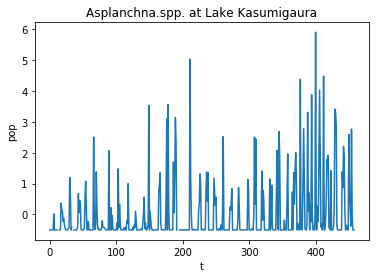

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -626.162
[02] theta: 1.100, delta: 1.100, log Likelihood: -607.129
[03] theta: 0.550, delta: 2.310, log Likelihood: -604.079
[04] theta: 0.825, delta: 3.641, log Likelihood: -600.723
[05] theta: 1.128, delta: 5.105, log Likelihood: -599.213
[06] theta: 0.976, delta: 6.716, log Likelihood: -598.445
[07] theta: 1.052, delta: 8.487, log Likelihood: -598.133
[08] theta: 1.014, delta: 10.436, log Likelihood: -598.026
[09] theta: 0.972, delta: 12.579, log Likelihood: -597.997
[10] theta: 0.927, delta: 11.508, log Likelihood: -597.990
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -626.162
[02] theta: 1.100, delta: 0.000, log Likelihood: -613.913
[03] theta: 2.310, delta: 0.000, log Likelihood: -615.018
[04] theta: 1.705, delta: 0.000, log Likelihood: -614.068
[05] theta: 1.040, delta: 0.000, log Likelihood: -613.979
[06] theta: 1.372, delta: 0.000, log Likelihood: -613.832
[07] theta: 1.206, delta: 0.0

[05] theta: 0.688, delta: 0.000, log Likelihood: -608.812
[06] theta: 0.536, delta: 0.000, log Likelihood: -608.884
[07] theta: 0.612, delta: 0.000, log Likelihood: -608.790
[08] theta: 0.695, delta: 0.000, log Likelihood: -608.820
[09] theta: 0.653, delta: 0.000, log Likelihood: -608.788
[10] theta: 0.608, delta: 0.000, log Likelihood: -608.792
E = 4, tau = 2
(449,) (449,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -606.346
[02] theta: 1.100, delta: 1.100, log Likelihood: -594.639
[03] theta: 0.550, delta: 2.310, log Likelihood: -589.443
[04] theta: 0.825, delta: 3.641, log Likelihood: -588.357
[05] theta: 0.688, delta: 5.105, log Likelihood: -587.395
[06] theta: 0.536, delta: 6.716, log Likelihood: -587.330
[07] theta: 0.612, delta: 5.910, log Likelihood: -587.259
[08] theta: 0.574, delta: 5.025, log Likelihood: -587.303
[09] theta: 0.593, delta: 5.467, log Likelihood: -587.253
[10] theta: 0.584, delta: 5.955, log Likelihood: -587.251
SMap
[01] theta: 0.000, delta: 0.000,

[11] theta: 0.079, delta: 0.000, log Likelihood: -487.891
[12] theta: 0.104, delta: 0.000, log Likelihood: -487.887
E = 12, tau = 6
(393,) (393,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -434.783
[02] theta: 1.100, delta: 0.000, log Likelihood: -447.163
[03] theta: 0.550, delta: 0.000, log Likelihood: -436.371
[04] theta: 0.000, delta: 0.000, log Likelihood: -434.783
[05] theta: 0.303, delta: 0.000, log Likelihood: -434.313
[06] theta: 0.151, delta: 0.000, log Likelihood: -434.101
[07] theta: 0.227, delta: 0.000, log Likelihood: -434.100
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -434.783
[02] theta: 1.100, delta: 0.000, log Likelihood: -447.163
[03] theta: 0.550, delta: 0.000, log Likelihood: -436.371
[04] theta: 0.000, delta: 0.000, log Likelihood: -434.783
[05] theta: 0.303, delta: 0.000, log Likelihood: -434.313
[06] theta: 0.151, delta: 0.000, log Likelihood: -434.101
[07] theta: 0.227, delta: 0.000, log Likelihood: -434.100
E = 18, tau = 1
(437,) (437,)
N

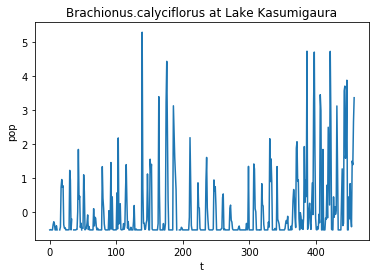

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -622.521
[02] theta: 0.000, delta: 1.100, log Likelihood: -616.393
[03] theta: 0.000, delta: 2.310, log Likelihood: -612.746
[04] theta: 0.000, delta: 3.641, log Likelihood: -609.874
[05] theta: 0.000, delta: 5.105, log Likelihood: -607.174
[06] theta: 0.000, delta: 6.716, log Likelihood: -604.598
[07] theta: 0.000, delta: 8.487, log Likelihood: -602.241
[08] theta: 0.000, delta: 10.436, log Likelihood: -600.182
[09] theta: 0.000, delta: 12.579, log Likelihood: -598.449
[10] theta: 0.000, delta: 14.937, log Likelihood: -597.035
[11] theta: 0.000, delta: 17.531, log Likelihood: -595.912
[12] theta: 0.000, delta: 20.384, log Likelihood: -595.047
[13] theta: 0.000, delta: 23.523, log Likelihood: -594.403
[14] theta: 0.000, delta: 26.975, log Likelihood: -593.948
[15] theta: 0.000, delta: 30.772, log Likelihood: -593.650
[16] theta: 0.000, delta: 34.950, log Likelihood: -593.481
[17] theta: 0.000, delta: 39

[14] theta: 0.000, delta: 26.975, log Likelihood: -581.637
[15] theta: 0.000, delta: 30.772, log Likelihood: -581.548
[16] theta: 0.000, delta: 28.874, log Likelihood: -581.567
[17] theta: 0.000, delta: 29.823, log Likelihood: -581.552
[18] theta: 0.000, delta: 30.867, log Likelihood: -581.548
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -608.855
[02] theta: 0.000, delta: 0.000, log Likelihood: -608.855
E = 4, tau = 2
(449,) (449,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -597.678
[02] theta: 1.100, delta: 1.100, log Likelihood: -598.134
[03] theta: 0.550, delta: 2.310, log Likelihood: -592.198
[04] theta: 0.000, delta: 3.641, log Likelihood: -589.621
[05] theta: 0.303, delta: 5.105, log Likelihood: -589.300
[06] theta: 0.151, delta: 6.716, log Likelihood: -587.548
[07] theta: 0.000, delta: 8.487, log Likelihood: -585.935
[08] theta: 0.000, delta: 10.436, log Likelihood: -584.693
[09] theta: 0.000, delta: 12.579, log Likelihood: -583.616
[10] theta: 0.000, delta:

[10] theta: 0.000, delta: 0.478, log Likelihood: -441.335
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -441.647
[02] theta: 0.000, delta: 0.000, log Likelihood: -441.647
E = 18, tau = 1
(437,) (437,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -498.486
[02] theta: 0.000, delta: 0.000, log Likelihood: -498.486
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -498.486
[02] theta: 0.000, delta: 0.000, log Likelihood: -498.486
E = 18, tau = 2
(421,) (421,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -454.133
[02] theta: 0.000, delta: 0.000, log Likelihood: -454.133
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -454.133
[02] theta: 0.000, delta: 0.000, log Likelihood: -454.133
E = 18, tau = 6
(357,) (357,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -373.246
[02] theta: 0.000, delta: 1.100, log Likelihood: -370.777
[03] theta: 0.000, delta: 0.550, log Likelihood: -371.261
[04] theta: 0.000, delta: 0.825, log Likelihood: -370.868
[05] th

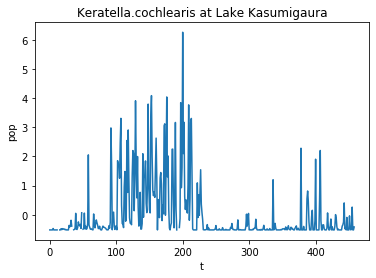

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -588.590
[02] theta: 1.100, delta: 1.100, log Likelihood: -575.449
[03] theta: 0.550, delta: 2.310, log Likelihood: -572.561
[04] theta: 0.825, delta: 3.641, log Likelihood: -568.721
[05] theta: 0.688, delta: 5.105, log Likelihood: -565.393
[06] theta: 0.536, delta: 6.716, log Likelihood: -561.988
[07] theta: 0.370, delta: 8.487, log Likelihood: -558.357
[08] theta: 0.187, delta: 10.436, log Likelihood: -554.211
[09] theta: 0.000, delta: 12.579, log Likelihood: -549.196
[10] theta: 0.000, delta: 14.937, log Likelihood: -545.119
[11] theta: 0.000, delta: 17.531, log Likelihood: -541.454
[12] theta: 0.000, delta: 20.384, log Likelihood: -538.186
[13] theta: 0.000, delta: 23.523, log Likelihood: -535.286
[14] theta: 0.000, delta: 26.975, log Likelihood: -532.716
[15] theta: 0.000, delta: 30.772, log Likelihood: -530.439
[16] theta: 0.000, delta: 34.950, log Likelihood: -528.418
[17] theta: 0.000, delta: 39

[08] theta: 0.695, delta: 0.000, log Likelihood: -557.530
[09] theta: 0.653, delta: 0.000, log Likelihood: -557.502
[10] theta: 0.608, delta: 0.000, log Likelihood: -557.499
E = 3, tau = 6
(447,) (447,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -518.355
[02] theta: 1.100, delta: 1.100, log Likelihood: -518.928
[03] theta: 0.550, delta: 2.310, log Likelihood: -514.752
[04] theta: 0.000, delta: 3.641, log Likelihood: -514.027
[05] theta: 0.303, delta: 5.105, log Likelihood: -512.382
[06] theta: 0.151, delta: 6.716, log Likelihood: -511.148
[07] theta: 0.000, delta: 8.487, log Likelihood: -509.952
[08] theta: 0.083, delta: 10.436, log Likelihood: -508.749
[09] theta: 0.042, delta: 12.579, log Likelihood: -507.525
[10] theta: 0.000, delta: 14.937, log Likelihood: -506.323
[11] theta: 0.000, delta: 17.531, log Likelihood: -505.311
[12] theta: 0.000, delta: 20.384, log Likelihood: -504.432
[13] theta: 0.000, delta: 23.523, log Likelihood: -503.695
[14] theta: 0.000, delta: 26.97

[12] theta: 0.241, delta: 4.284, log Likelihood: -537.791
[13] theta: 0.180, delta: 4.933, log Likelihood: -537.341
[14] theta: 0.210, delta: 5.646, log Likelihood: -536.884
[15] theta: 0.195, delta: 6.431, log Likelihood: -536.328
[16] theta: 0.178, delta: 7.294, log Likelihood: -535.694
[17] theta: 0.160, delta: 8.243, log Likelihood: -534.976
[18] theta: 0.139, delta: 9.287, log Likelihood: -534.165
[19] theta: 0.117, delta: 10.436, log Likelihood: -533.249
[20] theta: 0.093, delta: 11.700, log Likelihood: -532.219
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -543.384
[02] theta: 1.100, delta: 0.000, log Likelihood: -546.328
[03] theta: 0.550, delta: 0.000, log Likelihood: -541.225
[04] theta: 0.000, delta: 0.000, log Likelihood: -543.384
[05] theta: 0.303, delta: 0.000, log Likelihood: -540.905
[06] theta: 0.635, delta: 0.000, log Likelihood: -541.646
[07] theta: 0.469, delta: 0.000, log Likelihood: -540.962
[08] theta: 0.286, delta: 0.000, log Likelihood: -540.941
[09] th

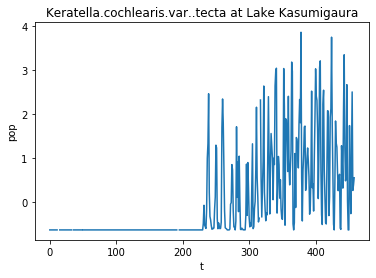

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -554.528
[02] theta: 1.100, delta: 1.100, log Likelihood: -533.000
[03] theta: 2.310, delta: 2.310, log Likelihood: -526.946
[04] theta: 1.705, delta: 3.641, log Likelihood: -520.735
[05] theta: 1.040, delta: 5.105, log Likelihood: -513.885
[06] theta: 0.307, delta: 6.716, log Likelihood: -506.544
[07] theta: 0.000, delta: 8.487, log Likelihood: -501.020
[08] theta: 0.000, delta: 10.436, log Likelihood: -498.227
[09] theta: 0.000, delta: 12.579, log Likelihood: -495.798
[10] theta: 0.000, delta: 14.937, log Likelihood: -493.628
[11] theta: 0.000, delta: 17.531, log Likelihood: -491.652
[12] theta: 0.000, delta: 20.384, log Likelihood: -489.829
[13] theta: 0.000, delta: 23.523, log Likelihood: -488.124
[14] theta: 0.000, delta: 26.975, log Likelihood: -486.511
[15] theta: 0.000, delta: 30.772, log Likelihood: -484.967
[16] theta: 0.000, delta: 34.950, log Likelihood: -483.477
[17] theta: 0.000, delta: 39

[19] theta: 0.000, delta: 50.159, log Likelihood: -475.344
[20] theta: 0.000, delta: 56.275, log Likelihood: -474.042
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -536.943
[02] theta: 1.100, delta: 0.000, log Likelihood: -527.435
[03] theta: 2.310, delta: 0.000, log Likelihood: -530.616
[04] theta: 1.705, delta: 0.000, log Likelihood: -527.751
[05] theta: 1.040, delta: 0.000, log Likelihood: -527.588
[06] theta: 1.372, delta: 0.000, log Likelihood: -527.185
[07] theta: 1.206, delta: 0.000, log Likelihood: -527.253
[08] theta: 1.289, delta: 0.000, log Likelihood: -527.187
[09] theta: 1.381, delta: 0.000, log Likelihood: -527.188
E = 3, tau = 6
(447,) (447,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -475.129
[02] theta: 1.100, delta: 1.100, log Likelihood: -469.615
[03] theta: 0.550, delta: 2.310, log Likelihood: -467.080
[04] theta: 0.000, delta: 3.641, log Likelihood: -462.823
[05] theta: 0.000, delta: 5.105, log Likelihood: -461.224
[06] theta: 0.000, delta: 6.71

[11] theta: 0.000, delta: 17.531, log Likelihood: -474.448
[12] theta: 0.000, delta: 20.384, log Likelihood: -472.760
[13] theta: 0.000, delta: 23.523, log Likelihood: -471.271
[14] theta: 0.000, delta: 26.975, log Likelihood: -469.941
[15] theta: 0.000, delta: 30.772, log Likelihood: -468.745
[16] theta: 0.000, delta: 34.950, log Likelihood: -467.667
[17] theta: 0.000, delta: 39.545, log Likelihood: -466.699
[18] theta: 0.000, delta: 44.599, log Likelihood: -465.838
[19] theta: 0.000, delta: 50.159, log Likelihood: -465.086
[20] theta: 0.000, delta: 56.275, log Likelihood: -464.449
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -522.704
[02] theta: 1.100, delta: 0.000, log Likelihood: -524.744
[03] theta: 0.550, delta: 0.000, log Likelihood: -519.468
[04] theta: 0.000, delta: 0.000, log Likelihood: -522.704
[05] theta: 0.303, delta: 0.000, log Likelihood: -519.431
[06] theta: 0.635, delta: 0.000, log Likelihood: -519.827
[07] theta: 0.469, delta: 0.000, log Likelihood: -519.284

[02] theta: 0.000, delta: 0.000, log Likelihood: -381.771
E = 24, tau = 2
(409,) (409,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -354.574
[02] theta: 0.000, delta: 0.000, log Likelihood: -354.574
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -354.574
[02] theta: 0.000, delta: 0.000, log Likelihood: -354.574
E = 24, tau = 6
(321,) (321,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -281.497
[02] theta: 0.000, delta: 1.100, log Likelihood: -281.970
[03] theta: 0.000, delta: 0.550, log Likelihood: -281.575
[04] theta: 0.000, delta: 0.000, log Likelihood: -281.497
[05] theta: 0.000, delta: 0.303, log Likelihood: -281.497
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -281.497
[02] theta: 0.000, delta: 0.000, log Likelihood: -281.497
(6, 2) (6, 2)
NSMap: 
 Max Likelihood -281.4967437506073 
 Lags: 22 
 tau: 6 
 Theta: 0.0 
 Delta: 0.30250000000000005
SMap: 
 Max Likelihood -281.4965697132755 
 Lags: 22 
 tau: 6 
 Theta: 0.0
0.30250000000000005 36.03


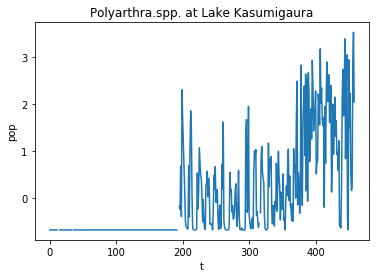

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -543.317
[02] theta: 1.100, delta: 1.100, log Likelihood: -521.285
[03] theta: 2.310, delta: 2.310, log Likelihood: -509.394
[04] theta: 1.705, delta: 3.641, log Likelihood: -494.490
[05] theta: 1.040, delta: 5.105, log Likelihood: -480.149
[06] theta: 0.307, delta: 6.716, log Likelihood: -471.862
[07] theta: 0.673, delta: 8.487, log Likelihood: -462.881
[08] theta: 1.076, delta: 10.436, log Likelihood: -458.123
[09] theta: 0.875, delta: 12.579, log Likelihood: -452.986
[10] theta: 0.653, delta: 14.937, log Likelihood: -448.928
[11] theta: 0.410, delta: 17.531, log Likelihood: -446.025
[12] theta: 0.532, delta: 20.384, log Likelihood: -442.634
[13] theta: 0.666, delta: 23.523, log Likelihood: -440.001
[14] theta: 0.599, delta: 26.975, log Likelihood: -437.413
[15] theta: 0.525, delta: 30.772, log Likelihood: -434.999
[16] theta: 0.444, delta: 34.950, log Likelihood: -432.747
[17] theta: 0.355, delta: 39

[08] theta: 0.893, delta: 0.000, log Likelihood: -521.864
E = 3, tau = 6
(447,) (447,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -426.930
[02] theta: 1.100, delta: 1.100, log Likelihood: -419.099
[03] theta: 2.310, delta: 2.310, log Likelihood: -421.286
[04] theta: 1.705, delta: 3.641, log Likelihood: -416.512
[05] theta: 1.040, delta: 5.105, log Likelihood: -412.799
[06] theta: 0.307, delta: 6.716, log Likelihood: -411.568
[07] theta: 0.673, delta: 8.487, log Likelihood: -409.738
[08] theta: 0.490, delta: 10.436, log Likelihood: -408.882
[09] theta: 0.582, delta: 12.579, log Likelihood: -408.260
[10] theta: 0.536, delta: 14.937, log Likelihood: -407.861
[11] theta: 0.486, delta: 17.531, log Likelihood: -407.608
[12] theta: 0.431, delta: 20.384, log Likelihood: -407.447
[13] theta: 0.370, delta: 23.523, log Likelihood: -407.332
[14] theta: 0.303, delta: 26.975, log Likelihood: -407.221
[15] theta: 0.229, delta: 25.249, log Likelihood: -407.129
[16] theta: 0.148, delta: 26.

[09] theta: 0.000, delta: 12.579, log Likelihood: -390.238
[10] theta: 0.000, delta: 14.937, log Likelihood: -390.199
[11] theta: 0.000, delta: 13.758, log Likelihood: -390.196
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -398.069
[02] theta: 1.100, delta: 0.000, log Likelihood: -407.325
[03] theta: 0.550, delta: 0.000, log Likelihood: -400.191
[04] theta: 0.000, delta: 0.000, log Likelihood: -398.069
[05] theta: 0.303, delta: 0.000, log Likelihood: -398.468
[06] theta: 0.151, delta: 0.000, log Likelihood: -397.974
[07] theta: 0.000, delta: 0.000, log Likelihood: -398.069
[08] theta: 0.083, delta: 0.000, log Likelihood: -397.931
[09] theta: 0.175, delta: 0.000, log Likelihood: -398.017
[10] theta: 0.129, delta: 0.000, log Likelihood: -397.946
[11] theta: 0.079, delta: 0.000, log Likelihood: -397.933
[12] theta: 0.104, delta: 0.000, log Likelihood: -397.931
E = 6, tau = 6
(429,) (429,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -394.759
[02] theta: 1.100, delta: 1.1

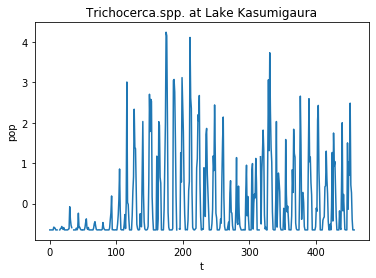

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -595.182
[02] theta: 1.100, delta: 1.100, log Likelihood: -575.722
[03] theta: 2.310, delta: 2.310, log Likelihood: -567.215
[04] theta: 1.705, delta: 3.641, log Likelihood: -560.045
[05] theta: 1.040, delta: 5.105, log Likelihood: -555.053
[06] theta: 1.372, delta: 6.716, log Likelihood: -548.249
[07] theta: 1.738, delta: 8.487, log Likelihood: -542.357
[08] theta: 1.555, delta: 10.436, log Likelihood: -537.068
[09] theta: 1.647, delta: 12.579, log Likelihood: -532.163
[10] theta: 1.747, delta: 14.937, log Likelihood: -527.849
[11] theta: 1.697, delta: 17.531, log Likelihood: -524.039
[12] theta: 1.642, delta: 20.384, log Likelihood: -520.791
[13] theta: 1.581, delta: 23.523, log Likelihood: -518.090
[14] theta: 1.514, delta: 26.975, log Likelihood: -515.905
[15] theta: 1.547, delta: 30.772, log Likelihood: -514.189
[16] theta: 1.531, delta: 34.950, log Likelihood: -512.886
[17] theta: 1.512, delta: 39

[18] theta: 0.683, delta: 44.599, log Likelihood: -520.453
[19] theta: 0.694, delta: 50.159, log Likelihood: -519.911
[20] theta: 0.689, delta: 56.275, log Likelihood: -519.608
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -584.781
[02] theta: 1.100, delta: 0.000, log Likelihood: -582.968
[03] theta: 0.550, delta: 0.000, log Likelihood: -583.005
[04] theta: 0.825, delta: 0.000, log Likelihood: -582.803
[05] theta: 1.128, delta: 0.000, log Likelihood: -583.005
[06] theta: 0.976, delta: 0.000, log Likelihood: -582.849
[07] theta: 0.810, delta: 0.000, log Likelihood: -582.805
[08] theta: 0.893, delta: 0.000, log Likelihood: -582.810
E = 3, tau = 6
(447,) (447,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -475.920
[02] theta: 1.100, delta: 1.100, log Likelihood: -469.515
[03] theta: 0.550, delta: 2.310, log Likelihood: -469.503
[04] theta: 0.825, delta: 3.641, log Likelihood: -469.088
[05] theta: 0.688, delta: 2.976, log Likelihood: -469.164
[06] theta: 0.756, delta: 3.3

[04] theta: 0.825, delta: 0.000, log Likelihood: -449.730
[05] theta: 1.128, delta: 0.000, log Likelihood: -450.470
[06] theta: 0.976, delta: 0.000, log Likelihood: -449.895
[07] theta: 0.810, delta: 0.000, log Likelihood: -449.736
[08] theta: 0.893, delta: 0.000, log Likelihood: -449.755
[09] theta: 0.851, delta: 0.000, log Likelihood: -449.730
[10] theta: 0.806, delta: 0.000, log Likelihood: -449.738
E = 6, tau = 6
(429,) (429,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -423.066
[02] theta: 1.100, delta: 1.100, log Likelihood: -426.734
[03] theta: 0.550, delta: 2.310, log Likelihood: -417.908
[04] theta: 0.000, delta: 3.641, log Likelihood: -415.978
[05] theta: 0.303, delta: 5.105, log Likelihood: -415.381
[06] theta: 0.151, delta: 6.716, log Likelihood: -415.294
[07] theta: 0.227, delta: 5.910, log Likelihood: -415.235
[08] theta: 0.189, delta: 5.025, log Likelihood: -415.244
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -423.066
[02] theta: 1.100, delta: 0.000,

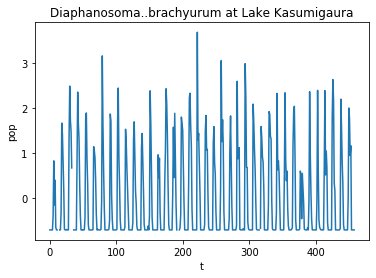

E = 2, tau = 1
(453,) (453,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -558.802
[02] theta: 1.100, delta: 0.000, log Likelihood: -526.116
[03] theta: 2.310, delta: 0.000, log Likelihood: -511.897
[04] theta: 3.641, delta: 0.000, log Likelihood: -507.554
[05] theta: 5.105, delta: 0.000, log Likelihood: -506.007
[06] theta: 6.716, delta: 0.000, log Likelihood: -505.703
[07] theta: 5.910, delta: 0.000, log Likelihood: -505.722
[08] theta: 6.313, delta: 0.000, log Likelihood: -505.683
[09] theta: 6.756, delta: 0.000, log Likelihood: -505.708
[10] theta: 6.534, delta: 0.000, log Likelihood: -505.687
[11] theta: 6.291, delta: 0.000, log Likelihood: -505.684
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -558.802
[02] theta: 1.100, delta: 0.000, log Likelihood: -526.116
[03] theta: 2.310, delta: 0.000, log Likelihood: -511.897
[04] theta: 3.641, delta: 0.000, log Likelihood: -507.554
[05] theta: 5.105, delta: 0.000, log Likelihood: -506.007
[06] theta: 6.716, delta: 0.000,

[05] theta: 2.976, delta: 0.000, log Likelihood: -488.360
[06] theta: 2.243, delta: 0.000, log Likelihood: -486.453
[07] theta: 2.609, delta: 0.000, log Likelihood: -486.643
[08] theta: 2.426, delta: 0.000, log Likelihood: -486.333
[09] theta: 2.225, delta: 0.000, log Likelihood: -486.491
[10] theta: 2.326, delta: 0.000, log Likelihood: -486.343
[11] theta: 2.437, delta: 0.000, log Likelihood: -486.339
E = 4, tau = 2
(449,) (449,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -513.744
[02] theta: 1.100, delta: 0.000, log Likelihood: -421.512
[03] theta: 2.310, delta: 0.000, log Likelihood: -401.651
[04] theta: 3.641, delta: 0.000, log Likelihood: -409.136
[05] theta: 2.976, delta: 0.000, log Likelihood: -403.387
[06] theta: 2.243, delta: 0.000, log Likelihood: -401.793
[07] theta: 2.609, delta: 0.000, log Likelihood: -401.787
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -513.744
[02] theta: 1.100, delta: 0.000, log Likelihood: -421.512
[03] theta: 2.310, delta: 0.000,

[02] theta: 0.000, delta: 0.000, log Likelihood: -248.671
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -248.671
[02] theta: 0.000, delta: 0.000, log Likelihood: -248.671
E = 18, tau = 1
(437,) (437,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -307.327
[02] theta: 1.100, delta: 0.000, log Likelihood: -317.499
[03] theta: 0.550, delta: 0.000, log Likelihood: -308.015
[04] theta: 0.000, delta: 0.000, log Likelihood: -307.327
[05] theta: 0.303, delta: 0.000, log Likelihood: -306.750
[06] theta: 0.151, delta: 0.000, log Likelihood: -306.762
[07] theta: 0.227, delta: 0.000, log Likelihood: -306.685
[08] theta: 0.189, delta: 0.000, log Likelihood: -306.706
[09] theta: 0.208, delta: 0.000, log Likelihood: -306.691
[10] theta: 0.229, delta: 0.000, log Likelihood: -306.685
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -307.327
[02] theta: 1.100, delta: 0.000, log Likelihood: -317.499
[03] theta: 0.550, delta: 0.000, log Likelihood: -308.015
[04] theta: 0.000, delta: 

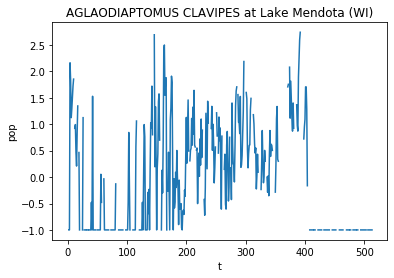

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -390.459
[02] theta: 1.100, delta: 1.100, log Likelihood: -378.745
[03] theta: 2.310, delta: 2.310, log Likelihood: -376.287
[04] theta: 1.705, delta: 3.641, log Likelihood: -374.261
[05] theta: 1.040, delta: 5.105, log Likelihood: -372.152
[06] theta: 0.307, delta: 6.716, log Likelihood: -370.102
[07] theta: 0.000, delta: 8.487, log Likelihood: -368.512
[08] theta: 0.403, delta: 10.436, log Likelihood: -367.523
[09] theta: 0.201, delta: 12.579, log Likelihood: -366.020
[10] theta: 0.000, delta: 14.937, log Likelihood: -364.533
[11] theta: 0.000, delta: 17.531, log Likelihood: -363.635
[12] theta: 0.000, delta: 20.384, log Likelihood: -362.882
[13] theta: 0.000, delta: 23.523, log Likelihood: -362.244
[14] theta: 0.000, delta: 26.975, log Likelihood: -361.691
[15] theta: 0.000, delta: 30.772, log Likelihood: -361.199
[16] theta: 0.000, delta: 34.950, log Likelihood: -360.742
[17] theta: 0.000, delta: 39

[10] theta: 0.185, delta: 3.159, log Likelihood: -300.704
[11] theta: 0.135, delta: 3.695, log Likelihood: -300.142
[12] theta: 0.080, delta: 4.284, log Likelihood: -299.551
[13] theta: 0.019, delta: 4.933, log Likelihood: -298.940
[14] theta: 0.000, delta: 5.646, log Likelihood: -298.432
[15] theta: 0.000, delta: 6.431, log Likelihood: -298.014
[16] theta: 0.000, delta: 7.294, log Likelihood: -297.644
[17] theta: 0.000, delta: 8.243, log Likelihood: -297.322
[18] theta: 0.000, delta: 9.287, log Likelihood: -297.045
[19] theta: 0.000, delta: 10.436, log Likelihood: -296.814
[20] theta: 0.000, delta: 11.700, log Likelihood: -296.626
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -305.846
[02] theta: 1.100, delta: 0.000, log Likelihood: -305.123
[03] theta: 0.550, delta: 0.000, log Likelihood: -304.395
[04] theta: 0.825, delta: 0.000, log Likelihood: -304.569
[05] theta: 0.688, delta: 0.000, log Likelihood: -304.431
[06] theta: 0.536, delta: 0.000, log Likelihood: -304.398
[07] th

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:404: RuntimeWarning: invalid value encountered in log
  lnL = (-n/2)*(np.log(mean_squared_residuals) + np.log(2*np.pi) + 1 )
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:402: RuntimeWarning: divide by zero encountered in double_scalars
  mean_squared_residuals = np.sum((Y-Yhat)**2) / (n-k)
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:755: RuntimeWarning: invalid value encountered in ceil
  s = np.multiply(grad, gradPrev) # ratio between -1 and 1 for each param
C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:759: RuntimeWarning: invalid value encountered in ceil
  delta = np.multiply((rhoplus * spos) + (rhominus * sneg), deltaPrev)


[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, log Likelihood: nan
[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log Likelihood: nan
[15] theta: 0.000, delta: 0.000, log Likelihood: nan
[16] theta: 0.000, delta: 0.000, log Likelihood: nan
[17] theta: 0.000, delta: 0.000, log Likelihood: nan
[18] theta: 0.000, delta: 0.000, log Likelihood: nan
[19] theta: 0.000, delta: 0.000, log Likelihood: nan
[20] theta: 0.000, delta: 0.000, log Likelihood: nan
SMap
[01] theta: 0.000, delta: 0.000, log Like

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:752: RuntimeWarning: invalid value encountered in true_divide
  


[01] theta: 0.000, delta: 0.000, log Likelihood: -89.437
[02] theta: 0.000, delta: 1.100, log Likelihood: -86.328
[03] theta: 0.000, delta: 0.550, log Likelihood: -87.109
[04] theta: 0.000, delta: 0.825, log Likelihood: -86.478
[05] theta: 0.000, delta: 1.128, log Likelihood: -86.339
[06] theta: 0.000, delta: 0.976, log Likelihood: -86.336
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -89.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -89.437
(5, 1) (5, 1)
NSMap: 
 Max Likelihood nan 
 Lags: 16 
 tau: 2 
 Theta: 0.0 
 Delta: 0.0
SMap: 
 Max Likelihood nan 
 Lags: 16 
 tau: 2 
 Theta: 0.0
0.0 43.1113


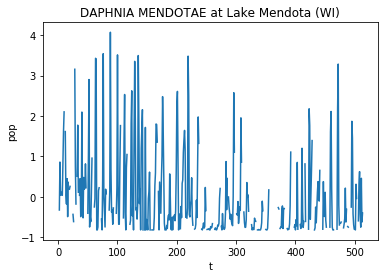

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -417.309
[02] theta: 1.100, delta: 1.100, log Likelihood: -415.541
[03] theta: 0.550, delta: 2.310, log Likelihood: -411.931
[04] theta: 0.000, delta: 3.641, log Likelihood: -409.999
[05] theta: 0.303, delta: 5.105, log Likelihood: -409.960
[06] theta: 0.151, delta: 6.716, log Likelihood: -409.443
[07] theta: 0.000, delta: 8.487, log Likelihood: -409.245
[08] theta: 0.083, delta: 10.436, log Likelihood: -409.240
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -417.309
[02] theta: 1.100, delta: 0.000, log Likelihood: -419.600
[03] theta: 0.550, delta: 0.000, log Likelihood: -418.269
[04] theta: 0.000, delta: 0.000, log Likelihood: -417.309
[05] theta: 0.303, delta: 0.000, log Likelihood: -417.693
[06] theta: 0.151, delta: 0.000, log Likelihood: -417.421
[07] theta: 0.000, delta: 0.000, log Likelihood: -417.309
[08] theta: 0.083, delta: 0.000, log Likelihood: -417.342
[09] theta: 0.042, delta: 0.000

[06] theta: 0.151, delta: 0.635, log Likelihood: -276.599
[07] theta: 0.227, delta: 1.001, log Likelihood: -276.641
[08] theta: 0.189, delta: 0.818, log Likelihood: -276.602
[09] theta: 0.147, delta: 0.617, log Likelihood: -276.600
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -276.918
[02] theta: 1.100, delta: 0.000, log Likelihood: -279.542
[03] theta: 0.550, delta: 0.000, log Likelihood: -277.065
[04] theta: 0.000, delta: 0.000, log Likelihood: -276.918
[05] theta: 0.303, delta: 0.000, log Likelihood: -276.696
[06] theta: 0.151, delta: 0.000, log Likelihood: -276.704
E = 6, tau = 1
(504,) (504,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -209.041
[02] theta: 0.000, delta: 1.100, log Likelihood: -207.649
[03] theta: 0.000, delta: 2.310, log Likelihood: -206.730
[04] theta: 0.000, delta: 3.641, log Likelihood: -206.043
[05] theta: 0.000, delta: 5.105, log Likelihood: -205.424
[06] theta: 0.000, delta: 6.716, log Likelihood: -204.907
[07] theta: 0.000, delta: 8.487,

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:735: RuntimeWarning: invalid value encountered in double_scalars
  


[08] theta: 0.000, delta: 0.000, log Likelihood: -inf
[09] theta: 0.000, delta: 0.000, log Likelihood: -inf
[10] theta: 0.000, delta: 0.000, log Likelihood: -inf
[11] theta: 0.000, delta: 0.000, log Likelihood: -inf
[12] theta: 0.000, delta: 0.000, log Likelihood: -inf
[13] theta: 0.000, delta: 0.000, log Likelihood: -inf
[14] theta: 0.000, delta: 0.000, log Likelihood: -inf
[15] theta: 0.000, delta: 0.000, log Likelihood: -inf
[16] theta: 0.000, delta: 0.000, log Likelihood: -inf
[17] theta: 0.000, delta: 0.000, log Likelihood: -inf
[18] theta: 0.000, delta: 0.000, log Likelihood: -inf
[19] theta: 0.000, delta: 0.000, log Likelihood: -inf
[20] theta: 0.000, delta: 0.000, log Likelihood: -inf
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -inf
[02] theta: 0.000, delta: 0.000, log Likelihood: -inf
[03] theta: 0.000, delta: 0.000, log Likelihood: -inf
[04] theta: 0.000, delta: 0.000, log Likelihood: -inf
[05] theta: 0.000, delta: 0.000, log Likelihood: -inf
[06] theta: 0.000, delt

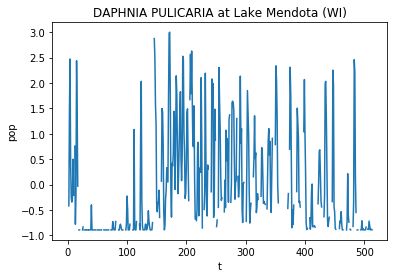

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -423.708
[02] theta: 1.100, delta: 1.100, log Likelihood: -409.511
[03] theta: 2.310, delta: 2.310, log Likelihood: -409.671
[04] theta: 1.705, delta: 3.641, log Likelihood: -407.421
[05] theta: 1.040, delta: 5.105, log Likelihood: -405.741
[06] theta: 0.307, delta: 6.716, log Likelihood: -406.608
[07] theta: 0.673, delta: 8.487, log Likelihood: -404.221
[08] theta: 1.076, delta: 10.436, log Likelihood: -404.165
[09] theta: 0.875, delta: 12.579, log Likelihood: -403.744
[10] theta: 0.653, delta: 14.937, log Likelihood: -403.310
[11] theta: 0.410, delta: 17.531, log Likelihood: -402.984
[12] theta: 0.532, delta: 20.384, log Likelihood: -403.000
[13] theta: 0.471, delta: 23.523, log Likelihood: -402.847
[14] theta: 0.404, delta: 26.975, log Likelihood: -402.621
[15] theta: 0.330, delta: 30.772, log Likelihood: -402.279
[16] theta: 0.249, delta: 34.950, log Likelihood: -401.827
[17] theta: 0.160, delta: 39

[06] theta: 0.976, delta: 0.000, log Likelihood: -315.983
[07] theta: 1.052, delta: 0.000, log Likelihood: -315.973
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -320.168
[02] theta: 1.100, delta: 0.000, log Likelihood: -315.987
[03] theta: 0.550, delta: 0.000, log Likelihood: -316.827
[04] theta: 0.825, delta: 0.000, log Likelihood: -316.124
[05] theta: 1.128, delta: 0.000, log Likelihood: -316.002
[06] theta: 0.976, delta: 0.000, log Likelihood: -315.983
[07] theta: 1.052, delta: 0.000, log Likelihood: -315.973
E = 4, tau = 1
(506,) (506,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -300.144
[02] theta: 1.100, delta: 0.000, log Likelihood: -289.932
[03] theta: 2.310, delta: 0.000, log Likelihood: -295.900
[04] theta: 1.705, delta: 0.000, log Likelihood: -290.633
[05] theta: 1.040, delta: 0.000, log Likelihood: -290.115
[06] theta: 1.372, delta: 0.000, log Likelihood: -289.670
[07] theta: 1.206, delta: 0.000, log Likelihood: -289.719
[08] theta: 1.289, delta: 0.000,

[02] theta: 0.000, delta: 0.000, log Likelihood: -118.350
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -118.350
[02] theta: 0.000, delta: 0.000, log Likelihood: -118.350
E = 24, tau = 1
(486,) (486,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, log Likelihood: nan
[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log Likelihood: nan
[15] theta: 0.000, delta: 0.000, log Likeli

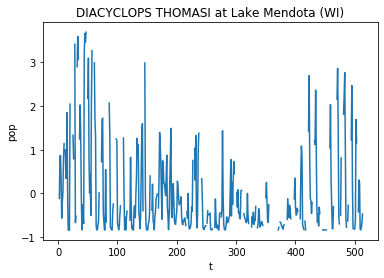

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -443.509
[02] theta: 0.000, delta: 1.100, log Likelihood: -438.802
[03] theta: 0.000, delta: 2.310, log Likelihood: -435.040
[04] theta: 0.000, delta: 3.641, log Likelihood: -431.750
[05] theta: 0.000, delta: 5.105, log Likelihood: -428.889
[06] theta: 0.000, delta: 6.716, log Likelihood: -426.506
[07] theta: 0.000, delta: 8.487, log Likelihood: -424.569
[08] theta: 0.403, delta: 10.436, log Likelihood: -424.744
[09] theta: 0.201, delta: 12.579, log Likelihood: -422.310
[10] theta: 0.000, delta: 14.937, log Likelihood: -420.803
[11] theta: 0.111, delta: 17.531, log Likelihood: -420.210
[12] theta: 0.055, delta: 20.384, log Likelihood: -419.460
[13] theta: 0.000, delta: 23.523, log Likelihood: -418.916
[14] theta: 0.000, delta: 26.975, log Likelihood: -418.508
[15] theta: 0.000, delta: 30.772, log Likelihood: -418.164
[16] theta: 0.000, delta: 34.950, log Likelihood: -417.862
[17] theta: 0.000, delta: 39

[10] theta: 0.000, delta: 14.937, log Likelihood: -276.764
[11] theta: 0.000, delta: 17.531, log Likelihood: -276.126
[12] theta: 0.000, delta: 20.384, log Likelihood: -275.729
[13] theta: 0.000, delta: 23.523, log Likelihood: -275.538
[14] theta: 0.000, delta: 26.975, log Likelihood: -275.517
[15] theta: 0.000, delta: 25.249, log Likelihood: -275.509
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -294.580
[02] theta: 1.100, delta: 0.000, log Likelihood: -297.611
[03] theta: 0.550, delta: 0.000, log Likelihood: -294.819
[04] theta: 0.000, delta: 0.000, log Likelihood: -294.580
[05] theta: 0.303, delta: 0.000, log Likelihood: -294.462
[06] theta: 0.151, delta: 0.000, log Likelihood: -294.431
[07] theta: 0.227, delta: 0.000, log Likelihood: -294.431
E = 4, tau = 2
(504,) (504,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -282.779
[02] theta: 1.100, delta: 1.100, log Likelihood: -282.305
[03] theta: 0.550, delta: 2.310, log Likelihood: -279.818
[04] theta: 0.825, delta: 

[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log Likelihood: nan
[15] theta: 0.000, delta: 0.000, log Likelihood: nan
[16] theta: 0.000, delta: 0.000, log Likelihood: nan
[17] theta: 0.000, delta: 0.000, log Likelihood: nan
[18] theta: 0.000, delta: 0.000, log Likelihood: nan
[19] theta: 0.000, delta: 0.000, log Likelihood: nan
[20] theta: 0.000, delta: 0.000, log Likelihood: nan
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Like

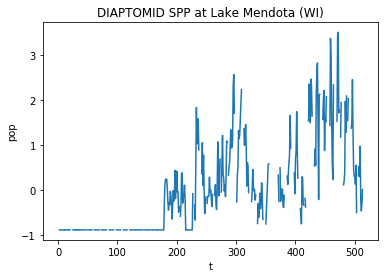

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -306.498
[02] theta: 1.100, delta: 1.100, log Likelihood: -294.145
[03] theta: 2.310, delta: 2.310, log Likelihood: -293.478
[04] theta: 1.705, delta: 3.641, log Likelihood: -291.877
[05] theta: 1.040, delta: 5.105, log Likelihood: -289.788
[06] theta: 0.307, delta: 6.716, log Likelihood: -287.015
[07] theta: 0.000, delta: 8.487, log Likelihood: -285.488
[08] theta: 0.000, delta: 10.436, log Likelihood: -284.656
[09] theta: 0.000, delta: 12.579, log Likelihood: -283.886
[10] theta: 0.000, delta: 14.937, log Likelihood: -283.089
[11] theta: 0.000, delta: 17.531, log Likelihood: -282.214
[12] theta: 0.000, delta: 20.384, log Likelihood: -281.235
[13] theta: 0.000, delta: 23.523, log Likelihood: -280.144
[14] theta: 0.000, delta: 26.975, log Likelihood: -278.943
[15] theta: 0.000, delta: 30.772, log Likelihood: -277.643
[16] theta: 0.000, delta: 34.950, log Likelihood: -276.256
[17] theta: 0.000, delta: 39

[06] theta: 0.000, delta: 6.716, log Likelihood: -238.173
[07] theta: 0.000, delta: 8.487, log Likelihood: -237.840
[08] theta: 0.000, delta: 10.436, log Likelihood: -237.633
[09] theta: 0.000, delta: 12.579, log Likelihood: -237.446
[10] theta: 0.000, delta: 14.937, log Likelihood: -237.201
[11] theta: 0.000, delta: 17.531, log Likelihood: -236.850
[12] theta: 0.000, delta: 20.384, log Likelihood: -236.370
[13] theta: 0.000, delta: 23.523, log Likelihood: -235.758
[14] theta: 0.000, delta: 26.975, log Likelihood: -235.024
[15] theta: 0.000, delta: 30.772, log Likelihood: -234.186
[16] theta: 0.000, delta: 34.950, log Likelihood: -233.263
[17] theta: 0.949, delta: 39.545, log Likelihood: -237.462
[18] theta: 0.475, delta: 44.599, log Likelihood: -232.562
[19] theta: 0.000, delta: 50.159, log Likelihood: -230.198
[20] theta: 0.261, delta: 56.275, log Likelihood: -229.466
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -246.302
[02] theta: 1.100, delta: 0.000, log Likelihood: -246.

[01] theta: 0.000, delta: 0.000, log Likelihood: -104.847
[02] theta: 0.000, delta: 0.000, log Likelihood: -104.847
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -104.847
[02] theta: 0.000, delta: 0.000, log Likelihood: -104.847
E = 24, tau = 1
(486,) (486,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, log Likelihood: nan
[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log L

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:681: RuntimeWarning: invalid value encountered in double_scalars
  


[13] theta: 0.000, delta: 0.000, log Likelihood: -inf
[14] theta: 0.000, delta: 0.000, log Likelihood: -inf
[15] theta: 0.000, delta: 0.000, log Likelihood: -inf
[16] theta: 0.000, delta: 0.000, log Likelihood: -inf
[17] theta: 0.000, delta: 0.000, log Likelihood: -inf
[18] theta: 0.000, delta: 0.000, log Likelihood: -inf
[19] theta: 0.000, delta: 0.000, log Likelihood: -inf
[20] theta: 0.000, delta: 0.000, log Likelihood: -inf
E = 24, tau = 6
(376,) (376,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -123.426
[02] theta: 0.000, delta: 0.000, log Likelihood: -123.426
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -123.426
[02] theta: 0.000, delta: 0.000, log Likelihood: -123.426
(6, 0) (6, 0)
NSMap: 
 Max Likelihood nan 
 Lags: 22 
 tau: 1 
 Theta: 0.0 
 Delta: 0.0
SMap: 
 Max Likelihood nan 
 Lags: 22 
 tau: 1 
 Theta: 0.0
0.0 43.1113


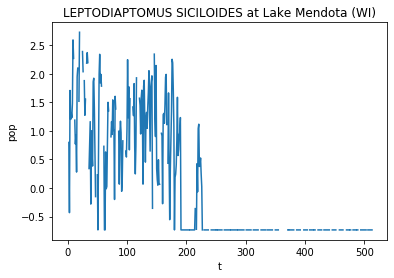

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -355.692
[02] theta: 1.100, delta: 1.100, log Likelihood: -329.077
[03] theta: 2.310, delta: 2.310, log Likelihood: -317.555
[04] theta: 3.641, delta: 3.641, log Likelihood: -313.472
[05] theta: 2.976, delta: 5.105, log Likelihood: -310.770
[06] theta: 3.308, delta: 6.716, log Likelihood: -308.221
[07] theta: 3.142, delta: 8.487, log Likelihood: -305.358
[08] theta: 2.959, delta: 10.436, log Likelihood: -302.322
[09] theta: 2.758, delta: 12.579, log Likelihood: -299.193
[10] theta: 2.536, delta: 14.937, log Likelihood: -296.119
[11] theta: 2.293, delta: 17.531, log Likelihood: -293.302
[12] theta: 2.025, delta: 20.384, log Likelihood: -290.935
[13] theta: 1.730, delta: 23.523, log Likelihood: -289.104
[14] theta: 1.406, delta: 26.975, log Likelihood: -287.758
[15] theta: 1.568, delta: 30.772, log Likelihood: -286.527
[16] theta: 1.746, delta: 34.950, log Likelihood: -285.422
[17] theta: 1.657, delta: 39

[20] theta: 0.275, delta: 56.275, log Likelihood: -231.327
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -261.516
[02] theta: 1.100, delta: 0.000, log Likelihood: -253.505
[03] theta: 2.310, delta: 0.000, log Likelihood: -256.463
[04] theta: 1.705, delta: 0.000, log Likelihood: -253.823
[05] theta: 1.040, delta: 0.000, log Likelihood: -253.602
[06] theta: 1.372, delta: 0.000, log Likelihood: -253.357
[07] theta: 1.206, delta: 0.000, log Likelihood: -253.392
[08] theta: 1.289, delta: 0.000, log Likelihood: -253.353
[09] theta: 1.381, delta: 0.000, log Likelihood: -253.360
E = 3, tau = 6
(502,) (502,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -251.610
[02] theta: 1.100, delta: 1.100, log Likelihood: -249.495
[03] theta: 0.550, delta: 2.310, log Likelihood: -247.955
[04] theta: 0.825, delta: 3.641, log Likelihood: -246.663
[05] theta: 0.688, delta: 5.105, log Likelihood: -245.414
[06] theta: 0.536, delta: 6.716, log Likelihood: -244.278
[07] theta: 0.370, delta: 8.487

[10] theta: 0.000, delta: 14.937, log Likelihood: -179.097
[11] theta: 0.000, delta: 13.758, log Likelihood: -179.079
[12] theta: 0.000, delta: 12.462, log Likelihood: -179.082
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -181.552
[02] theta: 1.100, delta: 0.000, log Likelihood: -184.328
[03] theta: 0.550, delta: 0.000, log Likelihood: -181.991
[04] theta: 0.000, delta: 0.000, log Likelihood: -181.552
[05] theta: 0.303, delta: 0.000, log Likelihood: -181.634
[06] theta: 0.151, delta: 0.000, log Likelihood: -181.553
[07] theta: 0.000, delta: 0.000, log Likelihood: -181.552
E = 12, tau = 1
(498,) (498,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -67.454
[02] theta: 0.000, delta: 1.100, log Likelihood: -67.435
[03] theta: 0.000, delta: 0.550, log Likelihood: -67.378
[04] theta: 0.000, delta: 0.825, log Likelihood: -67.392
[05] theta: 0.000, delta: 0.688, log Likelihood: -67.381
[06] theta: 0.000, delta: 0.536, log Likelihood: -67.378
SMap
[01] theta: 0.000, delta: 0.0

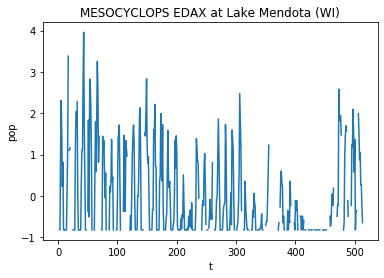

E = 2, tau = 1
(508,) (508,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -409.519
[02] theta: 1.100, delta: 1.100, log Likelihood: -391.677
[03] theta: 2.310, delta: 2.310, log Likelihood: -384.433
[04] theta: 1.705, delta: 3.641, log Likelihood: -378.130
[05] theta: 1.040, delta: 5.105, log Likelihood: -374.519
[06] theta: 1.372, delta: 6.716, log Likelihood: -372.654
[07] theta: 1.206, delta: 8.487, log Likelihood: -371.198
[08] theta: 1.023, delta: 10.436, log Likelihood: -370.223
[09] theta: 1.114, delta: 12.579, log Likelihood: -369.428
[10] theta: 1.069, delta: 14.937, log Likelihood: -368.736
[11] theta: 1.018, delta: 17.531, log Likelihood: -368.077
[12] theta: 0.963, delta: 20.384, log Likelihood: -367.399
[13] theta: 0.991, delta: 23.523, log Likelihood: -366.653
[14] theta: 0.977, delta: 26.975, log Likelihood: -365.791
[15] theta: 0.962, delta: 30.772, log Likelihood: -364.782
[16] theta: 0.945, delta: 34.950, log Likelihood: -363.605
[17] theta: 0.926, delta: 39

[08] theta: 0.286, delta: 2.229, log Likelihood: -297.473
[09] theta: 0.377, delta: 2.672, log Likelihood: -297.330
[10] theta: 0.332, delta: 3.159, log Likelihood: -297.216
[11] theta: 0.281, delta: 3.695, log Likelihood: -297.130
[12] theta: 0.306, delta: 4.284, log Likelihood: -297.062
[13] theta: 0.294, delta: 4.933, log Likelihood: -297.028
[14] theta: 0.280, delta: 5.646, log Likelihood: -297.025
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -299.715
[02] theta: 1.100, delta: 0.000, log Likelihood: -299.055
[03] theta: 0.550, delta: 0.000, log Likelihood: -298.292
[04] theta: 0.825, delta: 0.000, log Likelihood: -298.459
[05] theta: 0.688, delta: 0.000, log Likelihood: -298.319
[06] theta: 0.536, delta: 0.000, log Likelihood: -298.296
[07] theta: 0.612, delta: 0.000, log Likelihood: -298.290
E = 4, tau = 1
(506,) (506,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -241.048
[02] theta: 1.100, delta: 1.100, log Likelihood: -231.211
[03] theta: 2.310, delta: 2.310,

[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, log Likelihood: nan
[11] theta: 0.000, delta: 0.000, log Likelihood: nan
[12] theta: 0.000, delta: 0.000, log Likelihood: nan
[13] theta: 0.000, delta: 0.000, log Likelihood: nan
[14] theta: 0.000, delta: 0.000, log Likelihood: nan
[15] theta: 0.000, delta: 0.000, log Likelihood: nan
[16] theta: 0.000, delta: 0.000, log Likelihood: nan
[17] theta: 0.000, delta: 0.000, log Likelihood: nan
[18] theta: 0.000, delta: 0.000, log Likelihood: nan
[19] theta: 0.000, delta: 0.000, log Likelihood: nan
[20] theta: 0.000, delta: 0.000, log Likelihood: nan
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Like

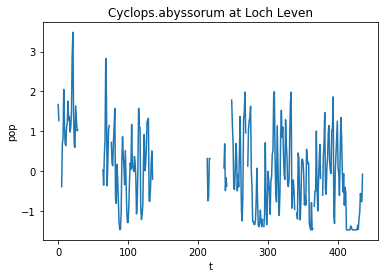

E = 2, tau = 1
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -330.913
[02] theta: 0.000, delta: 1.100, log Likelihood: -328.248
[03] theta: 0.000, delta: 2.310, log Likelihood: -326.701
[04] theta: 0.000, delta: 3.641, log Likelihood: -325.859
[05] theta: 0.000, delta: 5.105, log Likelihood: -325.199
[06] theta: 0.000, delta: 6.716, log Likelihood: -324.478
[07] theta: 0.000, delta: 8.487, log Likelihood: -323.673
[08] theta: 0.000, delta: 10.436, log Likelihood: -322.838
[09] theta: 0.000, delta: 12.579, log Likelihood: -322.030
[10] theta: 0.000, delta: 14.937, log Likelihood: -321.287
[11] theta: 0.000, delta: 17.531, log Likelihood: -320.627
[12] theta: 0.000, delta: 20.384, log Likelihood: -320.050
[13] theta: 0.000, delta: 23.523, log Likelihood: -319.550
[14] theta: 0.000, delta: 26.975, log Likelihood: -319.116
[15] theta: 0.000, delta: 30.772, log Likelihood: -318.739
[16] theta: 0.000, delta: 34.950, log Likelihood: -318.411
[17] theta: 0.000, delta: 39

[01] theta: 0.000, delta: 0.000, log Likelihood: -255.993
[02] theta: 0.000, delta: 0.000, log Likelihood: -255.993
E = 6, tau = 1
(426,) (426,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -284.976
[02] theta: 0.000, delta: 1.100, log Likelihood: -284.994
[03] theta: 0.000, delta: 0.550, log Likelihood: -284.781
[04] theta: 0.000, delta: 0.000, log Likelihood: -284.976
[05] theta: 0.000, delta: 0.303, log Likelihood: -284.806
[06] theta: 0.000, delta: 0.635, log Likelihood: -284.792
[07] theta: 0.000, delta: 0.469, log Likelihood: -284.779
[08] theta: 0.000, delta: 0.552, log Likelihood: -284.781
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -284.976
[02] theta: 0.000, delta: 0.000, log Likelihood: -284.976
E = 6, tau = 2
(422,) (422,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -240.421
[02] theta: 0.000, delta: 1.100, log Likelihood: -237.245
[03] theta: 0.000, delta: 2.310, log Likelihood: -237.293
[04] theta: 0.000, delta: 1.705, log Likelihood: -237.0

[14] theta: 0.000, delta: 0.000, log Likelihood: nan
[15] theta: 0.000, delta: 0.000, log Likelihood: nan
[16] theta: 0.000, delta: 0.000, log Likelihood: nan
[17] theta: 0.000, delta: 0.000, log Likelihood: nan
[18] theta: 0.000, delta: 0.000, log Likelihood: nan
[19] theta: 0.000, delta: 0.000, log Likelihood: nan
[20] theta: 0.000, delta: 0.000, log Likelihood: nan
(6, 2) (6, 2)
NSMap: 
 Max Likelihood nan 
 Lags: 22 
 tau: 6 
 Theta: 0.0 
 Delta: 0.0
SMap: 
 Max Likelihood nan 
 Lags: 22 
 tau: 6 
 Theta: 0.0
0.0 56.194


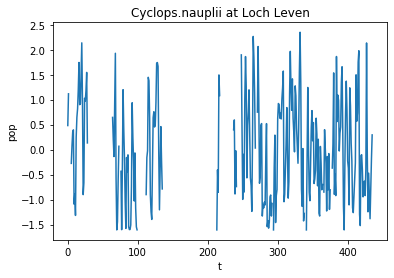

E = 2, tau = 1
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.676
[02] theta: 0.000, delta: 0.000, log Likelihood: -331.676
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.676
[02] theta: 0.000, delta: 0.000, log Likelihood: -331.676
E = 2, tau = 2
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.676
[02] theta: 0.000, delta: 0.000, log Likelihood: -331.676
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.676
[02] theta: 0.000, delta: 0.000, log Likelihood: -331.676
E = 2, tau = 6
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.676
[02] theta: 0.000, delta: 0.000, log Likelihood: -331.676
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.676
[02] theta: 0.000, delta: 0.000, log Likelihood: -331.676
E = 3, tau = 1
(429,) (429,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -312.002
[02] theta: 0.000, delta: 0.000, log Likelihood: -312.002
SMap
[01] theta: 0.000, delta: 0.

[20] theta: 0.000, delta: 0.000, log Likelihood: -inf
E = 24, tau = 6
(298,) (298,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -405.006
[02] theta: 0.000, delta: 0.000, log Likelihood: -405.006
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -405.006
[02] theta: 0.000, delta: 0.000, log Likelihood: -405.006
(5, 2) (5, 2)
NSMap: 
 Max Likelihood -66.68221254167366 
 Lags: 16 
 tau: 6 
 Theta: 0.0 
 Delta: 0.0
SMap: 
 Max Likelihood -66.68221254167366 
 Lags: 16 
 tau: 6 
 Theta: 0.0
0.0 56.194


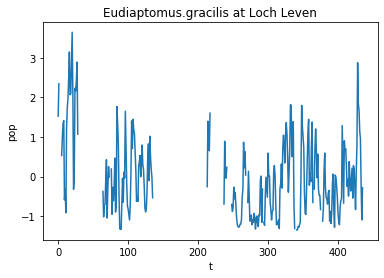

E = 2, tau = 1
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -358.227
[02] theta: 1.100, delta: 1.100, log Likelihood: -352.703
[03] theta: 0.550, delta: 2.310, log Likelihood: -348.721
[04] theta: 0.000, delta: 3.641, log Likelihood: -349.624
[05] theta: 0.303, delta: 5.105, log Likelihood: -345.636
[06] theta: 0.635, delta: 6.716, log Likelihood: -344.104
[07] theta: 0.469, delta: 8.487, log Likelihood: -342.613
[08] theta: 0.286, delta: 10.436, log Likelihood: -341.378
[09] theta: 0.377, delta: 12.579, log Likelihood: -340.083
[10] theta: 0.332, delta: 14.937, log Likelihood: -338.899
[11] theta: 0.281, delta: 17.531, log Likelihood: -337.753
[12] theta: 0.226, delta: 20.384, log Likelihood: -336.618
[13] theta: 0.165, delta: 23.523, log Likelihood: -335.457
[14] theta: 0.098, delta: 26.975, log Likelihood: -334.222
[15] theta: 0.024, delta: 30.772, log Likelihood: -332.857
[16] theta: 0.000, delta: 34.950, log Likelihood: -331.536
[17] theta: 0.000, delta: 39

[19] theta: 0.027, delta: 50.159, log Likelihood: -309.575
[20] theta: 0.003, delta: 56.275, log Likelihood: -308.564
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -331.870
[02] theta: 1.100, delta: 0.000, log Likelihood: -336.364
[03] theta: 0.550, delta: 0.000, log Likelihood: -332.993
[04] theta: 0.000, delta: 0.000, log Likelihood: -331.870
[05] theta: 0.303, delta: 0.000, log Likelihood: -332.058
[06] theta: 0.151, delta: 0.000, log Likelihood: -331.784
[07] theta: 0.000, delta: 0.000, log Likelihood: -331.870
[08] theta: 0.083, delta: 0.000, log Likelihood: -331.768
[09] theta: 0.175, delta: 0.000, log Likelihood: -331.806
[10] theta: 0.129, delta: 0.000, log Likelihood: -331.770
[11] theta: 0.079, delta: 0.000, log Likelihood: -331.770
E = 3, tau = 6
(424,) (424,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -301.176
[02] theta: 1.100, delta: 1.100, log Likelihood: -296.540
[03] theta: 0.550, delta: 2.310, log Likelihood: -290.384
[04] theta: 0.000, delta: 3.64

[01] theta: 0.000, delta: 0.000, log Likelihood: -150.013
[02] theta: 0.000, delta: 1.100, log Likelihood: -151.940
[03] theta: 0.000, delta: 0.550, log Likelihood: -150.380
[04] theta: 0.000, delta: 0.000, log Likelihood: -150.013
[05] theta: 0.000, delta: 0.303, log Likelihood: -150.028
[06] theta: 0.000, delta: 0.151, log Likelihood: -149.959
[07] theta: 0.000, delta: 0.000, log Likelihood: -150.013
[08] theta: 0.000, delta: 0.083, log Likelihood: -149.968
[09] theta: 0.000, delta: 0.175, log Likelihood: -149.961
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -150.013
[02] theta: 0.000, delta: 0.000, log Likelihood: -150.013
E = 12, tau = 6
(370,) (370,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -108.192
[02] theta: 0.000, delta: 0.000, log Likelihood: -108.192
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -108.192
[02] theta: 0.000, delta: 0.000, log Likelihood: -108.192
E = 18, tau = 1
(414,) (414,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood:

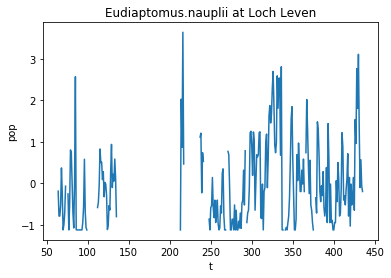

E = 2, tau = 1
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -300.042
[02] theta: 0.000, delta: 1.100, log Likelihood: -297.823
[03] theta: 0.000, delta: 2.310, log Likelihood: -297.301
[04] theta: 0.000, delta: 3.641, log Likelihood: -297.359
[05] theta: 0.000, delta: 2.976, log Likelihood: -297.307
[06] theta: 0.000, delta: 2.243, log Likelihood: -297.306
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -300.042
[02] theta: 0.000, delta: 0.000, log Likelihood: -300.042
E = 2, tau = 2
(430,) (430,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -300.042
[02] theta: 0.000, delta: 1.100, log Likelihood: -297.823
[03] theta: 0.000, delta: 2.310, log Likelihood: -297.301
[04] theta: 0.000, delta: 3.641, log Likelihood: -297.359
[05] theta: 0.000, delta: 2.976, log Likelihood: -297.307
[06] theta: 0.000, delta: 2.243, log Likelihood: -297.306
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -300.042
[02] theta: 0.000, delta: 0.000, log Likelihood: -

[02] theta: 0.000, delta: 0.000, log Likelihood: -114.984
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -114.984
[02] theta: 0.000, delta: 0.000, log Likelihood: -114.984
E = 18, tau = 1
(414,) (414,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -157.642
[02] theta: 0.000, delta: 0.000, log Likelihood: -157.642
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -157.642
[02] theta: 0.000, delta: 0.000, log Likelihood: -157.642
E = 18, tau = 2
(398,) (398,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -94.105
[02] theta: 0.000, delta: 0.000, log Likelihood: -94.105
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -94.105
[02] theta: 0.000, delta: 0.000, log Likelihood: -94.105
E = 18, tau = 6
(334,) (334,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -65.013
[02] theta: 0.000, delta: 0.000, log Likelihood: -65.013
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -65.013
[02] theta: 0.000, delta: 0.000, log Likelihood: -65.013
E = 24, ta

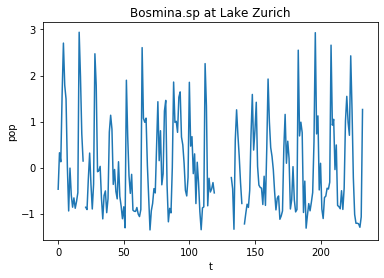

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -273.665
[02] theta: 1.100, delta: 1.100, log Likelihood: -272.808
[03] theta: 0.550, delta: 2.310, log Likelihood: -271.267
[04] theta: 0.000, delta: 3.641, log Likelihood: -272.057
[05] theta: 0.303, delta: 5.105, log Likelihood: -271.024
[06] theta: 0.635, delta: 4.373, log Likelihood: -271.252
[07] theta: 0.469, delta: 3.568, log Likelihood: -271.021
[08] theta: 0.286, delta: 3.970, log Likelihood: -271.059
[09] theta: 0.377, delta: 4.413, log Likelihood: -270.970
[10] theta: 0.478, delta: 4.900, log Likelihood: -271.010
[11] theta: 0.428, delta: 4.657, log Likelihood: -270.973
[12] theta: 0.372, delta: 4.389, log Likelihood: -270.972
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -273.665
[02] theta: 1.100, delta: 0.000, log Likelihood: -273.065
[03] theta: 0.550, delta: 0.000, log Likelihood: -272.462
[04] theta: 0.825, delta: 0.000, log Likelihood: -272.641
[05] theta: 0.688, delta: 0.000,

[06] theta: 0.635, delta: 0.000, log Likelihood: -206.514
E = 6, tau = 1
(223,) (223,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -250.508
[02] theta: 0.000, delta: 1.100, log Likelihood: -250.312
[03] theta: 0.000, delta: 0.550, log Likelihood: -250.204
[04] theta: 0.000, delta: 0.825, log Likelihood: -250.220
[05] theta: 0.000, delta: 0.688, log Likelihood: -250.201
[06] theta: 0.000, delta: 0.536, log Likelihood: -250.205
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -250.508
[02] theta: 0.000, delta: 0.000, log Likelihood: -250.508
E = 6, tau = 2
(219,) (219,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -212.957
[02] theta: 0.000, delta: 0.000, log Likelihood: -212.957
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -212.957
[02] theta: 0.000, delta: 0.000, log Likelihood: -212.957
E = 6, tau = 6
(203,) (203,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -182.412
[02] theta: 0.000, delta: 0.000, log Likelihood: -182.412
SMap
[01] theta

C:\Users\Kenneth Gee\Desktop\Munch Research\Nonlinear-Regression\EDMtoolkit.py:402: RuntimeWarning: invalid value encountered in double_scalars
  mean_squared_residuals = np.sum((Y-Yhat)**2) / (n-k)


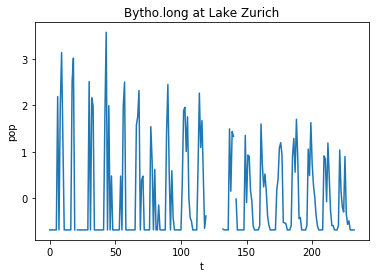

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -274.035
[02] theta: 1.100, delta: 1.100, log Likelihood: -270.650
[03] theta: 0.550, delta: 0.550, log Likelihood: -270.876
[04] theta: 0.825, delta: 0.000, log Likelihood: -270.251
[05] theta: 1.128, delta: 0.000, log Likelihood: -270.032
[06] theta: 1.460, delta: 0.000, log Likelihood: -270.166
[07] theta: 1.294, delta: 0.000, log Likelihood: -270.060
[08] theta: 1.111, delta: 0.000, log Likelihood: -270.034
[09] theta: 1.202, delta: 0.000, log Likelihood: -270.034
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -274.035
[02] theta: 1.100, delta: 0.000, log Likelihood: -270.036
[03] theta: 2.310, delta: 0.000, log Likelihood: -271.392
[04] theta: 1.705, delta: 0.000, log Likelihood: -270.427
[05] theta: 1.040, delta: 0.000, log Likelihood: -270.055
[06] theta: 1.372, delta: 0.000, log Likelihood: -270.101
[07] theta: 1.206, delta: 0.000, log Likelihood: -270.034
[08] theta: 1.023, delta: 0.000,

[04] theta: 0.000, delta: 0.000, log Likelihood: -215.542
[05] theta: 0.303, delta: 0.303, log Likelihood: -214.826
[06] theta: 0.635, delta: 0.151, log Likelihood: -214.885
[07] theta: 0.469, delta: 0.000, log Likelihood: -214.605
[08] theta: 0.286, delta: 0.000, log Likelihood: -214.704
[09] theta: 0.377, delta: 0.000, log Likelihood: -214.619
[10] theta: 0.478, delta: 0.000, log Likelihood: -214.607
[11] theta: 0.428, delta: 0.000, log Likelihood: -214.603
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -215.542
[02] theta: 1.100, delta: 0.000, log Likelihood: -215.985
[03] theta: 0.550, delta: 0.000, log Likelihood: -214.646
[04] theta: 0.000, delta: 0.000, log Likelihood: -215.542
[05] theta: 0.303, delta: 0.000, log Likelihood: -214.683
[06] theta: 0.635, delta: 0.000, log Likelihood: -214.738
[07] theta: 0.469, delta: 0.000, log Likelihood: -214.605
[08] theta: 0.286, delta: 0.000, log Likelihood: -214.704
[09] theta: 0.377, delta: 0.000, log Likelihood: -214.619
[10] thet

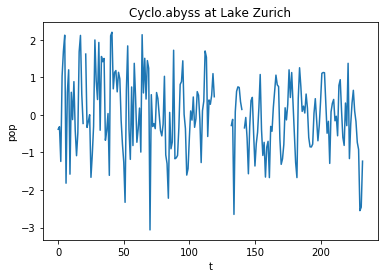

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -291.134
[02] theta: 0.000, delta: 1.100, log Likelihood: -290.550
[03] theta: 0.000, delta: 2.310, log Likelihood: -290.694
[04] theta: 0.000, delta: 1.705, log Likelihood: -290.572
[05] theta: 0.000, delta: 1.040, log Likelihood: -290.557
[06] theta: 0.000, delta: 1.372, log Likelihood: -290.542
[07] theta: 0.000, delta: 1.206, log Likelihood: -290.542
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -291.134
[02] theta: 0.000, delta: 0.000, log Likelihood: -291.134
E = 2, tau = 2
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -291.134
[02] theta: 0.000, delta: 1.100, log Likelihood: -290.550
[03] theta: 0.000, delta: 2.310, log Likelihood: -290.694
[04] theta: 0.000, delta: 1.705, log Likelihood: -290.572
[05] theta: 0.000, delta: 1.040, log Likelihood: -290.557
[06] theta: 0.000, delta: 1.372, log Likelihood: -290.542
[07] theta: 0.000, delta: 1.206, log Likelihood: -290.5

[01] theta: 0.000, delta: 0.000, log Likelihood: -218.099
[02] theta: 0.000, delta: 0.000, log Likelihood: -218.099
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -218.099
[02] theta: 0.000, delta: 0.000, log Likelihood: -218.099
E = 24, tau = 2
(183,) (183,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -166.191
[02] theta: 0.000, delta: 0.000, log Likelihood: -166.191
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -166.191
[02] theta: 0.000, delta: 0.000, log Likelihood: -166.191
E = 24, tau = 6
(95,) (95,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000,

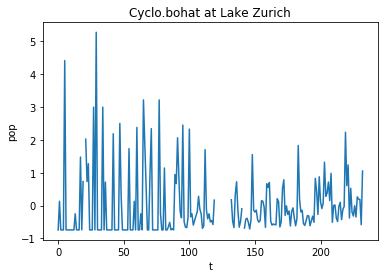

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -288.583
[02] theta: 1.100, delta: 0.000, log Likelihood: -291.603
[03] theta: 0.550, delta: 0.250, log Likelihood: -289.734
[04] theta: 0.000, delta: 0.525, log Likelihood: -288.950
[05] theta: 0.303, delta: 0.388, log Likelihood: -289.140
[06] theta: 0.151, delta: 0.236, log Likelihood: -288.841
[07] theta: 0.000, delta: 0.070, log Likelihood: -288.633
[08] theta: 0.083, delta: 0.000, log Likelihood: -288.641
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -288.583
[02] theta: 1.100, delta: 0.000, log Likelihood: -291.603
[03] theta: 0.550, delta: 0.000, log Likelihood: -289.838
[04] theta: 0.000, delta: 0.000, log Likelihood: -288.583
[05] theta: 0.303, delta: 0.000, log Likelihood: -289.133
[06] theta: 0.151, delta: 0.000, log Likelihood: -288.764
[07] theta: 0.000, delta: 0.000, log Likelihood: -288.583
[08] theta: 0.083, delta: 0.000, log Likelihood: -288.641
[09] theta: 0.042, delta: 0.000,

[02] theta: 0.000, delta: 0.000, log Likelihood: -205.460
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -205.460
[02] theta: 0.000, delta: 0.000, log Likelihood: -205.460
E = 18, tau = 2
(195,) (195,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -194.164
[02] theta: 0.000, delta: 0.000, log Likelihood: -194.164
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -194.164
[02] theta: 0.000, delta: 0.000, log Likelihood: -194.164
E = 18, tau = 6
(131,) (131,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] theta: 0.000, delta: 0.000, log Likelihood: nan
[04] theta: 0.000, delta: 0.000, log Likelihood: nan
[05] theta: 0.000, delta: 0.000, log Likelihood: nan
[06] theta: 0.000, delta: 0.000, log Likelihood: nan
[07] theta: 0.000, delta: 0.000, log Likelihood: nan
[08] theta: 0.000, delta: 0.000, log Likelihood: nan
[09] theta: 0.000, delta: 0.000, log Likelihood: nan
[10] theta: 0.000, delta: 0.000, lo

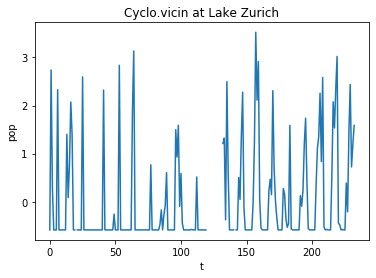

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -277.757
[02] theta: 1.100, delta: 1.100, log Likelihood: -268.246
[03] theta: 2.310, delta: 2.310, log Likelihood: -264.758
[04] theta: 1.705, delta: 3.641, log Likelihood: -261.864
[05] theta: 1.040, delta: 5.105, log Likelihood: -260.822
[06] theta: 1.372, delta: 6.716, log Likelihood: -260.895
[07] theta: 1.206, delta: 5.910, log Likelihood: -260.751
[08] theta: 1.023, delta: 6.313, log Likelihood: -260.722
[09] theta: 1.114, delta: 6.112, log Likelihood: -260.722
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -277.757
[02] theta: 1.100, delta: 0.000, log Likelihood: -275.712
[03] theta: 0.550, delta: 0.000, log Likelihood: -276.084
[04] theta: 0.825, delta: 0.000, log Likelihood: -275.771
[05] theta: 1.128, delta: 0.000, log Likelihood: -275.717
[06] theta: 0.976, delta: 0.000, log Likelihood: -275.714
E = 2, tau = 2
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -277.7

[05] theta: 0.303, delta: 2.008, log Likelihood: -223.651
[06] theta: 0.635, delta: 2.340, log Likelihood: -223.455
[07] theta: 0.469, delta: 2.174, log Likelihood: -223.349
[08] theta: 0.552, delta: 1.991, log Likelihood: -223.312
[09] theta: 0.510, delta: 1.790, log Likelihood: -223.335
[10] theta: 0.531, delta: 1.890, log Likelihood: -223.314
[11] theta: 0.554, delta: 2.001, log Likelihood: -223.313
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -230.886
[02] theta: 1.100, delta: 0.000, log Likelihood: -227.787
[03] theta: 0.550, delta: 0.000, log Likelihood: -227.789
E = 6, tau = 1
(223,) (223,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -257.811
[02] theta: 0.000, delta: 1.100, log Likelihood: -255.241
[03] theta: 0.000, delta: 2.310, log Likelihood: -254.853
[04] theta: 0.000, delta: 1.705, log Likelihood: -254.854
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -257.811
[02] theta: 0.000, delta: 0.000, log Likelihood: -257.811
E = 6, tau = 2
(219,) (219,

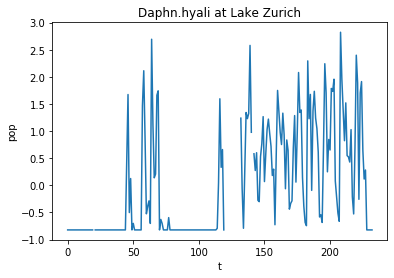

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -281.577
[02] theta: 1.100, delta: 1.100, log Likelihood: -268.811
[03] theta: 2.310, delta: 2.310, log Likelihood: -268.049
[04] theta: 1.705, delta: 3.641, log Likelihood: -266.496
[05] theta: 1.040, delta: 5.105, log Likelihood: -264.450
[06] theta: 0.307, delta: 6.716, log Likelihood: -261.888
[07] theta: 0.000, delta: 8.487, log Likelihood: -260.434
[08] theta: 0.000, delta: 10.436, log Likelihood: -259.783
[09] theta: 0.000, delta: 12.579, log Likelihood: -259.137
[10] theta: 0.000, delta: 14.937, log Likelihood: -258.467
[11] theta: 0.000, delta: 17.531, log Likelihood: -257.777
[12] theta: 0.000, delta: 20.384, log Likelihood: -257.084
[13] theta: 0.000, delta: 23.523, log Likelihood: -256.401
[14] theta: 0.000, delta: 26.975, log Likelihood: -255.743
[15] theta: 0.000, delta: 30.772, log Likelihood: -255.118
[16] theta: 0.000, delta: 34.950, log Likelihood: -254.533
[17] theta: 0.000, delta: 39

[08] theta: 1.555, delta: 0.000, log Likelihood: -260.670
[09] theta: 1.647, delta: 0.000, log Likelihood: -260.663
E = 3, tau = 6
(221,) (221,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -234.411
[02] theta: 1.100, delta: 1.100, log Likelihood: -239.006
[03] theta: 0.550, delta: 0.550, log Likelihood: -235.392
[04] theta: 0.000, delta: 0.000, log Likelihood: -234.411
[05] theta: 0.303, delta: 0.303, log Likelihood: -234.506
[06] theta: 0.151, delta: 0.635, log Likelihood: -234.051
[07] theta: 0.000, delta: 1.001, log Likelihood: -233.559
[08] theta: 0.000, delta: 1.404, log Likelihood: -233.356
[09] theta: 0.000, delta: 1.847, log Likelihood: -233.190
[10] theta: 0.000, delta: 2.334, log Likelihood: -233.059
[11] theta: 0.000, delta: 2.870, log Likelihood: -232.966
[12] theta: 0.000, delta: 3.459, log Likelihood: -232.916
[13] theta: 0.000, delta: 4.108, log Likelihood: -232.911
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -234.411
[02] theta: 1.100, delta: 0.000,

[01] theta: 0.000, delta: 0.000, log Likelihood: -225.805
[02] theta: 0.000, delta: 0.000, log Likelihood: -225.805
E = 12, tau = 2
(207,) (207,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -212.868
[02] theta: 0.000, delta: 0.000, log Likelihood: -212.868
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -212.868
[02] theta: 0.000, delta: 0.000, log Likelihood: -212.868
E = 12, tau = 6
(167,) (167,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -107.731
[02] theta: 0.000, delta: 0.000, log Likelihood: -107.731
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -107.731
[02] theta: 0.000, delta: 0.000, log Likelihood: -107.731
E = 18, tau = 1
(211,) (211,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -220.202
[02] theta: 0.000, delta: 0.000, log Likelihood: -220.202
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -220.202
[02] theta: 0.000, delta: 0.000, log Likelihood: -220.202
E = 18, tau = 2
(195,) (195,)
NSMap
[01] theta: 0.000, delta: 0.0

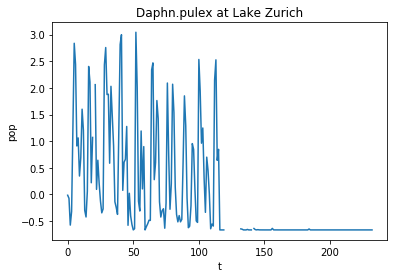

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -283.904
[02] theta: 1.100, delta: 1.100, log Likelihood: -259.257
[03] theta: 2.310, delta: 2.310, log Likelihood: -259.213
[04] theta: 1.705, delta: 3.641, log Likelihood: -254.705
[05] theta: 1.040, delta: 5.105, log Likelihood: -249.548
[06] theta: 0.307, delta: 6.716, log Likelihood: -244.964
[07] theta: 0.000, delta: 8.487, log Likelihood: -244.000
[08] theta: 0.403, delta: 10.436, log Likelihood: -243.730
[09] theta: 0.201, delta: 12.579, log Likelihood: -243.201
[10] theta: 0.000, delta: 14.937, log Likelihood: -243.318
[11] theta: 0.111, delta: 13.758, log Likelihood: -243.166
[12] theta: 0.233, delta: 14.348, log Likelihood: -243.187
[13] theta: 0.172, delta: 14.053, log Likelihood: -243.156
[14] theta: 0.105, delta: 14.201, log Likelihood: -243.168
[15] theta: 0.138, delta: 14.127, log Likelihood: -243.155
[16] theta: 0.175, delta: 14.164, log Likelihood: -243.156
SMap
[01] theta: 0.000, delt

[04] theta: 0.825, delta: 0.825, log Likelihood: -186.475
[05] theta: 1.128, delta: 0.688, log Likelihood: -186.238
[06] theta: 0.976, delta: 0.536, log Likelihood: -186.259
[07] theta: 1.052, delta: 0.370, log Likelihood: -186.159
[08] theta: 1.135, delta: 0.187, log Likelihood: -186.064
[09] theta: 1.227, delta: 0.000, log Likelihood: -185.986
[10] theta: 1.181, delta: 0.000, log Likelihood: -185.988
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -189.330
[02] theta: 1.100, delta: 0.000, log Likelihood: -186.024
[03] theta: 2.310, delta: 0.000, log Likelihood: -190.070
[04] theta: 1.705, delta: 0.000, log Likelihood: -186.815
[05] theta: 1.040, delta: 0.000, log Likelihood: -186.076
[06] theta: 1.372, delta: 0.000, log Likelihood: -186.071
E = 4, tau = 1
(225,) (225,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -267.697
[02] theta: 1.100, delta: 1.100, log Likelihood: -252.517
[03] theta: 0.550, delta: 2.310, log Likelihood: -248.699
[04] theta: 0.000, delta: 3.641,

[02] theta: 0.000, delta: 0.000, log Likelihood: -173.415
E = 12, tau = 2
(207,) (207,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -149.330
[02] theta: 0.000, delta: 0.000, log Likelihood: -149.330
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -149.330
[02] theta: 0.000, delta: 0.000, log Likelihood: -149.330
E = 12, tau = 6
(167,) (167,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -85.288
[02] theta: 0.000, delta: 0.000, log Likelihood: -85.288
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -85.288
[02] theta: 0.000, delta: 0.000, log Likelihood: -85.288
E = 18, tau = 1
(211,) (211,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -164.203
[02] theta: 0.000, delta: 1.100, log Likelihood: -164.094
[03] theta: 0.000, delta: 2.310, log Likelihood: -163.727
[04] theta: 0.000, delta: 3.641, log Likelihood: -163.506
[05] theta: 0.000, delta: 2.976, log Likelihood: -163.537
[06] theta: 0.000, delta: 3.308, log Likelihood: -163.496
[07] theta: 0.00

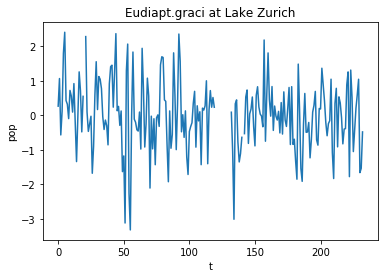

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -287.188
[02] theta: 1.100, delta: 1.100, log Likelihood: -288.466
[03] theta: 0.550, delta: 2.310, log Likelihood: -285.436
[04] theta: 0.000, delta: 3.641, log Likelihood: -285.716
[05] theta: 0.303, delta: 2.976, log Likelihood: -284.751
[06] theta: 0.151, delta: 2.243, log Likelihood: -284.885
[07] theta: 0.227, delta: 2.609, log Likelihood: -284.729
[08] theta: 0.310, delta: 3.012, log Likelihood: -284.762
[09] theta: 0.268, delta: 2.811, log Likelihood: -284.721
[10] theta: 0.223, delta: 2.589, log Likelihood: -284.733
[11] theta: 0.246, delta: 2.700, log Likelihood: -284.719
[12] theta: 0.271, delta: 2.645, log Likelihood: -284.719
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -287.188
[02] theta: 1.100, delta: 0.000, log Likelihood: -289.382
[03] theta: 0.550, delta: 0.000, log Likelihood: -287.284
[04] theta: 0.000, delta: 0.000, log Likelihood: -287.188
[05] theta: 0.303, delta: 0.000,

[03] theta: 0.000, delta: 0.550, log Likelihood: -272.834
[04] theta: 0.000, delta: 0.000, log Likelihood: -272.869
[05] theta: 0.000, delta: 0.303, log Likelihood: -272.800
[06] theta: 0.000, delta: 0.635, log Likelihood: -272.862
[07] theta: 0.000, delta: 0.469, log Likelihood: -272.815
[08] theta: 0.000, delta: 0.286, log Likelihood: -272.800
[09] theta: 0.000, delta: 0.377, log Likelihood: -272.802
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -272.869
[02] theta: 0.000, delta: 0.000, log Likelihood: -272.869
E = 6, tau = 2
(219,) (219,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -259.285
[02] theta: 0.000, delta: 1.100, log Likelihood: -258.927
[03] theta: 0.000, delta: 0.550, log Likelihood: -258.966
[04] theta: 0.000, delta: 0.825, log Likelihood: -258.920
[05] theta: 0.000, delta: 1.128, log Likelihood: -258.930
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -259.285
[02] theta: 0.000, delta: 0.000, log Likelihood: -259.285
E = 6, tau = 6
(203,) (203,

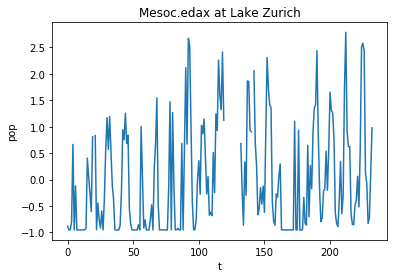

E = 2, tau = 1
(227,) (227,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -290.237
[02] theta: 1.100, delta: 1.100, log Likelihood: -287.618
[03] theta: 0.550, delta: 2.310, log Likelihood: -286.060
[04] theta: 0.000, delta: 3.641, log Likelihood: -285.368
[05] theta: 0.303, delta: 5.105, log Likelihood: -284.651
[06] theta: 0.151, delta: 6.716, log Likelihood: -283.804
[07] theta: 0.227, delta: 8.487, log Likelihood: -282.786
[08] theta: 0.189, delta: 10.436, log Likelihood: -281.688
[09] theta: 0.208, delta: 12.579, log Likelihood: -280.557
[10] theta: 0.199, delta: 14.937, log Likelihood: -279.431
[11] theta: 0.188, delta: 17.531, log Likelihood: -278.335
[12] theta: 0.177, delta: 20.384, log Likelihood: -277.283
[13] theta: 0.164, delta: 23.523, log Likelihood: -276.278
[14] theta: 0.150, delta: 26.975, log Likelihood: -275.322
[15] theta: 0.135, delta: 30.772, log Likelihood: -274.413
[16] theta: 0.118, delta: 34.950, log Likelihood: -273.550
[17] theta: 0.100, delta: 39

[05] theta: 0.000, delta: 0.303, log Likelihood: -247.407
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -247.398
[02] theta: 0.000, delta: 0.000, log Likelihood: -247.398
E = 4, tau = 1
(225,) (225,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -281.029
[02] theta: 1.100, delta: 1.100, log Likelihood: -284.206
[03] theta: 0.550, delta: 0.550, log Likelihood: -280.790
[04] theta: 0.000, delta: 0.825, log Likelihood: -278.976
[05] theta: 0.000, delta: 1.128, log Likelihood: -278.610
[06] theta: 0.000, delta: 1.460, log Likelihood: -278.356
[07] theta: 0.000, delta: 1.826, log Likelihood: -278.202
[08] theta: 0.000, delta: 2.229, log Likelihood: -278.126
[09] theta: 0.000, delta: 2.672, log Likelihood: -278.103
[10] theta: 0.000, delta: 3.159, log Likelihood: -278.106
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -281.029
[02] theta: 1.100, delta: 0.000, log Likelihood: -284.441
[03] theta: 0.550, delta: 0.000, log Likelihood: -281.973
[04] theta: 0.000, delta: 0

[01] theta: 0.000, delta: 0.000, log Likelihood: -196.502
[02] theta: 0.000, delta: 0.000, log Likelihood: -196.502
E = 24, tau = 2
(183,) (183,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -150.330
[02] theta: 0.000, delta: 1.100, log Likelihood: -150.718
[03] theta: 0.000, delta: 0.550, log Likelihood: -149.733
[04] theta: 0.000, delta: 0.000, log Likelihood: -150.330
[05] theta: 0.000, delta: 0.303, log Likelihood: -149.811
[06] theta: 0.000, delta: 0.635, log Likelihood: -149.782
[07] theta: 0.000, delta: 0.469, log Likelihood: -149.723
[08] theta: 0.000, delta: 0.552, log Likelihood: -149.734
[09] theta: 0.000, delta: 0.510, log Likelihood: -149.724
[10] theta: 0.000, delta: 0.465, log Likelihood: -149.723
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -150.330
[02] theta: 0.000, delta: 0.000, log Likelihood: -150.330
E = 24, tau = 6
(95,) (95,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: nan
[02] theta: 0.000, delta: 0.000, log Likelihood: nan
[03] th

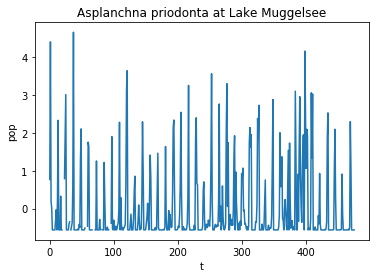

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -623.110
[02] theta: 0.000, delta: 1.100, log Likelihood: -622.870
[03] theta: 0.000, delta: 2.310, log Likelihood: -622.898
[04] theta: 0.000, delta: 1.705, log Likelihood: -622.875
[05] theta: 0.000, delta: 1.040, log Likelihood: -622.873
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -623.110
[02] theta: 0.000, delta: 0.000, log Likelihood: -623.110
E = 2, tau = 2
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -623.110
[02] theta: 0.000, delta: 1.100, log Likelihood: -622.870
[03] theta: 0.000, delta: 2.310, log Likelihood: -622.898
[04] theta: 0.000, delta: 1.705, log Likelihood: -622.875
[05] theta: 0.000, delta: 1.040, log Likelihood: -622.873
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -623.110
[02] theta: 0.000, delta: 0.000, log Likelihood: -623.110
E = 2, tau = 6
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -623.110
[02] theta: 0.0

[01] theta: 0.000, delta: 0.000, log Likelihood: -496.682
[02] theta: 1.100, delta: 1.100, log Likelihood: -498.403
[03] theta: 0.550, delta: 0.550, log Likelihood: -494.208
[04] theta: 0.000, delta: 0.000, log Likelihood: -496.682
[05] theta: 0.303, delta: 0.303, log Likelihood: -494.561
[06] theta: 0.635, delta: 0.635, log Likelihood: -494.396
[07] theta: 0.469, delta: 0.469, log Likelihood: -494.178
[08] theta: 0.552, delta: 0.286, log Likelihood: -494.062
[09] theta: 0.644, delta: 0.085, log Likelihood: -494.049
[10] theta: 0.598, delta: 0.000, log Likelihood: -494.061
[11] theta: 0.621, delta: 0.111, log Likelihood: -494.039
[12] theta: 0.609, delta: 0.055, log Likelihood: -494.043
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -496.682
[02] theta: 1.100, delta: 0.000, log Likelihood: -495.839
[03] theta: 0.550, delta: 0.000, log Likelihood: -494.095
[04] theta: 0.825, delta: 0.000, log Likelihood: -494.368
[05] theta: 0.688, delta: 0.000, log Likelihood: -494.088
[06] thet

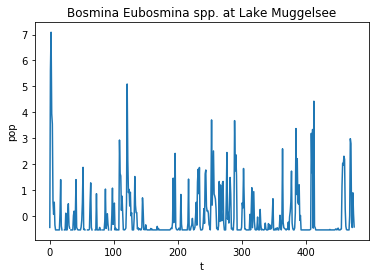

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -572.636
[02] theta: 0.000, delta: 0.000, log Likelihood: -572.636
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -572.636
[02] theta: 0.000, delta: 0.000, log Likelihood: -572.636
E = 2, tau = 2
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -572.636
[02] theta: 0.000, delta: 0.000, log Likelihood: -572.636
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -572.636
[02] theta: 0.000, delta: 0.000, log Likelihood: -572.636
E = 2, tau = 6
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -572.636
[02] theta: 0.000, delta: 0.000, log Likelihood: -572.636
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -572.636
[02] theta: 0.000, delta: 0.000, log Likelihood: -572.636
E = 3, tau = 1
(470,) (470,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -565.796
[02] theta: 0.000, delta: 0.000, log Likelihood: -565.796
SMap
[01] theta: 0.000, delta: 0.

[03] theta: 0.550, delta: 0.000, log Likelihood: -518.239
[04] theta: 0.000, delta: 0.000, log Likelihood: -519.388
[05] theta: 0.303, delta: 0.000, log Likelihood: -517.843
[06] theta: 0.635, delta: 0.000, log Likelihood: -518.643
[07] theta: 0.469, delta: 0.000, log Likelihood: -517.979
[08] theta: 0.286, delta: 0.000, log Likelihood: -517.861
[09] theta: 0.377, delta: 0.000, log Likelihood: -517.836
[10] theta: 0.332, delta: 0.000, log Likelihood: -517.827
E = 6, tau = 6
(447,) (447,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -497.314
[02] theta: 0.000, delta: 1.100, log Likelihood: -495.214
[03] theta: 0.000, delta: 2.310, log Likelihood: -494.503
[04] theta: 0.000, delta: 3.641, log Likelihood: -494.744
[05] theta: 0.000, delta: 2.976, log Likelihood: -494.535
[06] theta: 0.000, delta: 2.243, log Likelihood: -494.513
[07] theta: 0.000, delta: 2.609, log Likelihood: -494.490
[08] theta: 0.000, delta: 2.426, log Likelihood: -494.492
SMap
[01] theta: 0.000, delta: 0.000,

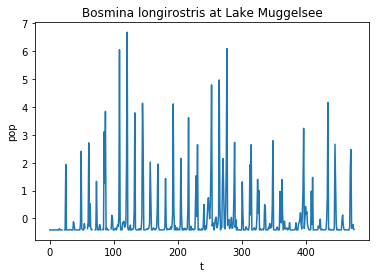

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -629.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -629.437
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -629.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -629.437
E = 2, tau = 2
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -629.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -629.437
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -629.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -629.437
E = 2, tau = 6
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -629.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -629.437
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -629.437
[02] theta: 0.000, delta: 0.000, log Likelihood: -629.437
E = 3, tau = 1
(470,) (470,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -621.609
[02] theta: 0.000, delta: 0.000, log Likelihood: -621.609
SMap
[01] theta: 0.000, delta: 0.

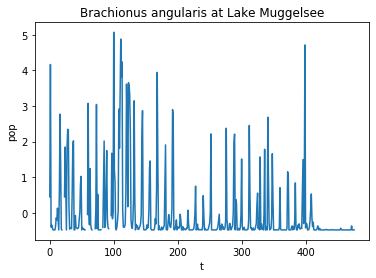

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -604.637
[02] theta: 1.100, delta: 1.100, log Likelihood: -600.679
[03] theta: 0.550, delta: 2.310, log Likelihood: -595.045
[04] theta: 0.000, delta: 3.641, log Likelihood: -590.705
[05] theta: 0.000, delta: 5.105, log Likelihood: -589.461
[06] theta: 0.000, delta: 6.716, log Likelihood: -588.477
[07] theta: 0.000, delta: 8.487, log Likelihood: -587.547
[08] theta: 0.000, delta: 10.436, log Likelihood: -586.613
[09] theta: 0.000, delta: 12.579, log Likelihood: -585.674
[10] theta: 0.000, delta: 14.937, log Likelihood: -584.747
[11] theta: 0.000, delta: 17.531, log Likelihood: -583.848
[12] theta: 0.000, delta: 20.384, log Likelihood: -582.984
[13] theta: 0.000, delta: 23.523, log Likelihood: -582.159
[14] theta: 0.000, delta: 26.975, log Likelihood: -581.366
[15] theta: 0.000, delta: 30.772, log Likelihood: -580.600
[16] theta: 0.000, delta: 34.950, log Likelihood: -579.852
[17] theta: 0.000, delta: 39

[06] theta: 0.635, delta: 0.000, log Likelihood: -587.175
[07] theta: 0.469, delta: 0.000, log Likelihood: -586.968
[08] theta: 0.286, delta: 0.000, log Likelihood: -586.937
[09] theta: 0.377, delta: 0.000, log Likelihood: -586.928
E = 3, tau = 6
(465,) (465,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -528.580
[02] theta: 1.100, delta: 1.100, log Likelihood: -518.145
[03] theta: 0.550, delta: 2.310, log Likelihood: -519.803
[04] theta: 0.825, delta: 3.641, log Likelihood: -518.251
[05] theta: 1.128, delta: 2.976, log Likelihood: -518.060
[06] theta: 0.976, delta: 2.243, log Likelihood: -517.970
[07] theta: 1.052, delta: 2.609, log Likelihood: -517.945
[08] theta: 1.014, delta: 2.426, log Likelihood: -517.940
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -528.580
[02] theta: 1.100, delta: 0.000, log Likelihood: -518.761
[03] theta: 0.550, delta: 0.000, log Likelihood: -520.848
[04] theta: 0.825, delta: 0.000, log Likelihood: -519.177
[05] theta: 1.128, delta: 0.000,

[02] theta: 1.100, delta: 0.000, log Likelihood: -432.684
[03] theta: 0.550, delta: 0.000, log Likelihood: -433.030
[04] theta: 0.825, delta: 0.000, log Likelihood: -432.313
[05] theta: 1.128, delta: 0.000, log Likelihood: -432.782
[06] theta: 0.976, delta: 0.000, log Likelihood: -432.381
[07] theta: 0.810, delta: 0.000, log Likelihood: -432.325
[08] theta: 0.893, delta: 0.000, log Likelihood: -432.303
[09] theta: 0.851, delta: 0.000, log Likelihood: -432.301
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -437.820
[02] theta: 1.100, delta: 0.000, log Likelihood: -432.684
[03] theta: 0.550, delta: 0.000, log Likelihood: -433.030
[04] theta: 0.825, delta: 0.000, log Likelihood: -432.313
[05] theta: 1.128, delta: 0.000, log Likelihood: -432.782
[06] theta: 0.976, delta: 0.000, log Likelihood: -432.381
[07] theta: 0.810, delta: 0.000, log Likelihood: -432.325
[08] theta: 0.893, delta: 0.000, log Likelihood: -432.303
[09] theta: 0.851, delta: 0.000, log Likelihood: -432.301
E = 12, t

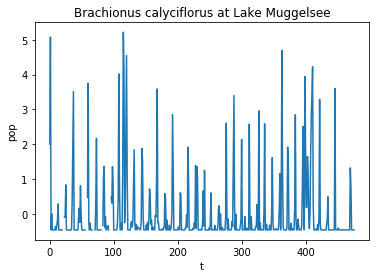

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -618.061
[02] theta: 1.100, delta: 0.000, log Likelihood: -618.605
[03] theta: 0.550, delta: 0.000, log Likelihood: -618.102
[04] theta: 0.000, delta: 0.000, log Likelihood: -618.061
[05] theta: 0.303, delta: 0.000, log Likelihood: -618.088
[06] theta: 0.635, delta: 0.000, log Likelihood: -618.129
[07] theta: 0.469, delta: 0.000, log Likelihood: -618.090
[08] theta: 0.286, delta: 0.000, log Likelihood: -618.088
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -618.061
[02] theta: 1.100, delta: 0.000, log Likelihood: -618.605
[03] theta: 0.550, delta: 0.000, log Likelihood: -618.102
[04] theta: 0.000, delta: 0.000, log Likelihood: -618.061
[05] theta: 0.303, delta: 0.000, log Likelihood: -618.088
[06] theta: 0.635, delta: 0.000, log Likelihood: -618.129
[07] theta: 0.469, delta: 0.000, log Likelihood: -618.090
[08] theta: 0.286, delta: 0.000, log Likelihood: -618.088
E = 2, tau = 2
(471,) (471,)
NSM

[01] theta: 0.000, delta: 0.000, log Likelihood: -452.069
[02] theta: 0.000, delta: 0.000, log Likelihood: -452.069
E = 12, tau = 6
(411,) (411,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -433.857
[02] theta: 0.000, delta: 1.100, log Likelihood: -434.948
[03] theta: 0.000, delta: 0.550, log Likelihood: -433.952
[04] theta: 0.000, delta: 0.000, log Likelihood: -433.857
[05] theta: 0.000, delta: 0.303, log Likelihood: -433.773
[06] theta: 0.000, delta: 0.151, log Likelihood: -433.770
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -433.857
[02] theta: 0.000, delta: 0.000, log Likelihood: -433.857
E = 18, tau = 1
(455,) (455,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -478.178
[02] theta: 0.000, delta: 0.000, log Likelihood: -478.178
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -478.178
[02] theta: 0.000, delta: 0.000, log Likelihood: -478.178
E = 18, tau = 2
(439,) (439,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -420.981
[02] theta: 

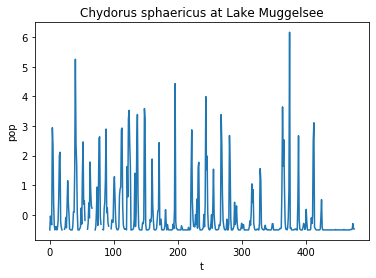

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -614.683
[02] theta: 1.100, delta: 1.100, log Likelihood: -597.010
[03] theta: 0.550, delta: 2.310, log Likelihood: -592.223
[04] theta: 0.825, delta: 3.641, log Likelihood: -588.052
[05] theta: 1.128, delta: 5.105, log Likelihood: -586.557
[06] theta: 0.976, delta: 6.716, log Likelihood: -586.111
[07] theta: 1.052, delta: 8.487, log Likelihood: -585.928
[08] theta: 1.014, delta: 10.436, log Likelihood: -585.860
[09] theta: 0.972, delta: 12.579, log Likelihood: -585.794
[10] theta: 0.927, delta: 14.937, log Likelihood: -585.681
[11] theta: 0.950, delta: 17.531, log Likelihood: -585.500
[12] theta: 0.938, delta: 20.384, log Likelihood: -585.244
[13] theta: 0.926, delta: 23.523, log Likelihood: -584.927
[14] theta: 0.912, delta: 26.975, log Likelihood: -584.571
[15] theta: 0.897, delta: 30.772, log Likelihood: -584.201
[16] theta: 0.880, delta: 34.950, log Likelihood: -583.843
[17] theta: 0.861, delta: 39

[07] theta: 0.810, delta: 0.000, log Likelihood: -563.485
[08] theta: 0.893, delta: 0.000, log Likelihood: -563.411
[09] theta: 0.985, delta: 0.000, log Likelihood: -563.413
E = 4, tau = 1
(469,) (469,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -576.632
[02] theta: 1.100, delta: 1.100, log Likelihood: -567.719
[03] theta: 0.550, delta: 2.310, log Likelihood: -563.103
[04] theta: 0.825, delta: 3.641, log Likelihood: -561.225
[05] theta: 0.688, delta: 5.105, log Likelihood: -561.337
[06] theta: 0.756, delta: 4.373, log Likelihood: -561.141
[07] theta: 0.832, delta: 3.568, log Likelihood: -561.254
[08] theta: 0.794, delta: 3.970, log Likelihood: -561.144
[09] theta: 0.752, delta: 4.413, log Likelihood: -561.146
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -576.632
[02] theta: 1.100, delta: 0.000, log Likelihood: -577.262
[03] theta: 0.550, delta: 0.000, log Likelihood: -575.515
[04] theta: 0.000, delta: 0.000, log Likelihood: -576.632
[05] theta: 0.303, delta: 0.000,

[01] theta: 0.000, delta: 0.000, log Likelihood: -455.544
[02] theta: 0.000, delta: 1.100, log Likelihood: -455.802
[03] theta: 0.000, delta: 0.550, log Likelihood: -455.422
[04] theta: 0.000, delta: 0.000, log Likelihood: -455.544
[05] theta: 0.000, delta: 0.303, log Likelihood: -455.410
[06] theta: 0.000, delta: 0.635, log Likelihood: -455.450
[07] theta: 0.000, delta: 0.469, log Likelihood: -455.406
[08] theta: 0.000, delta: 0.286, log Likelihood: -455.413
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -455.544
[02] theta: 0.000, delta: 0.000, log Likelihood: -455.544
E = 18, tau = 6
(375,) (375,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -374.282
[02] theta: 0.000, delta: 0.000, log Likelihood: -374.282
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -374.282
[02] theta: 0.000, delta: 0.000, log Likelihood: -374.282
E = 24, tau = 1
(449,) (449,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -473.763
[02] theta: 0.000, delta: 0.000, log Likelihood:

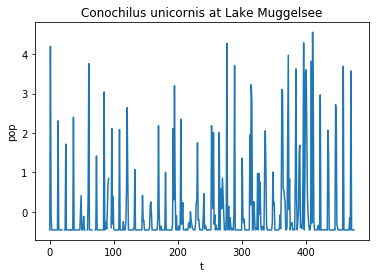

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -626.416
[02] theta: 0.000, delta: 1.100, log Likelihood: -624.595
[03] theta: 0.000, delta: 2.310, log Likelihood: -623.802
[04] theta: 0.000, delta: 3.641, log Likelihood: -623.545
[05] theta: 0.000, delta: 5.105, log Likelihood: -623.510
[06] theta: 0.000, delta: 4.373, log Likelihood: -623.510
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -626.416
[02] theta: 0.000, delta: 0.000, log Likelihood: -626.416
E = 2, tau = 2
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -626.416
[02] theta: 0.000, delta: 1.100, log Likelihood: -624.595
[03] theta: 0.000, delta: 2.310, log Likelihood: -623.802
[04] theta: 0.000, delta: 3.641, log Likelihood: -623.545
[05] theta: 0.000, delta: 5.105, log Likelihood: -623.510
[06] theta: 0.000, delta: 4.373, log Likelihood: -623.510
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -626.416
[02] theta: 0.000, delta: 0.000, log Likelihood: -

[09] theta: 0.175, delta: 0.000, log Likelihood: -502.446
[10] theta: 0.129, delta: 0.000, log Likelihood: -502.439
E = 12, tau = 2
(451,) (451,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -483.876
[02] theta: 0.000, delta: 0.000, log Likelihood: -483.876
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -483.876
[02] theta: 0.000, delta: 0.000, log Likelihood: -483.876
E = 12, tau = 6
(411,) (411,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -440.964
[02] theta: 0.000, delta: 0.000, log Likelihood: -440.964
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -440.964
[02] theta: 0.000, delta: 0.000, log Likelihood: -440.964
E = 18, tau = 1
(455,) (455,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -493.548
[02] theta: 0.000, delta: 0.000, log Likelihood: -493.548
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -493.548
[02] theta: 0.000, delta: 0.000, log Likelihood: -493.548
E = 18, tau = 2
(439,) (439,)
NSMap
[01] theta: 0.000, delta: 0.0

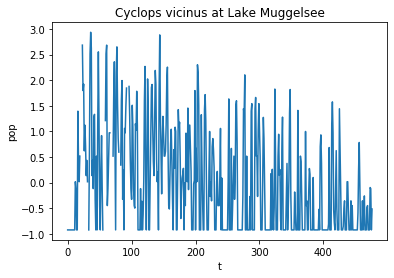

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -600.813
[02] theta: 0.000, delta: 1.100, log Likelihood: -590.772
[03] theta: 0.000, delta: 2.310, log Likelihood: -584.970
[04] theta: 0.000, delta: 3.641, log Likelihood: -581.824
[05] theta: 0.303, delta: 5.105, log Likelihood: -579.757
[06] theta: 0.151, delta: 6.716, log Likelihood: -578.788
[07] theta: 0.227, delta: 8.487, log Likelihood: -578.093
[08] theta: 0.310, delta: 10.436, log Likelihood: -577.742
[09] theta: 0.268, delta: 12.579, log Likelihood: -577.590
[10] theta: 0.223, delta: 14.937, log Likelihood: -577.574
[11] theta: 0.246, delta: 13.758, log Likelihood: -577.567
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -600.813
[02] theta: 0.000, delta: 0.000, log Likelihood: -600.813
E = 2, tau = 2
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -600.813
[02] theta: 0.000, delta: 1.100, log Likelihood: -590.772
[03] theta: 0.000, delta: 2.310, log Likelihood: -5

[02] theta: 0.000, delta: 1.100, log Likelihood: -559.292
[03] theta: 0.000, delta: 2.310, log Likelihood: -553.878
[04] theta: 0.000, delta: 3.641, log Likelihood: -550.687
[05] theta: 0.000, delta: 5.105, log Likelihood: -548.890
[06] theta: 0.000, delta: 6.716, log Likelihood: -548.012
[07] theta: 0.000, delta: 8.487, log Likelihood: -547.790
[08] theta: 0.000, delta: 7.601, log Likelihood: -547.828
[09] theta: 0.000, delta: 8.044, log Likelihood: -547.793
[10] theta: 0.000, delta: 8.531, log Likelihood: -547.791
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -568.171
[02] theta: 0.000, delta: 0.000, log Likelihood: -568.171
E = 6, tau = 2
(463,) (463,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -493.243
[02] theta: 0.000, delta: 1.100, log Likelihood: -488.623
[03] theta: 0.000, delta: 2.310, log Likelihood: -485.928
[04] theta: 0.000, delta: 3.641, log Likelihood: -484.604
[05] theta: 0.000, delta: 5.105, log Likelihood: -484.276
[06] theta: 0.000, delta: 4.373,

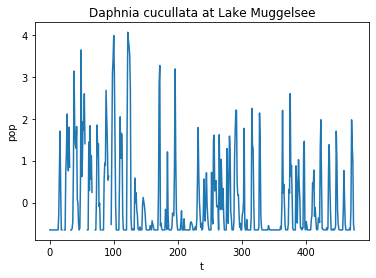

E = 2, tau = 1
(471,) (471,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -591.614
[02] theta: 1.100, delta: 1.100, log Likelihood: -586.053
[03] theta: 0.550, delta: 2.310, log Likelihood: -584.290
[04] theta: 0.825, delta: 3.641, log Likelihood: -583.284
[05] theta: 0.688, delta: 5.105, log Likelihood: -582.547
[06] theta: 0.536, delta: 6.716, log Likelihood: -581.807
[07] theta: 0.612, delta: 8.487, log Likelihood: -580.791
[08] theta: 0.695, delta: 10.436, log Likelihood: -579.551
[09] theta: 0.787, delta: 12.579, log Likelihood: -578.135
[10] theta: 0.741, delta: 14.937, log Likelihood: -576.563
[11] theta: 0.690, delta: 17.531, log Likelihood: -574.955
[12] theta: 0.716, delta: 20.384, log Likelihood: -573.341
[13] theta: 0.743, delta: 23.523, log Likelihood: -571.804
[14] theta: 0.729, delta: 26.975, log Likelihood: -570.379
[15] theta: 0.714, delta: 30.772, log Likelihood: -569.081
[16] theta: 0.698, delta: 34.950, log Likelihood: -567.908
[17] theta: 0.679, delta: 39

[20] theta: 0.000, delta: 56.275, log Likelihood: -555.929
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -574.328
[02] theta: 0.000, delta: 0.000, log Likelihood: -574.328
E = 3, tau = 6
(465,) (465,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -524.806
[02] theta: 1.100, delta: 1.100, log Likelihood: -506.582
[03] theta: 2.310, delta: 2.310, log Likelihood: -510.327
[04] theta: 1.705, delta: 1.705, log Likelihood: -506.200
[05] theta: 1.040, delta: 2.008, log Likelihood: -505.832
[06] theta: 1.372, delta: 2.340, log Likelihood: -505.148
[07] theta: 1.206, delta: 2.706, log Likelihood: -505.130
[08] theta: 1.289, delta: 3.109, log Likelihood: -505.129
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -524.806
[02] theta: 1.100, delta: 0.000, log Likelihood: -509.532
[03] theta: 2.310, delta: 0.000, log Likelihood: -512.822
[04] theta: 1.705, delta: 0.000, log Likelihood: -509.753
[05] theta: 1.040, delta: 0.000, log Likelihood: -509.726
[06] theta: 1.372, delta: 

[01] theta: 0.000, delta: 0.000, log Likelihood: -449.504
[02] theta: 0.000, delta: 0.000, log Likelihood: -449.504
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -449.504
[02] theta: 0.000, delta: 0.000, log Likelihood: -449.504
E = 18, tau = 2
(439,) (439,)
NSMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -374.525
[02] theta: 1.100, delta: 1.100, log Likelihood: -404.264
[03] theta: 0.550, delta: 0.550, log Likelihood: -380.356
[04] theta: 0.000, delta: 0.000, log Likelihood: -374.525
[05] theta: 0.303, delta: 0.303, log Likelihood: -375.675
[06] theta: 0.151, delta: 0.151, log Likelihood: -374.494
[07] theta: 0.000, delta: 0.000, log Likelihood: -374.525
[08] theta: 0.083, delta: 0.083, log Likelihood: -374.362
[09] theta: 0.175, delta: 0.042, log Likelihood: -374.470
[10] theta: 0.129, delta: 0.000, log Likelihood: -374.347
[11] theta: 0.079, delta: 0.000, log Likelihood: -374.340
SMap
[01] theta: 0.000, delta: 0.000, log Likelihood: -374.525
[02] theta: 1.100, delta: 

KeyboardInterrupt: 

In [194]:
for site in data["Site"].drop_duplicates():
    if site in ["Crystal Bog (WI)","Crystal Lake (WI)", "Sparkling Lake (WI)", "Trout Lake (WI)"]:
        continue
    
    for species in data.query("Site == ['{s}']".format(s=site))["Name"].drop_duplicates():
        s = data.query("Site == ['{s}'] and Name == ['{n}']".format(s=site,n=species))
        
        grouping_type = s["Level"].drop_duplicates().iloc[0]
        num_NANs = s["Abundance"].isna().sum()
        
        new_title = f"{species} at {site}"
        
        if new_title in species_titles:
            continue
        if grouping_type != "SP":
            continue
            
        latitude = dataMeta.query(f"Site==['{site}']")["Lat"].to_numpy()
        if latitude.shape[0] == 0:
            continue
        else:
            latitude = latitude[0]
            
        EWdata = data.query("Site == ['{loc}'] and Name == ['{n}']".format(loc=site, n=species))["Abundance"].to_numpy()

        Xr = 2**5*(EWdata - np.nanmin(EWdata)) / np.nanmax(EWdata) + 1
        Xr = np.log(Xr, where = np.isfinite(Xr), out=Xr)
        Xr = standardize(Xr)
        Xr = Xr.reshape(len(Xr),1)
        t = np.linspace(0,1,num=len(Xr))

        plotTS(Xr, title=new_title)

        horizon = 6
        lagRange = np.array([0,1,2,4,10,16,22])
        tauRange = np.array([1,2,6])

        thetaNS, deltaNS, llikelihoodNS, lagsNS, tauNS, thetaS, llikelihoodS, lagsS, tauS = optimizationSuite(Xr, t, horizon, lagRange, tauRange, errFunc=logUnLikelihood)
        new_row = np.array([thetaNS, deltaNS, llikelihoodNS, lagsNS, tauNS, thetaS, llikelihoodS, lagsS, tauS, latitude])

        species_results = np.vstack([species_results, new_row])
        species_titles = np.vstack([species_titles, new_title])

        print(deltaNS, latitude)

In [196]:
species_results

array([[   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ],
       [   0.    ,    0.    , -299.0335,   22.    ,    6.    ,    0.    ,
        -299.0335,   22.    ,    6.    ,   46.43  ],
       [   0.048 ,    0.    ,  106.9291,   16.    ,    6.    ,    0.048 ,
         106.9291,   16.    ,    6.    ,   46.43  ],
       [   0.    ,    0.    , -224.2713,   22.    ,    2.    ,    0.    ,
        -224.2713,   22.    ,    2.    ,   46.43  ],
       [   0.    ,    1.705 , -269.0363,   22.    ,    6.    ,    0.    ,
        -269.373 ,   22.    ,    6.    ,   46.43  ],
       [   0.    ,   14.9964, -320.1686,   22.    ,    6.    ,    0.    ,
        -326.4745,   22.    ,    2.    ,   46.43  ],
       [   0.    ,    0.    , -318.973 ,   22.    ,    2.    ,    0.    ,
        -318.973 ,   22.    ,    2.    ,   46.43  ],
       [   0.    ,    0.    , -234.0569,   22.    ,    6.    ,    0.    ,
        -234.0569,   22.    ,    6.  

In [195]:
np.save("species_nonstationarity_versus_latitude_data_EandTau", species_results)
np.save("species_nonstationarity_versus_latitude_titles_EandTau", species_titles)

In [ ]:
# This had a prediction stepsize of 6

goodresult = array([[   0.    ,    0.    , -393.38  ,    4.    ,    0.    , -393.38  ,
           4.    ,   54.395 ],
       [   0.6535,    0.6535, -527.7742,    4.    ,    0.7941, -527.7652,
           4.    ,   54.36  ],
       [   0.5741,    3.4913, -526.3299,    4.    ,    1.0958, -532.5531,
           4.    ,   54.37  ],
       [   0.    ,    0.3025, -215.0532,    4.    ,    0.    , -215.048 ,
           4.    ,   28.626 ],
       [   0.    ,    1.705 , -219.7967,    4.    ,    0.    , -221.5029,
           4.    ,   28.773 ],
       [   0.    ,    0.3101, -191.2344,    4.    ,    0.    , -191.3029,
           4.    ,   28.788 ],
       [   0.    ,    1.6899, -221.5837,    4.    ,    0.    , -222.7688,
           4.    ,   28.847 ],
       [   0.    ,    0.    , -218.9059,    4.    ,    0.    , -218.9059,
           4.    ,   28.883 ],
       [   0.    ,    2.0075, -198.6736,    4.    ,    0.    , -199.5261,
           4.    ,   28.778 ],
       [   0.    ,    0.2859, -122.2467,    4.    ,    0.    , -122.2967,
           4.    ,   28.912 ],
       [   0.    ,    0.    , -331.8458,    4.    ,    0.    , -331.8458,
           4.    ,   47.35  ],
       [   0.1711,   21.9535, -673.0212,    4.    ,    0.4277, -694.2757,
           4.    ,   46.43  ],
       [   0.371 ,    3.8704, -537.7052,    4.    ,    0.5761, -542.2401,
           4.    ,   36.03  ],
       [   0.    ,   14.8077, -239.0788,    4.    ,    0.    , -245.6822,
           4.    ,   43.1113],
       [   0.    ,    0.    , -252.0442,    4.    ,    0.    , -252.0442,
           4.    ,   56.194 ],
       [   0.    ,    0.8931, -317.8449,    4.    ,    0.    , -318.3439,
           4.    ,   47.235 ],
       [   0.815 ,   11.6118, -522.5849,    4.    ,    1.3577, -531.4547,
           4.    ,   52.437 ],
       [   0.1176,    0.    , -183.3822,    4.    ,    0.1176, -183.3822,
           4.    ,   41.567 ],
       [   1.2683,    0.7442, -750.0563,    4.    ,    1.2845, -750.6154,
           4.    ,   56.3   ],
       [   0.    ,    1.3539, -142.7226,    4.    ,    0.    , -144.9782,
           4.    ,  -38.79  ],
       [   0.    ,    0.    , -159.6268,    4.    ,    0.    , -159.6268,
           4.    ,   43.206 ],
       [   0.    ,    4.2519, -203.605 ,    4.    ,    0.5521, -211.4459,
           4.    ,   54.088 ],
       [   0.    ,    0.    ,  -94.4472,    4.    ,    0.    ,  -94.4472,
           4.    ,   46.0162],
       [   0.    ,    0.    , -104.4047,    4.    ,    0.    , -104.4047,
           4.    ,   46.0076],
       [   0.    ,    0.    , -109.6716,    4.    ,    0.    , -109.6716,
           4.    ,   46.0018],
       [   0.    ,    0.    ,  -90.6315,    4.    ,    0.    ,  -90.6315,
           4.    ,   46.0091],
       [   0.    ,    0.6875,  -75.0238,    4.    ,    0.    ,  -75.6497,
           4.    ,   46.0461]])

In [76]:
olddata =np.array([[   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   54.395 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   54.36  ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   54.37  ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.626 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.773 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.788 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.847 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.883 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.778 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   28.912 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   47.35  ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   46.43  ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   36.03  ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   43.1113],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   56.194 ],
       [   0.    ,    0.    , -297.6169,   11.    ,    0.    , -297.6169,
          11.    ,   47.235 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   52.437 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   41.567 ],
       [   0.3341,    0.    , -684.8746,   12.    ,    0.3341, -684.8746,
          12.    ,   56.3   ],
       [   0.    ,   17.596 , -140.2401,    2.    ,    0.    , -140.2901,
           7.    ,  -38.79  ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   43.206 ],
       [   0.    ,    0.    , -177.5228,    7.    ,    0.    , -177.5228,
           7.    ,   54.088 ],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   46.0162],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   46.0076],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   46.0018],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   46.0091],
       [   0.    ,    0.    ,       np.nan,    0.    ,    0.    ,       np.nan,
           0.    ,   46.0461]])

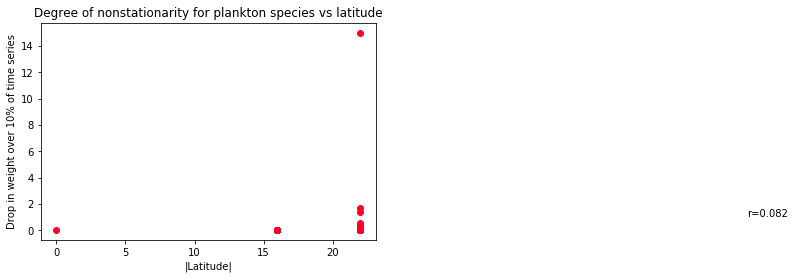

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111)

latitudes = abs(species_results[:,7])
weight_drops = species_results[:,1]# np.exp(-abs(species_results[:,1])*0.1)

cm = plt.get_cmap('gist_rainbow')
cyc = cycler(color=[cm(1.*i/len(sites)) for i in range(len(sites))])
ax.set_prop_cycle(cyc)

r = np.corrcoef(latitudes, weight_drops)[0,1]

ax.scatter(latitudes, weight_drops)

ax.set_xlabel("|Latitude|")
ax.set_ylabel("Drop in weight over 10% of time series")
# ax.legend(loc=(1,-0.5))
ax.text(50,1,f"r={r:.3f}")
ax.set_title("Degree of nonstationarity for plankton species vs latitude")
plt.show()

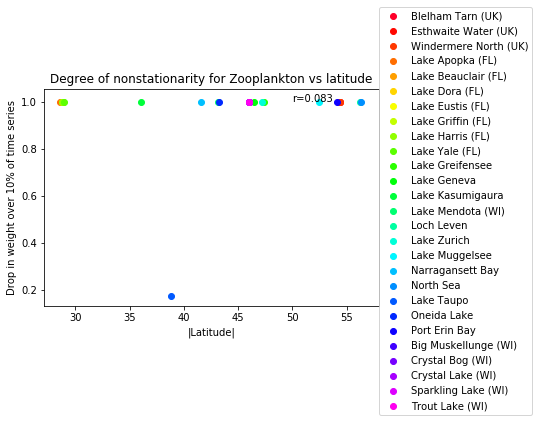

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

latitudes = abs(olddata[:,7])
weight_drops = np.exp(-abs(olddata[:,1])*0.1)

cm = plt.get_cmap('gist_rainbow')
cyc = cycler(color=[cm(1.*i/len(sites)) for i in range(len(sites))])
ax.set_prop_cycle(cyc)

r = np.corrcoef(latitudes, weight_drops)[0,1]

for i, location in enumerate(sites):
    ax.scatter(latitudes[i], weight_drops[i], label=location)
ax.set_xlabel("|Latitude|")
ax.set_ylabel("Drop in weight over 10% of time series")
ax.legend(loc=(1,-0.5))
ax.text(50,1,f"r={r:.3f}")
ax.set_title("Degree of nonstationarity for Zooplankton vs latitude")
plt.show()

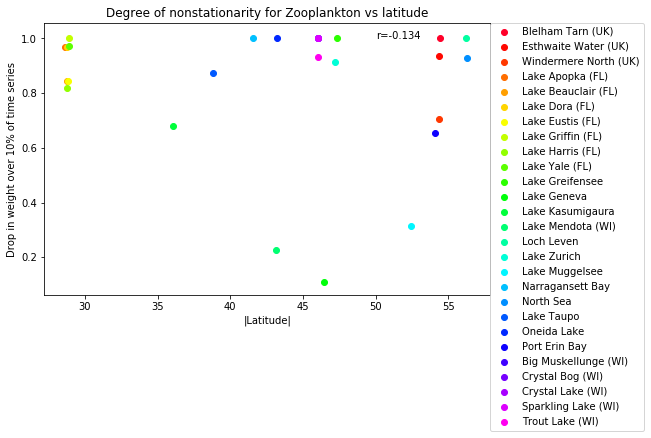

In [74]:
to_delete = 19
fig, ax = plt.subplots(1,figsize=(8,5))

latitudes = abs(table[:,7])
weight_drops = np.exp(-abs(table[:,1])*0.1)

cm = plt.get_cmap('gist_rainbow')
cyc = cycler(color=[cm(1.*i/len(sites)) for i in range(len(sites))])
ax.set_prop_cycle(cyc)

r = np.corrcoef(latitudes, weight_drops)[0,1]

for i, location in enumerate(sites):
    ax.scatter(latitudes[i], weight_drops[i], label=location)
ax.set_xlabel("|Latitude|")
ax.set_ylabel("Drop in weight over 10% of time series")
ax.legend(loc=(1,-0.5))
ax.text(50,1,f"r={r:.3f}")
ax.set_title("Degree of nonstationarity for Zooplankton vs latitude")
plt.show()

In [93]:
# do SFA
"""
Xstd = standardize(X)
basisExpanded = nonlinearBasisExpand(Xstd)

# whitening - this is independent of the order of the values, so we can safely drop any NAs
NAsRemoved = basisExpanded[~np.any(np.isnan(basisExpanded),axis=1)]

U, S, V = la.svd(NAsRemoved)
whitened = U[:,:V.shape[0]] @ V

whitenedVal, whitenedVec = la.eigh(np.cov(NAsRemoved.T,bias=False))
whitened = NAsRemoved @ (whitenedVec @ np.diag((whitenedVal+1e-7) ** -0.5))


print("Mean Test : ", np.mean(whitened))
print("Covariance Test : \n",np.cov(whitened.T))

derivatives = whitened[1:,:] - whitened[:-1,:]
colors, spectrum = la.eigh(np.cov(derivatives, rowvar=False))

print("Colors = ",colors)
"""

'\nXstd = standardize(X)\nbasisExpanded = nonlinearBasisExpand(Xstd)\n\n# whitening - this is independent of the order of the values, so we can safely drop any NAs\nNAsRemoved = basisExpanded[~np.any(np.isnan(basisExpanded),axis=1)]\n\nU, S, V = la.svd(NAsRemoved)\nwhitened = U[:,:V.shape[0]] @ V\n\nwhitenedVal, whitenedVec = la.eigh(np.cov(NAsRemoved.T,bias=False))\nwhitened = NAsRemoved @ (whitenedVec @ np.diag((whitenedVal+1e-7) ** -0.5))\n\n\nprint("Mean Test : ", np.mean(whitened))\nprint("Covariance Test : \n",np.cov(whitened.T))\n\nderivatives = whitened[1:,:] - whitened[:-1,:]\ncolors, spectrum = la.eigh(np.cov(derivatives, rowvar=False))\n\nprint("Colors = ",colors)\n'

In [13]:
basisExpanded = nonlinearBasisExpand(X)
# basisExpandedSt = standardize(basisExpanded)
basisExpandedSt = basisExpanded - np.mean(basisExpanded[np.isfinite(basisExpanded)],axis=0)
print("NA Rows = ",np.sum(np.any(np.isnan(basisExpandedSt),axis=1)), basisExpandedSt.shape)

basisExpandedStNoNas = basisExpanded[np.all(np.isfinite(basisExpanded),axis=1)]

# Whitening!

# SVD Version - seems to be more numerically unstable than PCA, which is strange. Will use PCA for now but I should revist this
"""
U, S, V = la.svd(basisExpandedStNoNas)
whitened = basisExpandedSt @ V.T @ np.diag(1/S)

whitenedNoNas = whitened[np.all(np.isfinite(whitened),axis = 1)]

print("NA rows = ", np.sum(np.any(np.isnan(whitened),axis=1)), whitened.shape)
"""
# PCA Version
covPCA = np.cov(basisExpandedStNoNas.T) # cov is non nan
eigValPCA, eigVecPCA = la.eigh(covPCA)
print("PCA eigenvals(many 0 values suggest high redundancy in data) : \n",eigValPCA)

whitened = basisExpandedSt @ (eigVecPCA @ np.diag((eigValPCA+1e-7) ** -0.5))
whitenedNoNas = whitened[np.all(np.isfinite(whitened),axis = 1)]

"""
c = np.cov(zprime.T, bias=False, rowvar=True)
print("NAs = ", np.sum(np.isnan(c)))
# print("Covariance = ", c, c.shape)

eigval, eigvec = la.eigh(c)
# print("Eigenstuff = ", eigval, eigvec)
print("Eigenvals(shouldn't be near 0) ", eigval)

diagEigVal = np.diag((eigval+1e-7) ** -0.5)

print(zprime.shape, diagEigVal.shape, eigvec.T.shape)
z = zprime @ (eigvec @ diagEigVal)
"""
# print("z = ", z)
print("Mean test(should be 0)", np.mean(whitenedNoNas))
print("Covariance test(should be I): \n", np.cov(whitenedNoNas.T))
# print("Covariance test(should be I): \n", np.cov(whitened.T))

# Another PCA on derivatives
dWhiteneddt = whitened[1:,:] - whitened[:-1,:]
covdWhiteneddt = np.cov(dWhiteneddt[np.all(np.isfinite(dWhiteneddt),axis=1)].T)
colors, spectrum = la.eigh(covdWhiteneddt)

a = spectrum[:,np.argsort(colors)[0]] # eigVecDot.sort(key=eigValDot)[0]
# print(a)
yt = whitened @ a
print(a.shape, whitened.shape)


NA Rows =  40 (473, 20)
PCA eigenvals(many 0 values suggest high redundancy in data) : 
 [ 0.0836  0.093   0.1378  0.1412  0.2262  0.2457  0.2582  0.3548  0.3644
  0.4436  0.6461  0.8241  0.9743  1.3691  1.9141  2.4277  2.7668  3.4758
  7.1548 16.952 ]
Mean test(should be 0) -0.08597165833419998
Covariance test(should be I): 
 [[ 1.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0.  0.
  -0. -0.]
 [ 0.  1. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.
  -0.  0.]
 [-0. -0.  1.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.
  -0. -0.]
 [ 0. -0.  0.  1.  0. -0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
  -0. -0.]
 [-0.  0.  0.  0.  1.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0.
   0.  0.]
 [ 0.  0.  0. -0.  0.  1. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.
  -0. -0.]
 [ 0. -0.  0.  0.  0. -0.  1. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0.
  -0.  0.]
 [-0. -0.  0. -0. -0.  0. -0.  1. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.
  

<IPython.core.display.Javascript object>


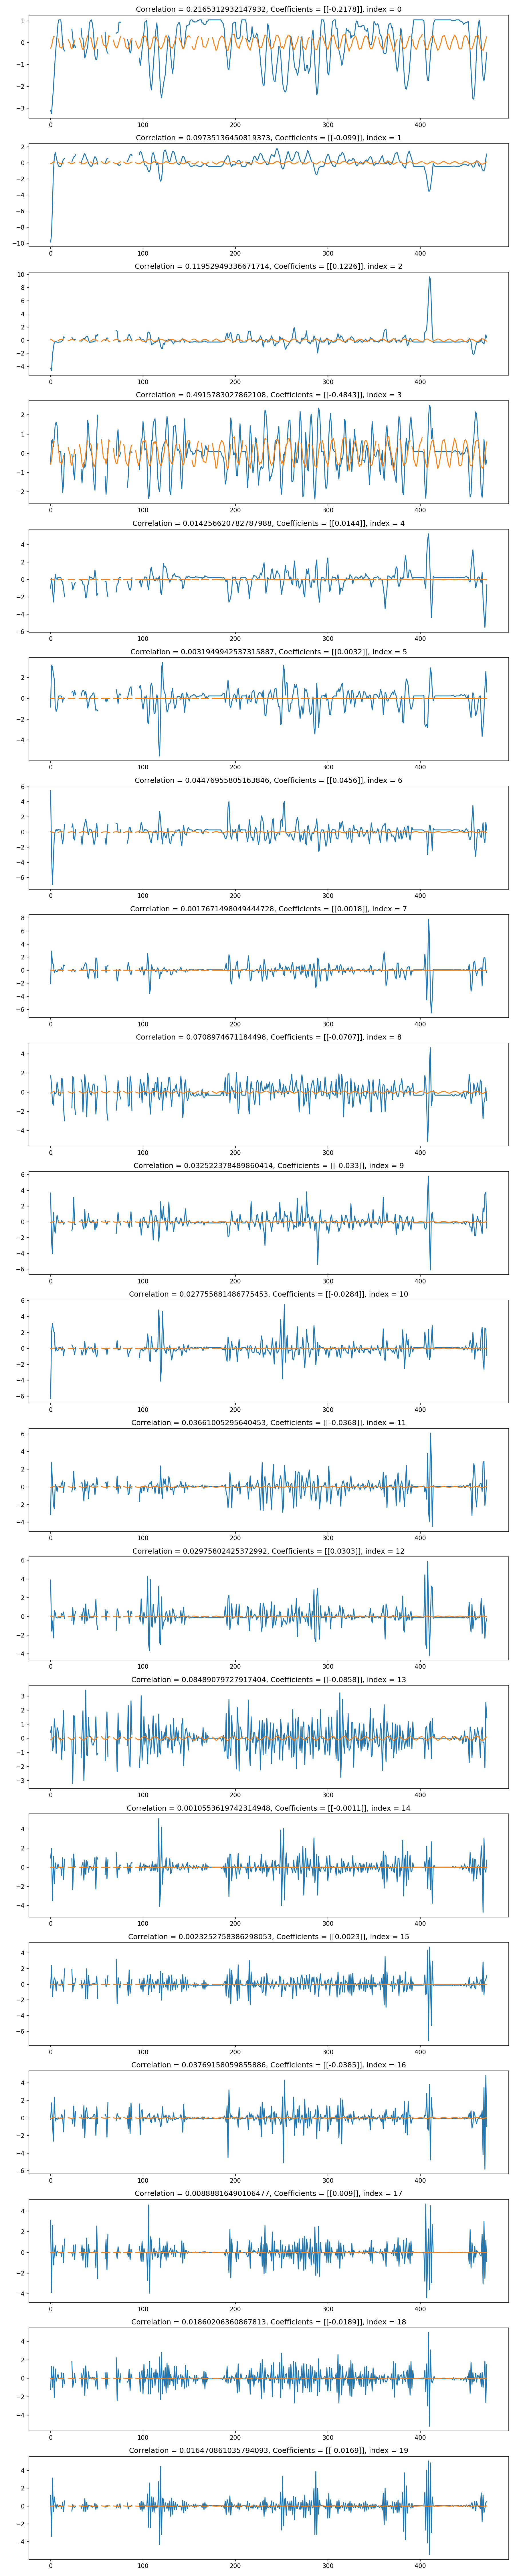

In [14]:
figSpectrum, axSpectrum = plt.subplots(len(colors), figsize=(12,3*len(colors)))

for i in range(len(colors)):
    projection = spectrum[:,i] @ whitened.T
    projectionSt = standardize(projection)
    
    k, sim = linearSimilarity(driver, projectionSt)
    
    axSpectrum[i].plot( projectionSt )
    axSpectrum[i].plot( driver @ k ,c="tab:orange")
    axSpectrum[i].set_title("Correlation = {c}, Coefficients = {K}, index = {I}".format(c=sim,K=k,I=i))
    
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


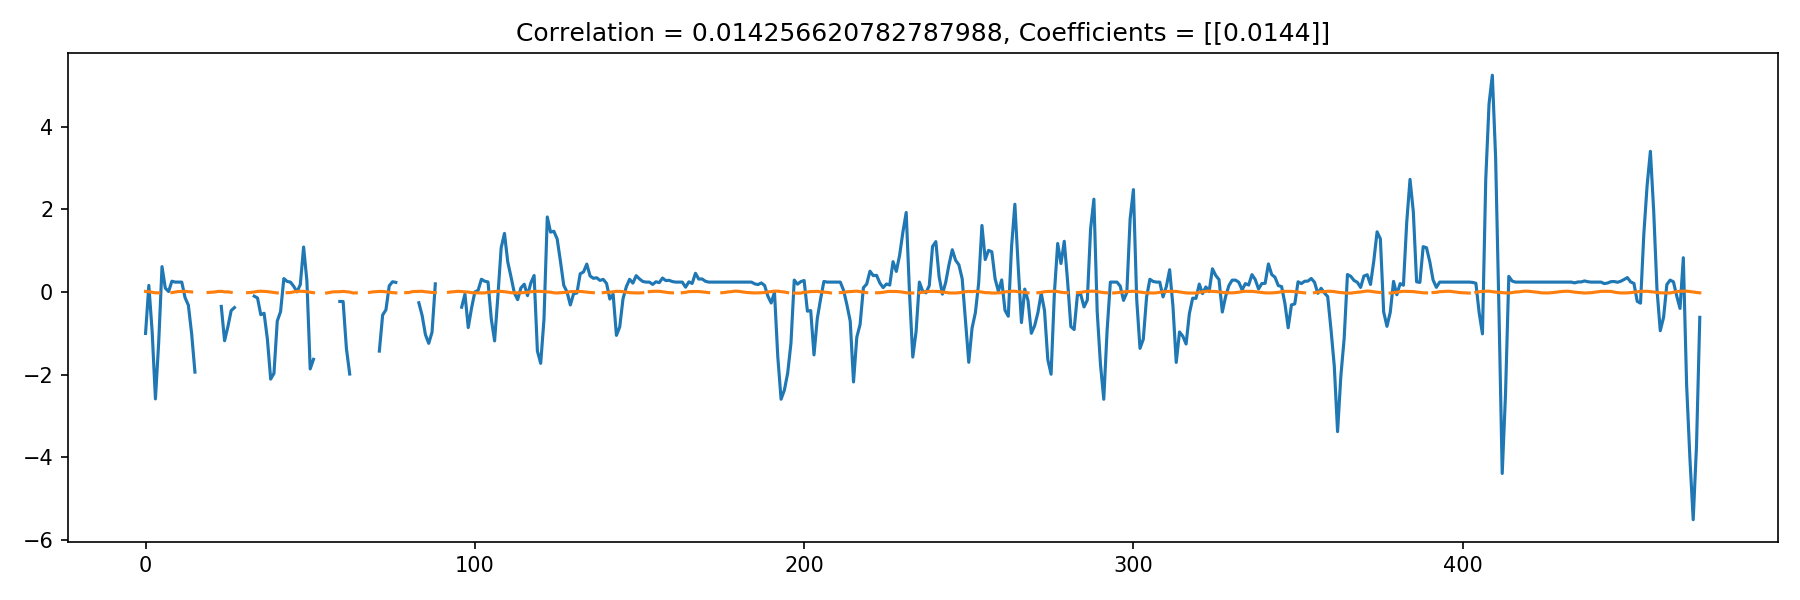

In [15]:
singleGraphIndex = 4

figSpectrum, axSpectrum = plt.subplots(1, figsize=(12,4))

projection = spectrum[:,singleGraphIndex] @ whitened.T
projectionSt = standardize(projection)

k, sim = linearSimilarity(driver, projectionSt)

axSpectrum.plot( projectionSt )
axSpectrum.plot( driver @ k ,c="tab:orange")
axSpectrum.set_title("Correlation = {c}, Coefficients = {K}".format(c=sim,K=k))
    
plt.tight_layout()
plt.show()

#### 